In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [2]:
from scipy import stats
import geopandas as gpd
import urllib
import sys
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import sklearn

## If API

In [3]:
from sodapy import Socrata

In [4]:
data_url='data.cityofnewyork.us'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='h9gi-nx95'    # The data set at the API endpoint (311 data in this case)
app_token='nEFd0apIUuyjJVKJgO4hHMVOK'   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 600
# Retrieve the first 2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=1878124)
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)

In [5]:
# Save the data frame to a CSV file
df.to_csv("Motor_Vehicle_Collisions_Crashes.csv")

In [6]:
df.shape

(1878124, 29)

In [7]:
df.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

## Not API

In [8]:
df1=pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')

In [9]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [10]:
df1.shape

(1878124, 29)

In [11]:
df1.drop_duplicates(subset=['collision_id'],inplace=True)
df1.dropna(subset=['collision_id', 'crash_date', 'crash_time'],inplace=True)

In [12]:
df1['crash_date'] = pd.to_datetime(df1['crash_date'])
df1['crash_time'] = pd.to_datetime(df1['crash_time'])

In [13]:
df1['Date'] = df1['crash_date'].dt.date
df1['Month'] = df1['crash_date'].dt.month
df1['Year'] = df1['crash_date'].dt.year
df1['DOW'] = df1['crash_date'].dt.dayofweek
df1['Hour'] = df1['crash_time'].dt.hour

In [14]:
df1['day'] = df1['crash_date'].dt.dayofyear

In [15]:
df1.head()

crash_date          crash_time                    on_street_name  \
0 2021-04-14 2022-05-03 05:32:00           BRONX WHITESTONE BRIDGE   
1 2021-04-13 2022-05-03 21:35:00                               NaN   
2 2021-04-15 2022-05-03 16:15:00          HUTCHINSON RIVER PARKWAY   
3 2021-04-13 2022-05-03 16:00:00                 VANDERVORT AVENUE   
4 2021-04-12 2022-05-03 08:25:00  EDSON AVENUE                       

   number_of_persons_injured  number_of_persons_killed  \
0                        0.0                       0.0   
1                        1.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   number_of_pedestrians_injured  number_of_pedestrians_killed  \
0                              0                             0   
1                              1                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   number_of_cyclist_injured  number_of_cyclist_killed  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   number_of_motorist_injured  ...  vehicle_type_code_3 vehicle_type_code_4  \
0                           0  ...                  NaN                 NaN   
1                           0  ...                  NaN                 NaN   
2                           0  ...                  NaN                 NaN   
3                           0  ...                  NaN                 NaN   
4                           0  ...                  NaN                 NaN   

  contributing_factor_vehicle_5  vehicle_type_code_5        Date Month  Year  \
0                           NaN                  NaN  2021-04-14     4  2021   
1                           NaN                  NaN  2021-04-13     4  2021   
2                           NaN                  NaN  2021-04-15     4  2021   
3                           NaN                  NaN  2021-04-13     4  2021   
4                           NaN                  NaN  2021-04-12     4  2021   

  DOW  Hour  day  
0   2     5  104  
1   1    21  103  
2   3    16  105  
3   1    16  103  
4   0     8  102  

[5 rows x 35 columns]

In [16]:
df1['number_of_persons_injured'] = df1['number_of_persons_injured'].fillna(0)
df1['number_of_persons_killed'] = df1['number_of_persons_killed'].fillna(0)
df1['number_of_pedestrians_injured'] = df1['number_of_pedestrians_injured'].fillna(0)
df1['number_of_pedestrians_killed'] = df1['number_of_pedestrians_killed'].fillna(0)
df1['number_of_cyclist_injured'] = df1['number_of_cyclist_injured'].fillna(0)
df1['number_of_cyclist_killed'] = df1['number_of_cyclist_killed'].fillna(0)
df1['number_of_motorist_injured'] = df1['number_of_motorist_injured'].fillna(0)
df1['number_of_motorist_killed'] = df1['number_of_motorist_killed'].fillna(0)

### 把无zipcode信息row也删掉的数据集

In [17]:
df_drop_empty_zipcode = df1.copy()

In [18]:
df_drop_empty_zipcode.dropna(subset=['zip_code'],inplace=True)

In [19]:
df_drop_empty_zipcode.shape

(1295521, 35)

### 筛年份

In [20]:
df1_2018_2020 = df1.loc[df1['Year'].isin([2018,2019,2020])]

In [21]:
df1_2018_2020.head(100)

crash_date          crash_time                    on_street_name  \
13    2019-05-21 2022-05-03 22:50:00                       GOLD STREET   
14    2020-01-21 2022-05-03 15:49:00                     BRUCKNER BLVD   
39    2020-12-31 2022-05-03 16:30:00  BELT PARKWAY                       
93    2020-12-25 2022-05-03 20:19:00  BRONX WHITESTONE BRIDGE            
423   2020-04-15 2022-05-03 15:20:00                GOWANUS EXPY (BQE)   
...          ...                 ...                               ...   
15966 2020-12-08 2022-05-03 09:13:00  DITMARS BOULEVARD                  
15969 2020-08-01 2022-05-03 17:16:00               METROPOLITAN AVENUE   
16095 2020-06-04 2022-05-03 07:30:00                               NaN   
16152 2020-12-14 2022-05-03 15:16:00  92 STREET                          
16208 2020-12-06 2022-05-03 19:00:00  FDR DRIVE                          

       number_of_persons_injured  number_of_persons_killed  \
13                           0.0                       0.0   
14                           0.0                       0.0   
39                           0.0                       0.0   
93                           0.0                       0.0   
423                          0.0                       0.0   
...                          ...                       ...   
15966                        0.0                       1.0   
15969                        0.0                       1.0   
16095                        0.0                       0.0   
16152                        0.0                       0.0   
16208                        0.0                       0.0   

       number_of_pedestrians_injured  number_of_pedestrians_killed  \
13                                 0                             0   
14                                 0                             0   
39                                 0                             0   
93                                 0                             0   
423                                0                             0   
...                              ...                           ...   
15966                              0                             0   
15969                              0                             0   
16095                              0                             0   
16152                              0                             0   
16208                              0                             0   

       number_of_cyclist_injured  number_of_cyclist_killed  \
13                             0                         0   
14                             0                         0   
39                             0                         0   
93                             0                         0   
423                            0                         0   
...                          ...                       ...   
15966                          0                         0   
15969                          0                         1   
16095                          0                         0   
16152                          0                         0   
16208                          0                         0   

       number_of_motorist_injured  ...  vehicle_type_code_3  \
13                              0  ...                  NaN   
14                              0  ...                  NaN   
39                              0  ...                  NaN   
93                              0  ...                  NaN   
423                             0  ...                  NaN   
...                           ...  ...                  ...   
15966                           0  ...                  NaN   
15969                           0  ...                  NaN   
16095                           0  ...                  NaN   
16152                           0  ...                  NaN   
16208                           0  ...                  NaN   

      vehicle_type_code_4 con

In [22]:
df_drop_empty_zipcode_2018_2020 = df_drop_empty_zipcode.loc[df1['Year'].isin([2018,2019,2020])]

In [23]:
df_drop_empty_zipcode_2018_2020.shape

(359840, 35)

### Time Distribution (collision number)

#### hourly

In [24]:
df1_Hourly = df1_2018_2020.groupby(['Hour']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Hourly = df1_Hourly.sort_values(by='Hour')

df1_Hourly['persons_injured_or_killed'] = df1_Hourly['number_of_persons_injured'] + df1_Hourly['number_of_persons_killed']
df1_Hourly['injured_or_killed_rate'] = df1_Hourly['persons_injured_or_killed'] / df1_Hourly['collision_count']
df1_Hourly['killed_rate'] = df1_Hourly['number_of_persons_killed'] / df1_Hourly['collision_count']
df1_Hourly.set_index('Hour',inplace = True)
df1_Hourly

collision_count  number_of_persons_injured  number_of_persons_killed  \
Hour                                                                         
0               20133                     6990.0                      46.0   
1                9216                     3300.0                      31.0   
2                6833                     2597.0                      17.0   
3                6109                     2363.0                      36.0   
4                6786                     2542.0                      38.0   
5                7758                     2652.0                      32.0   
6               13021                     3943.0                      25.0   
7               18262                     5199.0                      28.0   
8               30272                     7646.0                      22.0   
9               28939                     6699.0                      23.0   
10              27075                     6184.0                      23.0   
11              28791                     6865.0                      20.0   
12              30780                     7846.0                      22.0   
13              32314                     8428.0                      28.0   
14              37811                    10365.0                      24.0   
15              35929                    11034.0                      30.0   
16              39678                    11287.0                      40.0   
17              39196                    11884.0                      37.0   
18              34194                    11029.0                      43.0   
19              27623                     9608.0                      28.0   
20              22712                     8538.0                      35.0   
21              19581                     7783.0                      42.0   
22              17838                     7006.0                      31.0   
23              15102                     6147.0                      43.0   

      persons_injured_or_killed  injured_or_killed_rate  killed_rate  
Hour                                                                  
0                        7036.0                0.349476     0.002285  
1                        3331.0                0.361437     0.003364  
2                        2614.0                0.382555     0.002488  
3                        2399.0                0.392699     0.005893  
4                        2580.0                0.380195     0.005600  
5                        2684.0                0.345965     0.004125  
6                        3968.0                0.304738     0.001920  
7                        5227.0                0.286223     0.001533  
8                        7668.0                0.253303     0.000727  
9                        6722.0                0.232282     0.000795  
10                       6207.0                0.229252     0.000849  
11                       6885.0                0.239137     0.000695  
12                       7868.0                0.255621     0.000715  
13                       8456.0                0.261682     0.000866  
14                      10389.0                0.274761     0.000635  
15                      11064.0                0.307941     0.000835  
16                      11327.0                0.285473     0.001008  
17                      11921.0                0.304138     0.000944  
18                      11072.0                0.323799     0.001258  
19                       9636.0                0.348840     0.001014  
20                       8573.0                0.377466     0.001541  
21                       7825.0                0.399622     0.002145  
22                       7037.0                0.394495     0.001738  
23                       6190.0                0.409879     0.002847

<AxesSubplot:xlabel='Hour'>

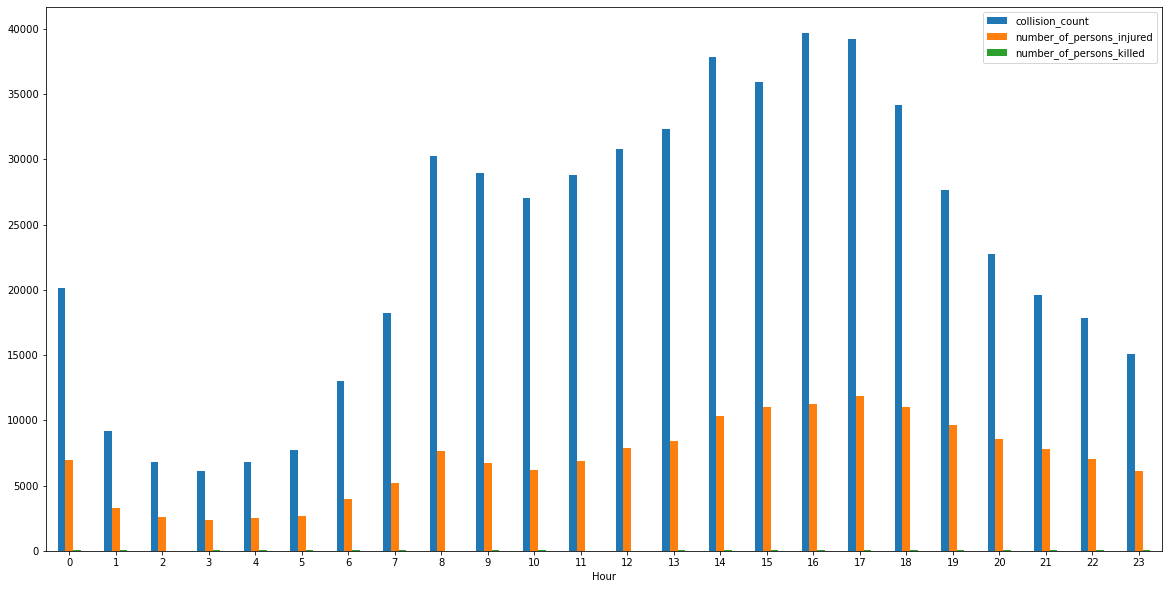

In [25]:
plt.rcParams["figure.figsize"] = (20,10)
df1_Hourly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

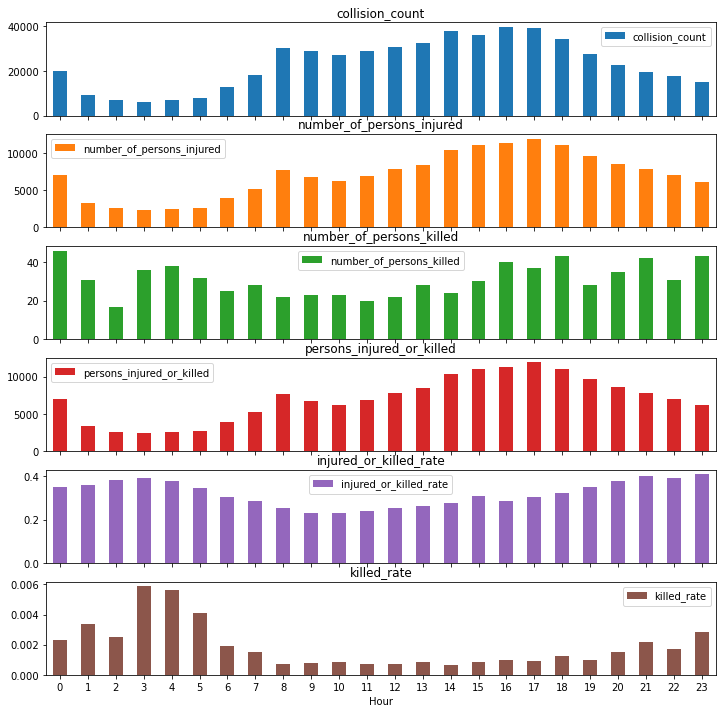

In [26]:
plt.rcParams["figure.figsize"] = (12,12)
axes =df1_Hourly.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

In [27]:
df1_2018_2020.tail(50)

crash_date          crash_time                    on_street_name  \
698499 2018-01-17 2022-05-03 06:50:00  44 DRIVE                           
698500 2018-01-12 2022-05-03 15:00:00  19 AVENUE                          
698501 2018-01-19 2022-05-03 08:50:00  BELT PARKWAY                       
698502 2018-01-18 2022-05-03 08:52:00  TRIBOROUGH BRIDGE                  
698503 2018-01-26 2022-05-03 15:28:00  LONG ISLAND EXPRESSWAY             
698504 2018-01-27 2022-05-03 19:30:00  WEST 230 STREET                    
698505 2018-01-07 2022-05-03 21:00:00                               NaN   
698506 2018-01-15 2022-05-03 11:20:00  CHRISTIE AVENUE                    
698507 2018-01-24 2022-05-03 14:45:00  EAST 196 STREET                    
698508 2018-01-17 2022-05-03 17:22:00                               NaN   
698509 2018-01-15 2022-05-03 11:00:00                               NaN   
698510 2018-01-12 2022-05-03 13:53:00  82 STREET                          
698511 2018-01-22 2022-05-03 12:35:00  2 AVENUE                           
698512 2018-01-10 2022-05-03 09:30:00  52 STREET                          
698513 2018-01-22 2022-05-03 14:20:00  AMBOY ROAD                         
698514 2018-01-21 2022-05-03 14:55:00  PENNSYLVANIA AVENUE                
698515 2018-01-26 2022-05-03 19:40:00  HIGHLAND BOULEVARD                 
698516 2018-01-01 2022-05-03 04:14:00  EAST HOUSTON STREET                
698517 2018-01-07 2022-05-03 12:20:00                               NaN   
698518 2018-01-19 2022-05-03 14:30:00                               NaN   
698519 2018-01-24 2022-05-03 22:42:00                               NaN   
698520 2018-01-05 2022-05-03 16:55:00                               NaN   
698521 2018-01-27 2022-05-03 15:07:00                               NaN   
698522 2018-01-01 2022-05-03 20:30:00  219 STREET                         
698523 2018-01-13 2022-05-03 09:35:00  EAST 79 STREET                     
698524 2018-01-04 2022-05-03 06:50:00  BRUCKNER BOULEVARD                 
698525 2018-01-20 2022-05-03 23:36:00  BROOKLYN QUEENS EXPRESSWAY         
698526 2018-01-01 2022-05-03 00:15:00                               NaN   
698527 2018-01-05 2022-05-03 20:47:00                               NaN   
698528 2018-01-10 2022-05-03 15:00:00  HYLAN BOULEVARD                    
698529 2018-01-15 2022-05-03 12:58:00  THROGS NECK BRIDGE                 
698530 2018-01-23 2022-05-03 18:26:00                               NaN   
698531 2018-01-20 2022-05-03 14:00:00  FORT HAMILTON PARKWAY              
698532 2018-01-05 2022-05-03 10:00:00                               NaN   
698533 2018-01-26 2022-05-03 05:45:00  WEBSTER AVENUE                     
698534 2018-01-06 2022-05-03 14:00:00                               NaN   
698535 2018-01-25 2022-05-03 17:00:00  OCEAN PARKWAY                      
698536 2018-01-24 2022-05-03 13:39:00                               NaN   
698537 2018-01-03 2022-05-03 19:00:00                               NaN   
698538 2018-01-13 2022-05-03 23:15:00  EAST 156 STREET                    
698539 2018-01-11 2022-05-03 17:29:00  23 AVENUE                          
698540 2018-01-21 2022-05-03 18:27:00  GRAND CENTRAL PKWY                 
698541 2018-01-19 2022-05-03 18:30:00  EAST 19 STREET                     
698542 2018-01-05 2022-05-03 11:00:00  119 STREET                         
698543 2018-01-13 2022-05-03 17:30:00  METROPOLITAN AVENUE                
698544 2018-01-26 2022-05-03 22:36:00  KINGS HIGHWAY                      
698545 2018-01-14 2022-05-03 15:00:00  ATLANTIC AVENUE                    
698546 2018-01-14 2022-05-03 12:20:00  WEST 211 STREET                    
698547 2018-01-23 2022-05-03 06:30:00  BROADWAY                           
698548 2018-01-17 2022-05-03 05:49:00  NASSAU AVENUE                      

        number_of_persons_injured  number_of_persons_killed  \
698499                        1.0                       0.0   
698500                        0.0                      

#### monthly

In [28]:
df1_Monthly = df1_2018_2020.groupby(['Month']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Monthly = df1_Monthly.sort_values(by='Month')

df1_Monthly['persons_injured_or_killed'] = df1_Monthly['number_of_persons_injured'] + df1_Monthly['number_of_persons_killed']
df1_Monthly['injured_or_killed_rate'] = df1_Monthly['persons_injured_or_killed'] / df1_Monthly['collision_count']
df1_Monthly['killed_rate'] = df1_Monthly['number_of_persons_killed'] / df1_Monthly['collision_count']
df1_Monthly.set_index('Month',inplace = True)
df1_Monthly

collision_count  number_of_persons_injured  number_of_persons_killed  \
Month                                                                         
1                49417                    13118.0                      54.0   
2                45759                    12265.0                      51.0   
3                48111                    12552.0                      43.0   
4                39154                    10799.0                      51.0   
5                46594                    13947.0                      48.0   
6                47953                    15172.0                      76.0   
7                47404                    15502.0                      61.0   
8                46678                    15782.0                      62.0   
9                46387                    15573.0                      91.0   
10               48141                    15282.0                      66.0   
11               45417                    13918.0                      72.0   
12               44938                    14025.0                      69.0   

       persons_injured_or_killed  injured_or_killed_rate  killed_rate  
Month                                                                  
1                        13172.0                0.266548     0.001093  
2                        12316.0                0.269149     0.001115  
3                        12595.0                0.261790     0.000894  
4                        10850.0                0.277111     0.001303  
5                        13995.0                0.300361     0.001030  
6                        15248.0                0.317978     0.001585  
7                        15563.0                0.328306     0.001287  
8                        15844.0                0.339432     0.001328  
9                        15664.0                0.337681     0.001962  
10                       15348.0                0.318813     0.001371  
11                       13990.0                0.308034     0.001585  
12                       14094.0                0.313632     0.001535

<AxesSubplot:xlabel='Month'>

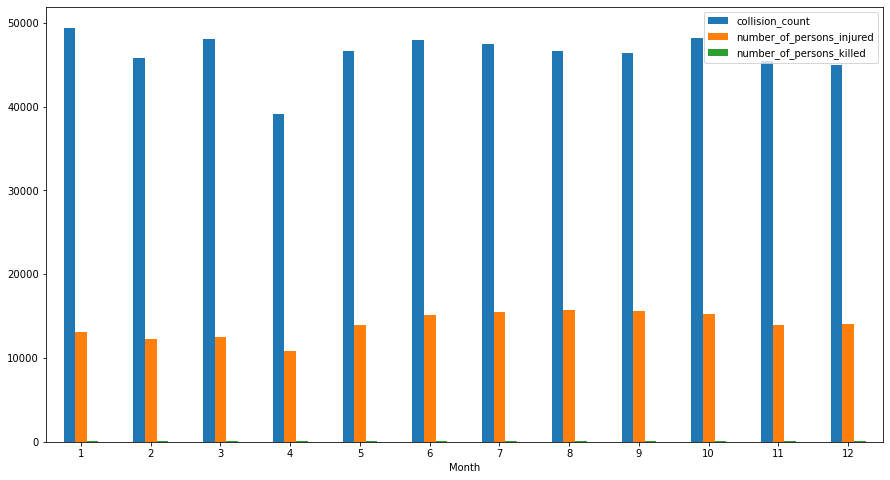

In [29]:
plt.rcParams["figure.figsize"] = (15,8)
df1_Monthly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

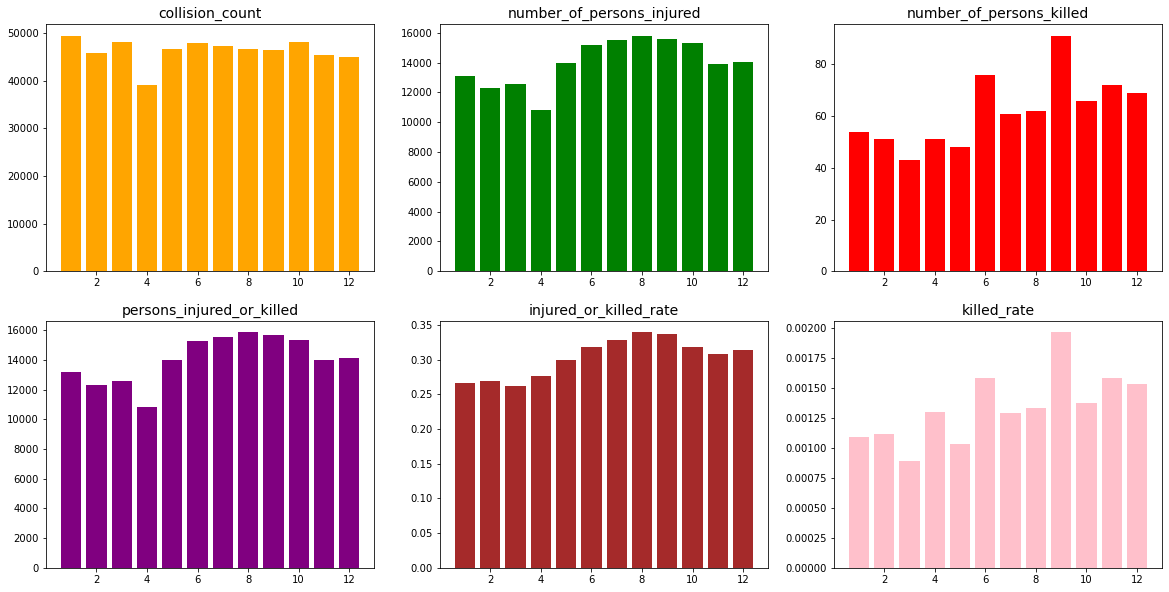

In [30]:
plt.figure(figsize = (20,10))
c = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Monthly.index, df1_Monthly.iloc[:,M-1],color = c[M])
    plt.title(df1_Monthly.columns[M-1], fontsize = 14)

#### weekly

In [31]:
df1_Weekly = df1_2018_2020.groupby(['DOW']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Weekly = df1_Weekly.sort_values(by='DOW')

df1_Weekly['persons_injured_or_killed'] = df1_Weekly['number_of_persons_injured'] + df1_Weekly['number_of_persons_killed']
df1_Weekly['injured_or_killed_rate'] = df1_Weekly['persons_injured_or_killed'] / df1_Weekly['collision_count']
df1_Weekly['killed_rate'] = df1_Weekly['number_of_persons_killed'] / df1_Weekly['collision_count']
df1_Weekly.set_index('DOW',inplace = True)
df1_Weekly

collision_count  number_of_persons_injured  number_of_persons_killed  \
DOW                                                                         
0              79914                    23543.0                     116.0   
1              82484                    24129.0                     106.0   
2              81106                    23409.0                      82.0   
3              84093                    24243.0                      98.0   
4              88757                    25678.0                      90.0   
5              74468                    24459.0                     140.0   
6              65131                    22474.0                     112.0   

     persons_injured_or_killed  injured_or_killed_rate  killed_rate  
DOW                                                                  
0                      23659.0                0.296056     0.001452  
1                      24235.0                0.293815     0.001285  
2                      23491.0                0.289633     0.001011  
3                      24341.0                0.289453     0.001165  
4                      25768.0                0.290321     0.001014  
5                      24599.0                0.330330     0.001880  
6                      22586.0                0.346778     0.001720

<AxesSubplot:xlabel='DOW'>

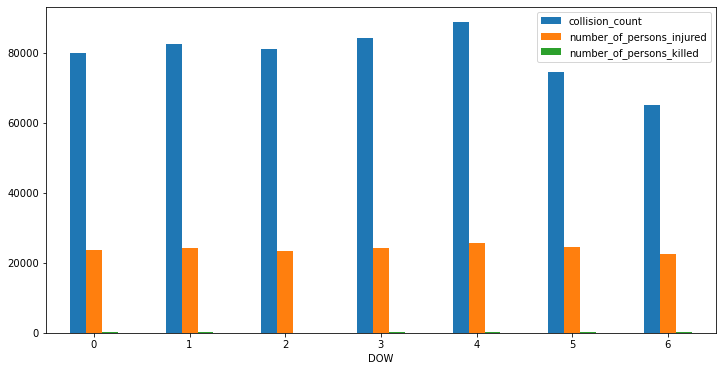

In [32]:
plt.rcParams["figure.figsize"] = (12,6)
df1_Weekly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

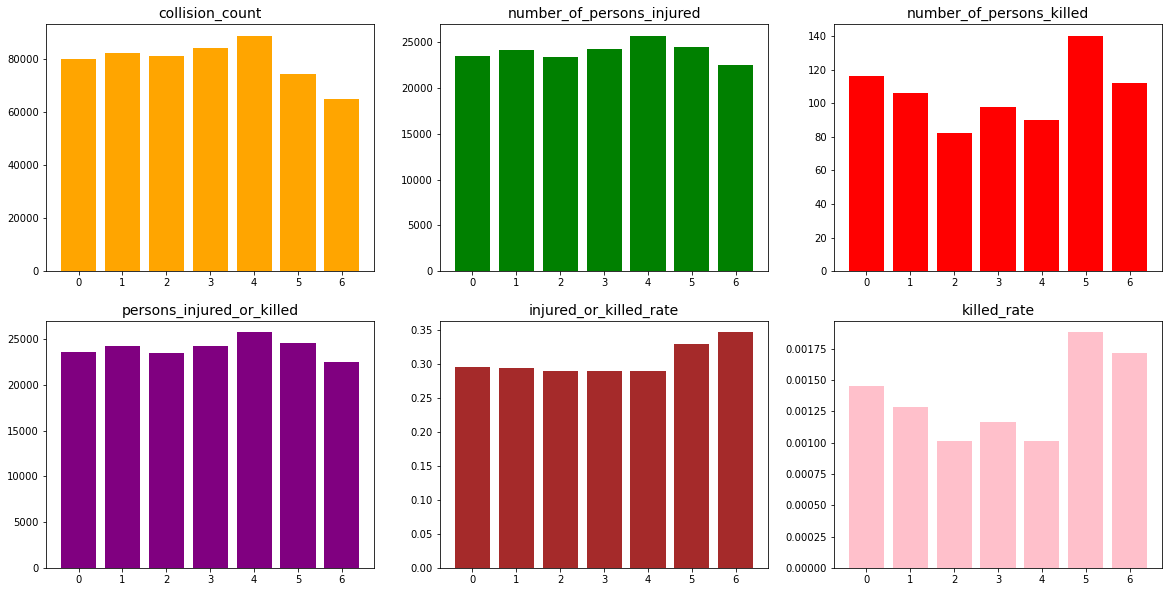

In [33]:
#plt.rcParams["figure.figsize"] = (8,15)
plt.figure(figsize = (20,10))
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Weekly.index, df1_Weekly.iloc[:,M-1],color = c[M])
    plt.title(df1_Weekly.columns[M-1], fontsize = 14)
#axes =df1_Weekly.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2)

#### yearly

In [34]:
df1_Yearly = df1.groupby(['Year']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Yearly = df1_Yearly.sort_values(by='Year')

df1_Yearly['persons_injured_or_killed'] = df1_Yearly['number_of_persons_injured'] + df1_Yearly['number_of_persons_killed']
df1_Yearly['injured_or_killed_rate'] = df1_Yearly['persons_injured_or_killed'] / df1_Yearly['collision_count']
df1_Yearly['killed_rate'] = df1_Yearly['number_of_persons_killed'] / df1_Yearly['collision_count']
df1_Yearly.set_index('Year',inplace = True)
df1_Yearly

collision_count  number_of_persons_injured  number_of_persons_killed  \
Year                                                                         
2012            91618                    24845.0                     128.0   
2013           203734                    55124.0                     297.0   
2014           206033                    51223.0                     262.0   
2015           217694                    51358.0                     243.0   
2016           229831                    60317.0                     246.0   
2017           231007                    60656.0                     256.0   
2018           231563                    61941.0                     231.0   
2019           211485                    61389.0                     244.0   
2020           112905                    44605.0                     269.0   
2021           110511                    51765.0                     293.0   
2022            31743                    14436.0                      68.0   

      persons_injured_or_killed  injured_or_killed_rate  killed_rate  
Year                                                                  
2012                    24973.0                0.272577     0.001397  
2013                    55421.0                0.272026     0.001458  
2014                    51485.0                0.249887     0.001272  
2015                    51601.0                0.237035     0.001116  
2016                    60563.0                0.263511     0.001070  
2017                    60912.0                0.263680     0.001108  
2018                    62172.0                0.268488     0.000998  
2019                    61633.0                0.291430     0.001154  
2020                    44874.0                0.397449     0.002383  
2021                    52058.0                0.471066     0.002651  
2022                    14504.0                0.456920     0.002142

<AxesSubplot:xlabel='Year'>

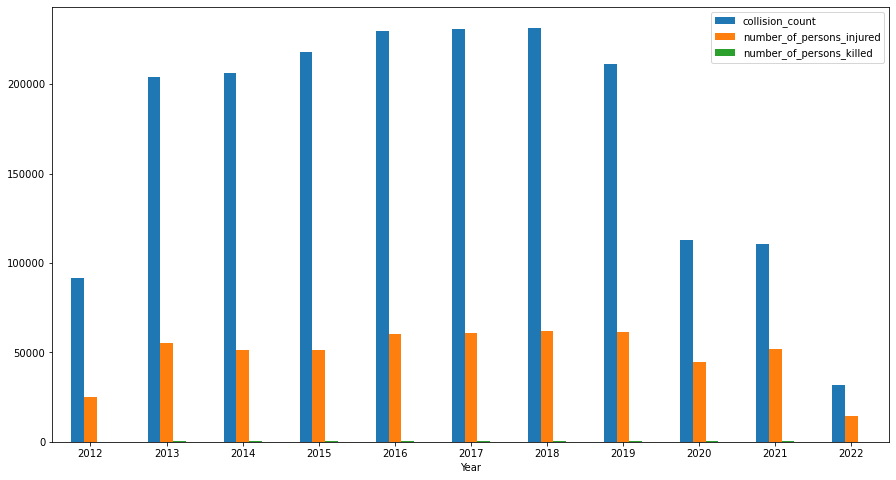

In [35]:
plt.rcParams["figure.figsize"] = (15,8)
df1_Yearly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

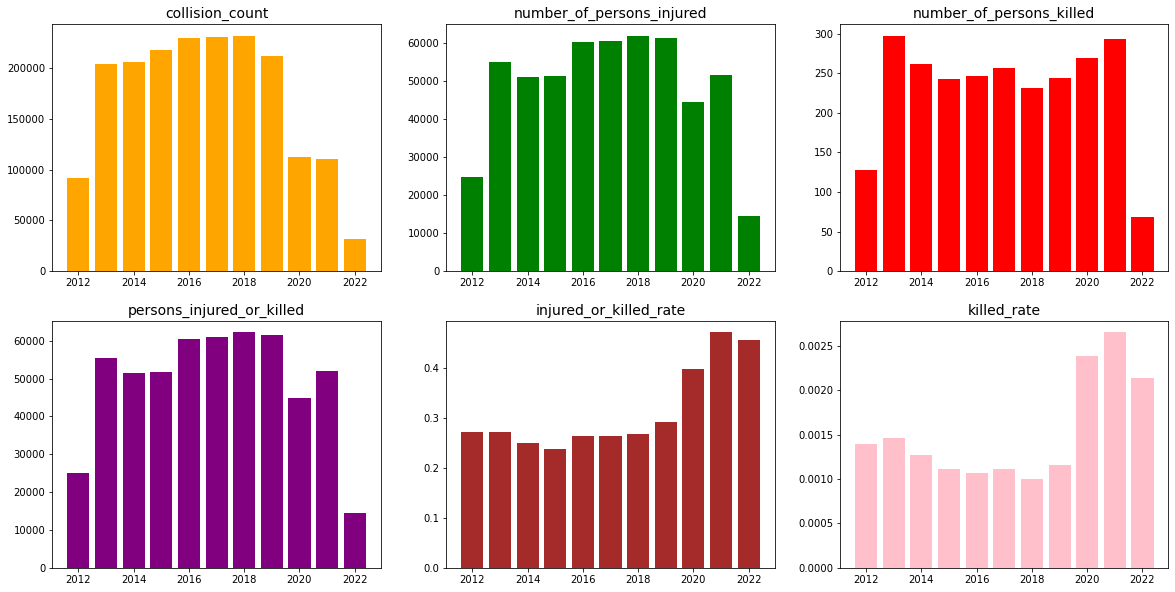

In [36]:
plt.figure(figsize = (20,10))
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Yearly.index, df1_Yearly.iloc[:,M-1],color = c[M])
    plt.title(df1_Yearly.columns[M-1], fontsize = 14)

#### daily

In [37]:
df1_Daily = df1_2018_2020.groupby(['day']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Daily = df1_Daily.sort_values(by='day')

df1_Daily['persons_injured_or_killed'] = df1_Daily['number_of_persons_injured'] + df1_Daily['number_of_persons_killed']
df1_Daily['injured_or_killed_rate'] = df1_Daily['persons_injured_or_killed'] / df1_Daily['collision_count']
df1_Daily['killed_rate'] = df1_Daily['number_of_persons_killed'] / df1_Daily['collision_count']
df1_Daily.set_index('day',inplace = True)
df1_Daily

collision_count  number_of_persons_injured  number_of_persons_killed  \
day                                                                         
1               1229                      385.0                       2.0   
2               1569                      422.0                       1.0   
3               1605                      409.0                       1.0   
4               1415                      363.0                       2.0   
5               1446                      344.0                       1.0   
..               ...                        ...                       ...   
362             1220                      384.0                       2.0   
363             1100                      412.0                       1.0   
364             1166                      376.0                       0.0   
365             1303                      426.0                       4.0   
366              278                      125.0                       1.0   

     persons_injured_or_killed  injured_or_killed_rate  killed_rate  
day                                                                  
1                        387.0                0.314890     0.001627  
2                        423.0                0.269598     0.000637  
3                        410.0                0.255452     0.000623  
4                        365.0                0.257951     0.001413  
5                        345.0                0.238589     0.000692  
..                         ...                     ...          ...  
362                      386.0                0.316393     0.001639  
363                      413.0                0.375455     0.000909  
364                      376.0                0.322470     0.000000  
365                      430.0                0.330008     0.003070  
366                      126.0                0.453237     0.003597  

[366 rows x 6 columns]

<AxesSubplot:xlabel='day'>

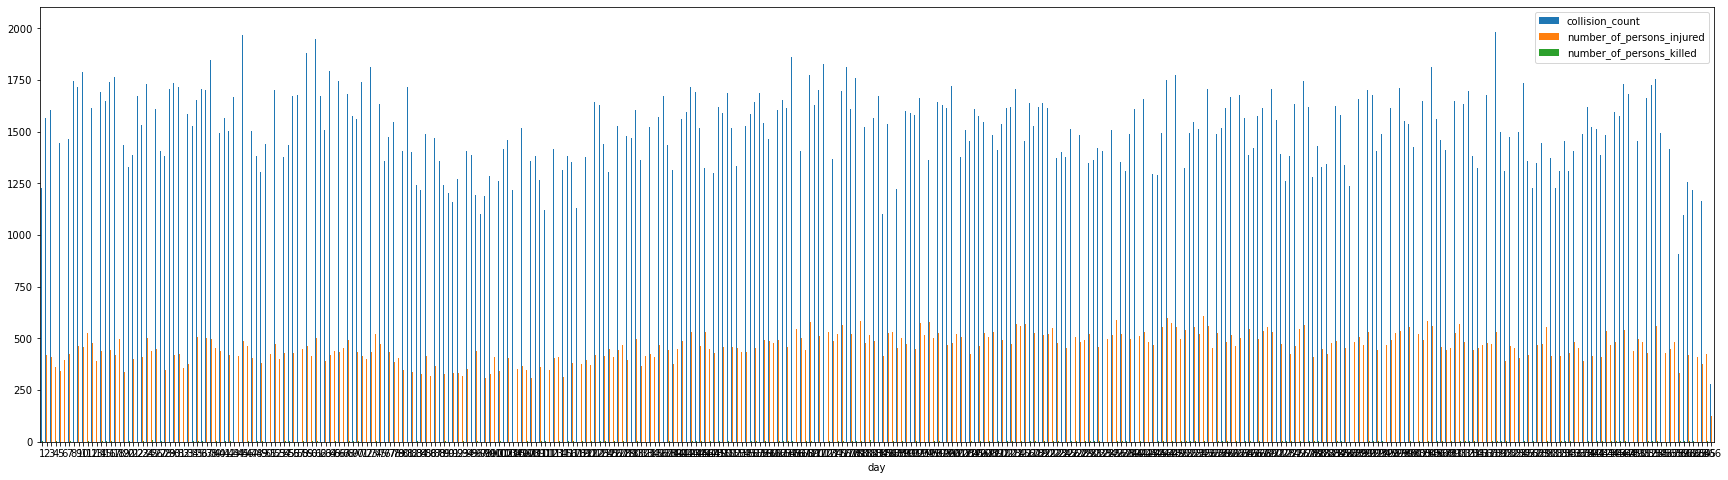

In [38]:
plt.rcParams["figure.figsize"] = (30,8)
df1_Daily[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

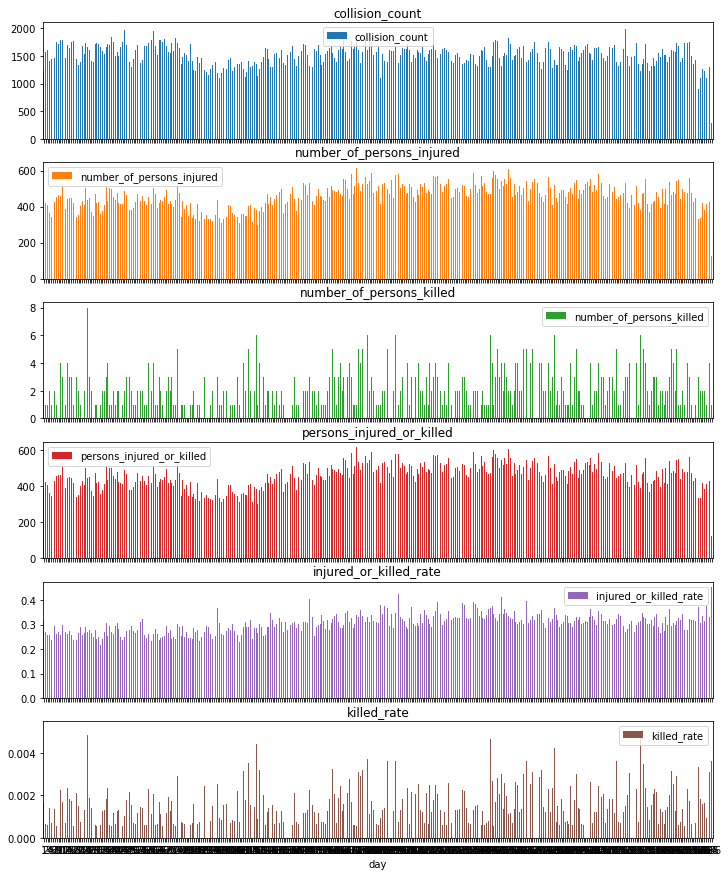

In [39]:
plt.rcParams["figure.figsize"] = (12,15)
axes =df1_Daily.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

### Reason Analysis

In [40]:
Reasons_1 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_1.value_counts())
Reasons_2 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_2.value_counts())
Reasons_3 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_3.value_counts())
Reasons_4 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_4.value_counts())
Reasons_5 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_5.value_counts())

In [41]:
a = pd.merge(Reasons_1,Reasons_2,how = 'outer',left_index=True, right_index=True)
b = pd.merge(a,Reasons_3,how = 'outer',left_index=True, right_index=True)
c = pd.merge(b,Reasons_4,how = 'outer',left_index=True, right_index=True)
d = pd.merge(c,Reasons_5,how = 'outer',left_index=True, right_index=True)

In [42]:
reason_table = d.fillna(0)
reason_table['total_reason_count'] = reason_table.sum(axis = 1)
reason_table = reason_table.sort_values(by=['total_reason_count'],ascending = False)

In [43]:
new_reason_table = reason_table[reason_table.total_reason_count>3000]
others = reason_table[reason_table.total_reason_count<3000].sum()
others.name = 'Other Reasons'
new_reason_table = new_reason_table.append(others,ignore_index = False)
new_reason_table = new_reason_table.drop(index=('Unspecified'))

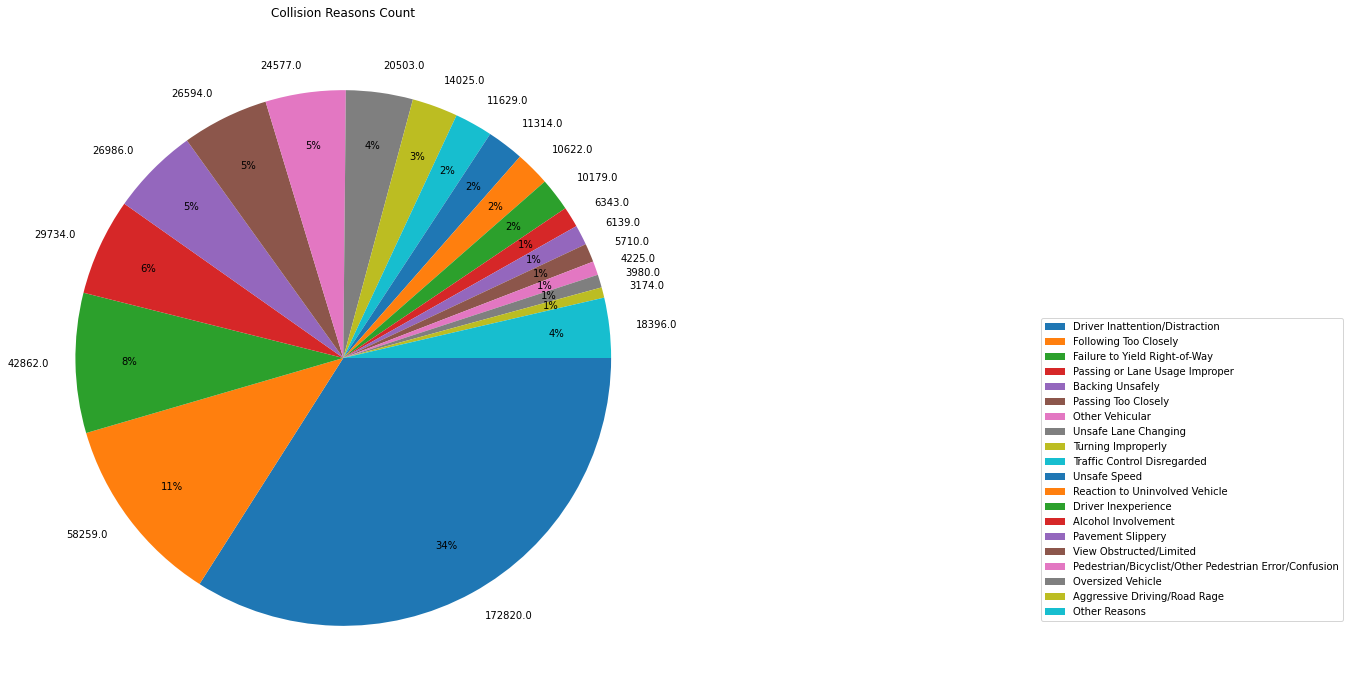

In [44]:
#new_reason_table['total_reason_count'].plot.pie(counterclock=False)
plt.pie(new_reason_table.total_reason_count,counterclock=False,autopct='%1.0f%%',pctdistance=0.8, labels=new_reason_table.total_reason_count,labeldistance=1.1)
plt.title('Collision Reasons Count')
plt.legend(new_reason_table.index,loc = 'lower right', bbox_to_anchor=(2,0.1))
plt.show()

In [45]:
reason_table[reason_table.total_reason_count<3000]['total_reason_count']

Brakes Defective                               2152.0
Passenger Distraction                          1948.0
Fell Asleep                                    1713.0
Outside Car Distraction                        1370.0
Obstruction/Debris                             1345.0
Glare                                          1146.0
Steering Failure                                863.0
Failure to Keep Right                           855.0
Tire Failure/Inadequate                         771.0
Pavement Defective                              732.0
Illnes                                          661.0
Lost Consciousness                              616.0
Fatigued/Drowsy                                 608.0
Animals Action                                  543.0
Driverless/Runaway Vehicle                      522.0
Lane Marking Improper/Inadequate                464.0
Drugs (illegal)                                 364.0
Traffic Control Device Improper/Non-Working     349.0
Accelerator Defective       

#### Vehicle Type Analysis

In [46]:
Vehicle_1 = pd.DataFrame(df1_2018_2020.vehicle_type_code1.value_counts())
Vehicle_2 = pd.DataFrame(df1_2018_2020.vehicle_type_code2.value_counts())
Vehicle_3 = pd.DataFrame(df1_2018_2020.vehicle_type_code_3.value_counts())
Vehicle_4 = pd.DataFrame(df1_2018_2020.vehicle_type_code_4.value_counts())
Vehicle_5 = pd.DataFrame(df1_2018_2020.vehicle_type_code_5.value_counts())

In [47]:
av = pd.merge(Vehicle_1,Vehicle_2,how = 'outer',left_index=True, right_index=True)
bv = pd.merge(av,Vehicle_3,how = 'outer',left_index=True, right_index=True)
cv = pd.merge(bv,Vehicle_4,how = 'outer',left_index=True, right_index=True)
dv = pd.merge(cv,Vehicle_5,how = 'outer',left_index=True, right_index=True)

In [48]:
vehicle_table = dv.fillna(0)
vehicle_table['total_vehicle_count'] = vehicle_table.sum(axis = 1)
vehicle_table = vehicle_table.sort_values(by=['total_vehicle_count'],ascending = False)

In [49]:
new_vehicle_table = vehicle_table[vehicle_table.total_vehicle_count>2000]
othersv = vehicle_table[vehicle_table.total_vehicle_count<2000].sum()
othersv.name = 'Other Vehicle'
new_vehicle_table = new_vehicle_table.append(othersv,ignore_index = False)

In [50]:
new_vehicle_table.index

Index(['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck',
       'Box Truck', 'Bike', 'Bus', 'Tractor Truck Diesel', 'Van', 'Motorcycle',
       'Dump', 'Convertible', 'Ambulance', 'Flat Bed', 'Other Vehicle'],
      dtype='object')

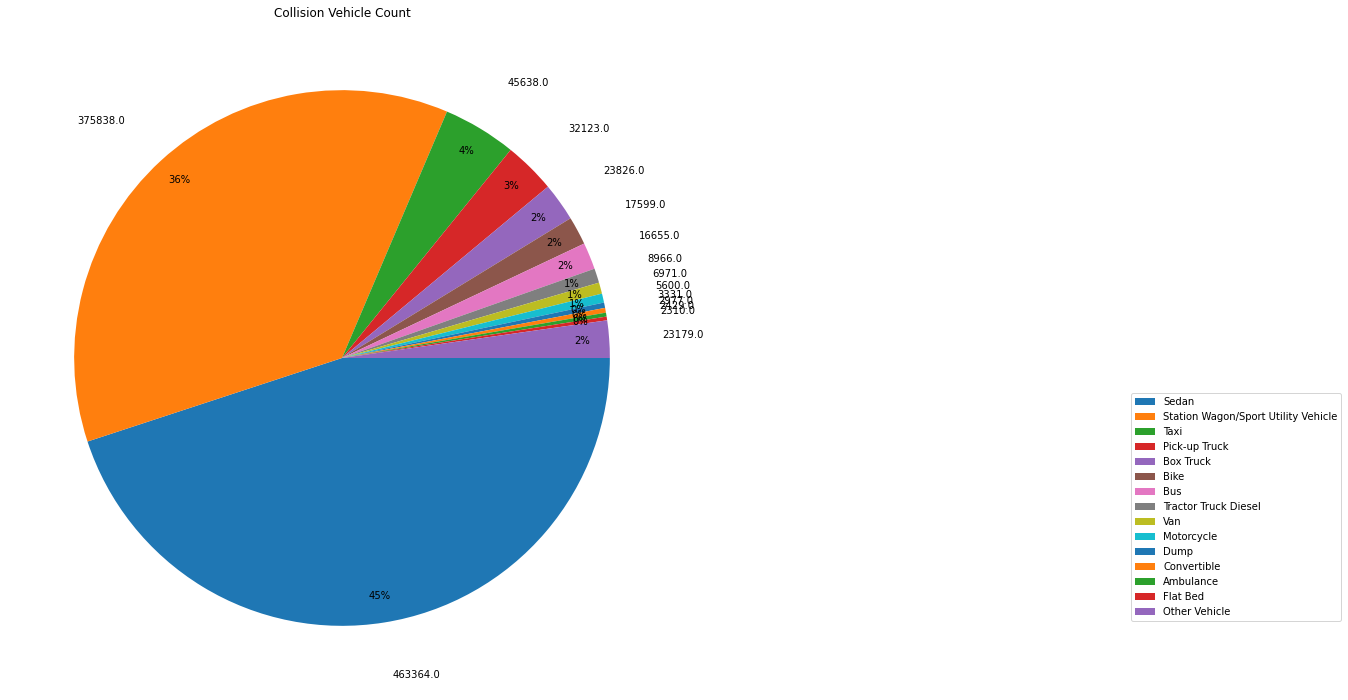

In [51]:
plt.pie(new_vehicle_table.total_vehicle_count,counterclock=False,autopct='%1.0f%%',pctdistance=0.9, labels=new_vehicle_table.total_vehicle_count,labeldistance=1.2)
plt.title('Collision Vehicle Count')
plt.legend(new_vehicle_table.index,loc = 'lower right', bbox_to_anchor=(2,0.1))
plt.show()

In [52]:
vehicle_table[vehicle_table.total_vehicle_count<2000]['total_vehicle_count'].head(10)

Garbage or Refuse         1899.0
PK                        1686.0
Carry All                 1442.0
Tractor Truck Gasoline    1273.0
E-Scooter                 1145.0
Tow Truck / Wrecker       1070.0
E-Bike                     953.0
Chassis Cab                745.0
Moped                      734.0
Tanker                     733.0
Name: total_vehicle_count, dtype: float64

### Vehicle In Different Time

In [53]:
Few_vehivel_classed = df1_2018_2020[df1_2018_2020.vehicle_type_code1.isin(new_vehicle_table.index[:8])]

In [54]:
Few_vehivel_classed = Few_vehivel_classed[['Hour','vehicle_type_code1']]

In [55]:
Hour_vehicle = Few_vehivel_classed.groupby(by=['Hour','vehicle_type_code1']).agg({'vehicle_type_code1':'count'})

In [56]:
Hour_vehicle['vehicle_type_percent'] = 0.000
for i in range(24):
    Hour_vehicle.loc[i]['vehicle_type_percent'] = list(Hour_vehicle.loc[i]['vehicle_type_code1']/sum(Hour_vehicle.loc[i]['vehicle_type_code1']))

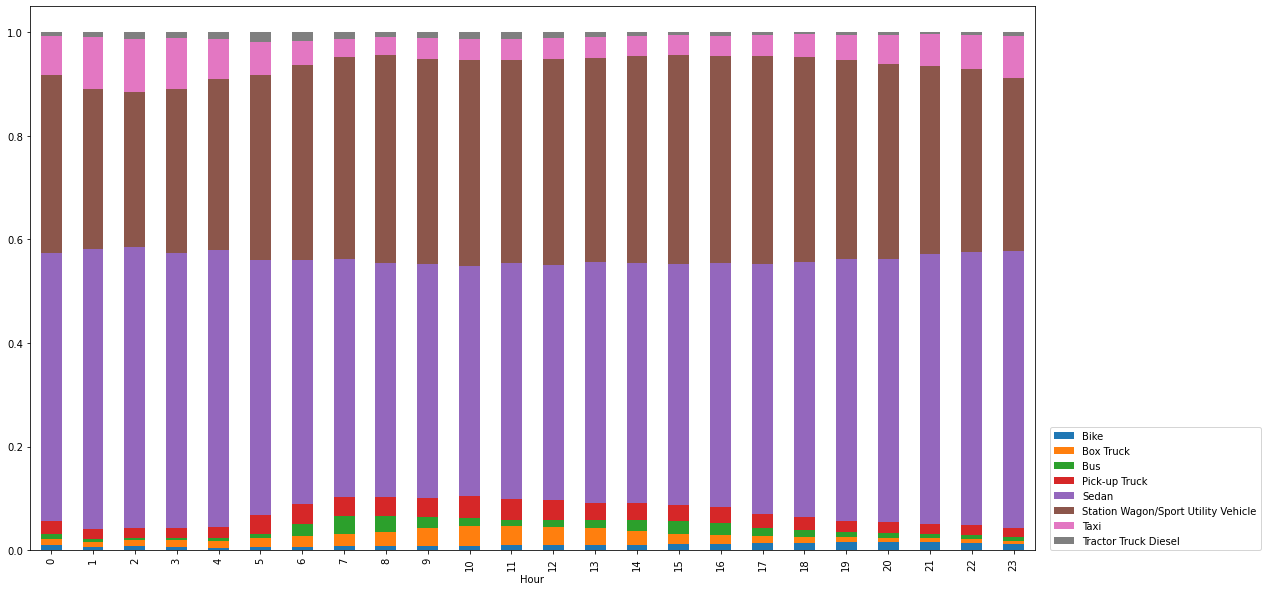

In [57]:
plt.rcParams["figure.figsize"] = (18,10)
Hour_vehicle['vehicle_type_percent'].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.23, -0.01))

### Main Reason In Different Time

In [58]:
Reasons_only = df1_2018_2020[['Hour','contributing_factor_vehicle_1']]

In [59]:
most_reasons = ['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing or Lane Usage Improper','Passing Too Closely','Unsafe Lane Changing','Other Vehicular','Turning Improperly','Traffic Control Disregarded','Unsafe Speed','Reaction to Uninvolved Vehicle','Driver Inexperience','Alcohol Involvement']
Reasons_only.loc[~Reasons_only['contributing_factor_vehicle_1'].isin(most_reasons)]= 'Others'

In [60]:
Hour_Reasons = Reasons_only.groupby(by=['Hour','contributing_factor_vehicle_1']).agg({'contributing_factor_vehicle_1':'count'})

In [61]:
Hour_Reasons['reasons_percent'] = 0.000
for i in range(24):
    Hour_Reasons.loc[i]['reasons_percent'] = list(Hour_Reasons.loc[i]['contributing_factor_vehicle_1']/sum(Hour_Reasons.loc[i]['contributing_factor_vehicle_1']))

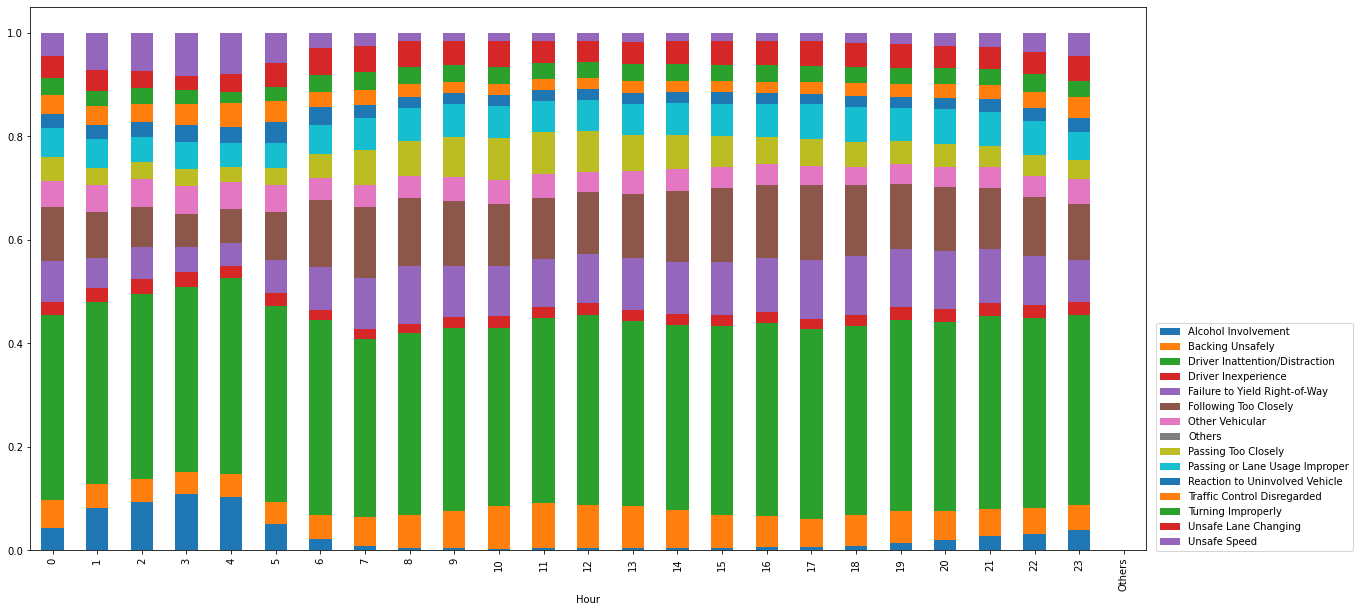

In [62]:
plt.rcParams["figure.figsize"] = (20,10)
Hour_Reasons['reasons_percent'].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.19, -0.01))

### Geo Distribution(collision number)

<AxesSubplot:>

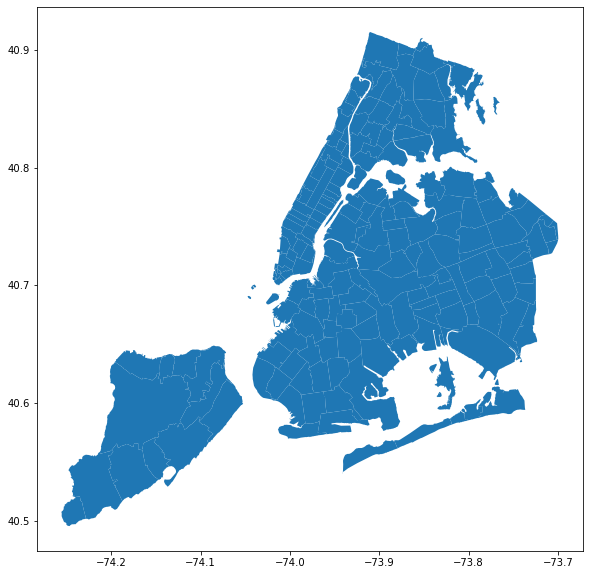

In [63]:
NYCzip=gpd.read_file(r"E:\Desk\NYU\Applied data\Group work\NY.geojson")
NYCzip.plot()

In [64]:
df_drop_empty_zipcode_2018_2020.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5', 'Date', 'Month', 'Year', 'DOW', 'Hour', 'day'],
      dtype='object')

In [65]:
Zipcode_distribution = df_drop_empty_zipcode_2018_2020.groupby(['zip_code']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()

In [66]:
CollisionGeo = Zipcode_distribution.merge(NYCzip,left_on='zip_code',right_on='zipcode')

In [67]:
CollisionGeo=CollisionGeo.loc[(CollisionGeo.zipcode>=10000)&(CollisionGeo.zipcode<11500)]
CollisionGeo.drop_duplicates(subset=['zipcode'],inplace=True)
CollisionGeo = gpd.GeoDataFrame(CollisionGeo,geometry = CollisionGeo['geometry'])

In [68]:
CollisionGeo['persons_injured_or_killed'] = CollisionGeo['number_of_persons_injured'] + CollisionGeo['number_of_persons_killed']
CollisionGeo['injured_or_killed_rate'] = CollisionGeo['persons_injured_or_killed'] / CollisionGeo['collision_count']
CollisionGeo['killed_rate'] = CollisionGeo['number_of_persons_killed'] / CollisionGeo['collision_count']
#CollisionGeo.set_index('day',inplace = True)

In [69]:
CollisionGeo.columns

Index(['zip_code', 'collision_count', 'number_of_persons_injured',
       'number_of_persons_killed', 'zipcode', 'geometry',
       'persons_injured_or_killed', 'injured_or_killed_rate', 'killed_rate'],
      dtype='object')

[Text(0.5, 1.0, 'killed_rate')]

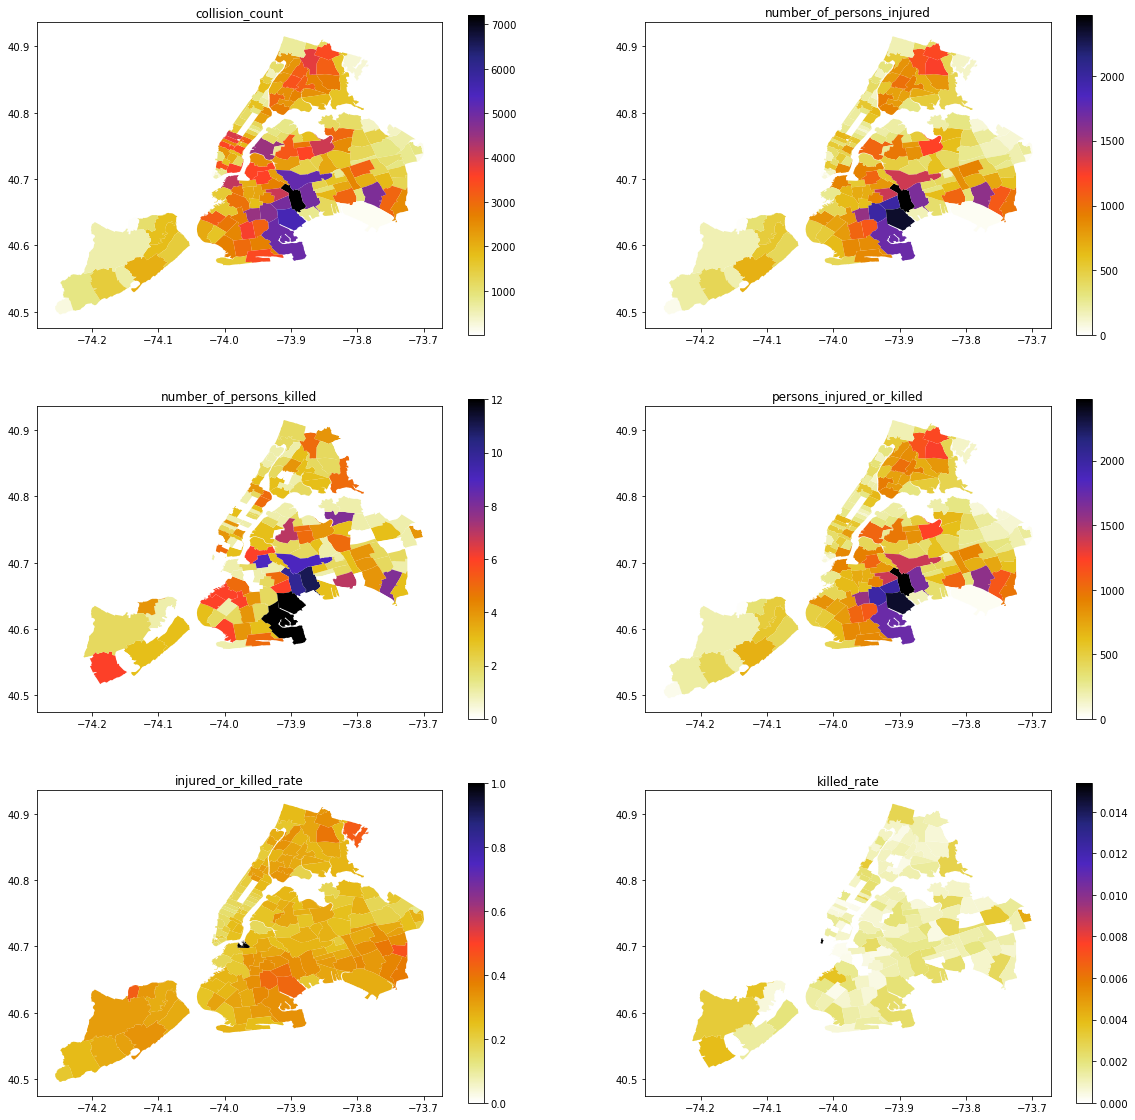

In [70]:
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(3, 2)

CollisionGeo.plot(ax = ax[0,0], column='collision_count',cmap='CMRmap_r', legend=True,k=10);ax[0,0].set(title='collision_count')
CollisionGeo.plot(ax = ax[0,1], column='number_of_persons_injured',cmap='CMRmap_r', legend=True,k=10);ax[0,1].set(title='number_of_persons_injured')
CollisionGeo.plot(ax = ax[1,0], column='number_of_persons_killed',cmap='CMRmap_r', legend=True,k=10);ax[1,0].set(title='number_of_persons_killed')
CollisionGeo.plot(ax = ax[1,1], column='persons_injured_or_killed',cmap='CMRmap_r', legend=True,k=10);ax[1,1].set(title='persons_injured_or_killed')
CollisionGeo.plot(ax = ax[2,0], column='injured_or_killed_rate',cmap='CMRmap_r', legend=True,k=10);ax[2,0].set(title='injured_or_killed_rate')
CollisionGeo.plot(ax = ax[2,1], column='killed_rate',cmap='CMRmap_r', legend=True,k=10);ax[2,1].set(title='killed_rate')

In [71]:
CollisionGeo.head()

zip_code  collision_count  number_of_persons_injured  \
0   10001.0             3539                      530.0   
1   10002.0             3642                      890.0   
2   10003.0             2078                      532.0   
3   10004.0              558                       89.0   
7   10005.0              299                       45.0   

   number_of_persons_killed  zipcode  \
0                       2.0  10001.0   
1                       3.0  10002.0   
2                       1.0  10003.0   
3                       0.0  10004.0   
7                       0.0  10005.0   

                                            geometry  \
0  POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...   
1  POLYGON Z ((-73.97442 40.73642 0.00000, -73.97...   
2  POLYGON Z ((-73.97986 40.73497 0.00000, -73.98...   
3  POLYGON Z ((-74.00597 40.70432 0.00000, -74.00...   
7  POLYGON Z ((-74.00597 40.70432 0.00000, -74.00...   

   persons_injured_or_killed  injured_or_killed_rate  killed_rate  
0                      532.0                0.150325     0.000565  
1                      893.0                0.245195     0.000824  
2                      533.0                0.256497     0.000481  
3                       89.0                0.159498     0.000000  
7                       45.0                0.150502     0.000000

In [72]:
df_drop_empty_zipcode_2018_2020_1 = df_drop_empty_zipcode_2018_2020[['zip_code','collision_id','number_of_persons_injured','number_of_persons_killed','Date']]
df_drop_empty_zipcode_2018_2020_1

zip_code  collision_id  number_of_persons_injured  \
13      11201.0       4136992                        0.0   
1044    10019.0       4408441                        1.0   
4430    11436.0       4412513                        0.0   
4821    10036.0       4411898                        0.0   
8151    10032.0       4415453                        2.0   
...         ...           ...                        ...   
698539  11204.0       3828035                        1.0   
698543  11385.0       3828610                        0.0   
698544  11203.0       3837602                        0.0   
698546  10034.0       3830852                        1.0   
698548  11222.0       3829741                        0.0   

        number_of_persons_killed        Date  
13                           0.0  2019-05-21  
1044                         0.0  2020-04-17  
4430                         0.0  2020-05-02  
4821                         0.0  2020-12-31  
8151                         0.0  2020-05-10  
...                          ...         ...  
698539                       0.0  2018-01-11  
698543                       0.0  2018-01-13  
698544                       0.0  2018-01-26  
698546                       0.0  2018-01-14  
698548                       0.0  2018-01-17  

[359840 rows x 5 columns]

In [73]:
Zipcode_distribution1 = df_drop_empty_zipcode_2018_2020_1.groupby(['zip_code','Date']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()

In [74]:
Zipcode_distribution1

zip_code        Date  collision_count  number_of_persons_injured  \
0        10000.0  2018-01-09                1                        0.0   
1        10000.0  2018-01-27                1                        0.0   
2        10000.0  2018-02-07                1                        0.0   
3        10000.0  2018-02-14                1                        0.0   
4        10000.0  2018-02-17                1                        0.0   
...          ...         ...              ...                        ...   
136993   11697.0  2020-10-08                1                        1.0   
136994   11697.0  2020-10-17                1                        0.0   
136995   11697.0  2020-11-05                1                        0.0   
136996   11697.0  2020-11-24                1                        0.0   
136997   11697.0  2020-12-10                1                        0.0   

        number_of_persons_killed  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
136993                       0.0  
136994                       0.0  
136995                       0.0  
136996                       0.0  
136997                       0.0  

[136998 rows x 5 columns]

# Data Preproccesing for the Time-series Model

In [75]:
df2_Monthly = df1_2018_2020.groupby(['Date']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df2_Monthly = df2_Monthly.sort_values(by='Date')

df2_Monthly['persons_injured_or_killed'] = df2_Monthly['number_of_persons_injured'] + df2_Monthly['number_of_persons_killed']
df2_Monthly['injured_or_killed_rate'] = df2_Monthly['persons_injured_or_killed'] / df2_Monthly['collision_count']
df2_Monthly['killed_rate'] = df2_Monthly['number_of_persons_killed'] / df2_Monthly['collision_count']

df2_Monthly.set_index('Date',inplace = False)
df2_Monthly.head()

Date  collision_count  number_of_persons_injured  \
0  2018-01-01              453                      125.0   
1  2018-01-02              654                      160.0   
2  2018-01-03              645                      154.0   
3  2018-01-04              464                       60.0   
4  2018-01-05              700                      115.0   

   number_of_persons_killed  persons_injured_or_killed  \
0                       0.0                      125.0   
1                       0.0                      160.0   
2                       0.0                      154.0   
3                       0.0                       60.0   
4                       1.0                      116.0   

   injured_or_killed_rate  killed_rate  
0                0.275938     0.000000  
1                0.244648     0.000000  
2                0.238760     0.000000  
3                0.129310     0.000000  
4                0.165714     0.001429

In [76]:
df2_Monthly['Date'] = pd.to_datetime(df2_Monthly['Date']).dt.to_period('M')
df2_Monthly = df2_Monthly.groupby(['Date'])[['collision_count','persons_injured_or_killed']].sum().reset_index()
#df2_Monthly.set_index('Date',inplace = True)
df2_Monthly.head(100)

Date  collision_count  persons_injured_or_killed
0   2018-01            18122                     4475.0
1   2018-02            15990                     4064.0
2   2018-03            19274                     4770.0
3   2018-04            18195                     4693.0
4   2018-05            20843                     5681.0
5   2018-06            20796                     5639.0
6   2018-07            19707                     5509.0
7   2018-08            19642                     5575.0
8   2018-09            19237                     5599.0
9   2018-10            20820                     5675.0
10  2018-11            19436                     5053.0
11  2018-12            19501                     5439.0
12  2019-01            16929                     4449.0
13  2019-02            16065                     4187.0
14  2019-03            17759                     4653.0
15  2019-04            16829                     4831.0
16  2019-05            19588                     5751.0
17  2019-06            19516                     5948.0
18  2019-07            18420                     5678.0
19  2019-08            17215                     5516.0
20  2019-09            17541                     5333.0
21  2019-10            17611                     5290.0
22  2019-11            16953                     4788.0
23  2019-12            17059                     5209.0
24  2020-01            14366                     4248.0
25  2020-02            13704                     4065.0
26  2020-03            11078                     3172.0
27  2020-04             4130                     1326.0
28  2020-05             6163                     2563.0
29  2020-06             7641                     3661.0
30  2020-07             9277                     4376.0
31  2020-08             9821                     4753.0
32  2020-09             9609                     4732.0
33  2020-10             9710                     4383.0
34  2020-11             9028                     4149.0
35  2020-12             8378                     3446.0

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

#from IPython.display import Image

import seaborn as sns
sns.set()

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import numpy as np
from scipy.signal import periodogram
import statsmodels.api as sm
import dask.dataframe as dd

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
import warnings
warnings.filterwarnings('ignore')

# For dataset on Monthly Collision count from 2018 to 2020

In [78]:
lm=sm.OLS(df2_Monthly.collision_count[:36],sm.add_constant(df2_Monthly.Date.index[:36])).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     67.30
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.43e-09
Time:                        16:05:58   Log-Likelihood:                -335.81
No. Observations:                  36   AIC:                             675.6
Df Residuals:                      34   BIC:                             678.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.189e+04    914.410     23.943      0.0

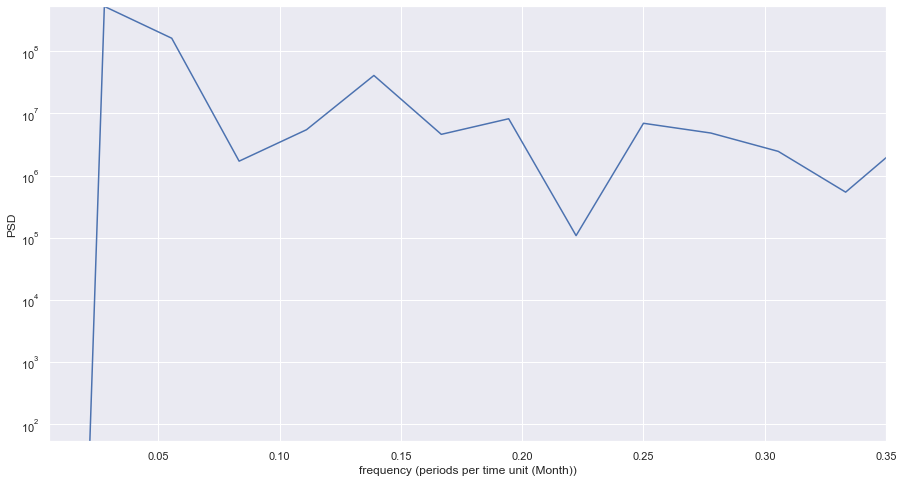

Strongest period length = 18.0


In [79]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df2_Monthly['collision_count'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Month))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e7,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 3 years (Total 36 months) 
PSD = PSD[f>0.02778]
f = f[f>0.02778] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

In [80]:
from statsmodels.tsa.stattools import adfuller

series=df2_Monthly['collision_count']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.748015
p-value: 0.833918
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


From the above result, the P-value is 0.833918 meaning that we can't reject the null hypothesis, so the time-series is not stationary.

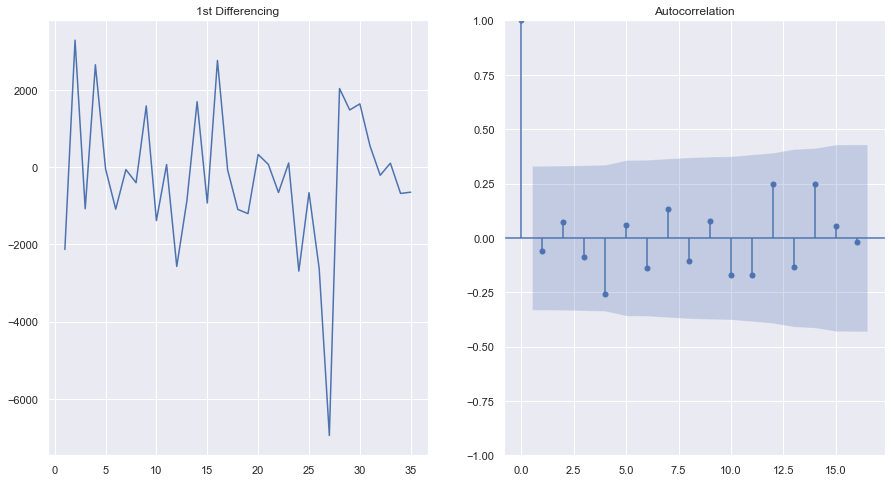

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].plot(df2_Monthly['collision_count'].diff()); axes[0].set_title('1st Differencing')
plot_acf(df2_Monthly['collision_count'].diff().dropna(), ax=axes[1])

plt.show()

From the above result, we could choose MA(q) = 1.

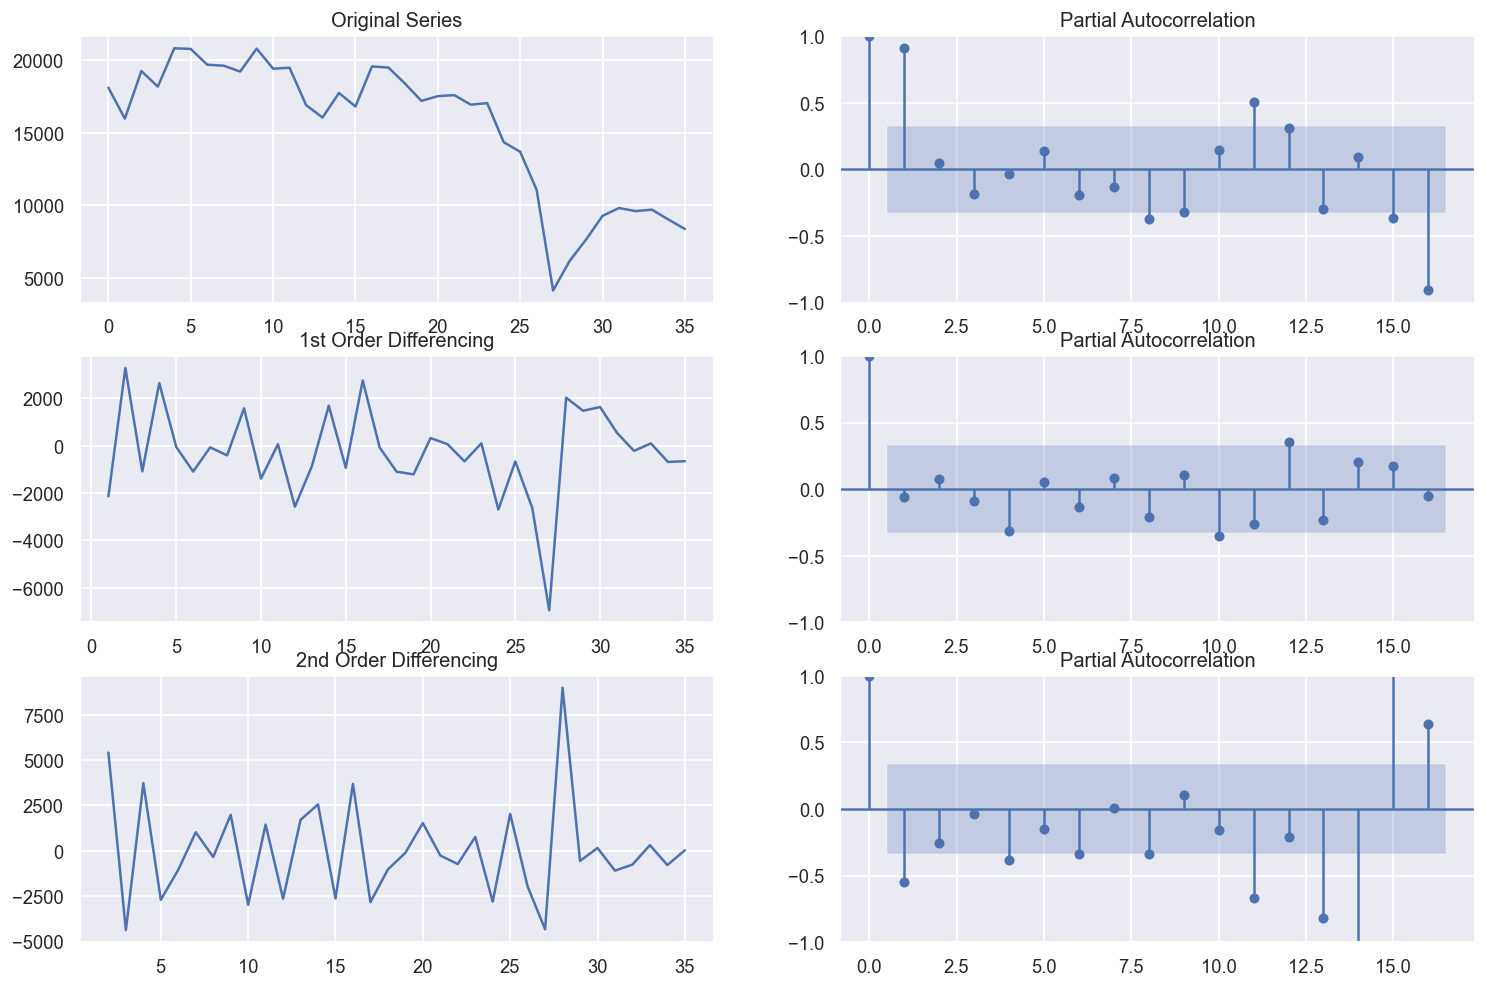

In [82]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df2_Monthly['collision_count']); axes[0, 0].set_title('Original Series')
plot_pacf(df2_Monthly['collision_count'], ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(df2_Monthly['collision_count'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df2_Monthly['collision_count'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[2, 0].plot(df2_Monthly['collision_count'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df2_Monthly['collision_count'].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

plt.show()

From the above result and 1st Order Differencing, we could choose d = 1.

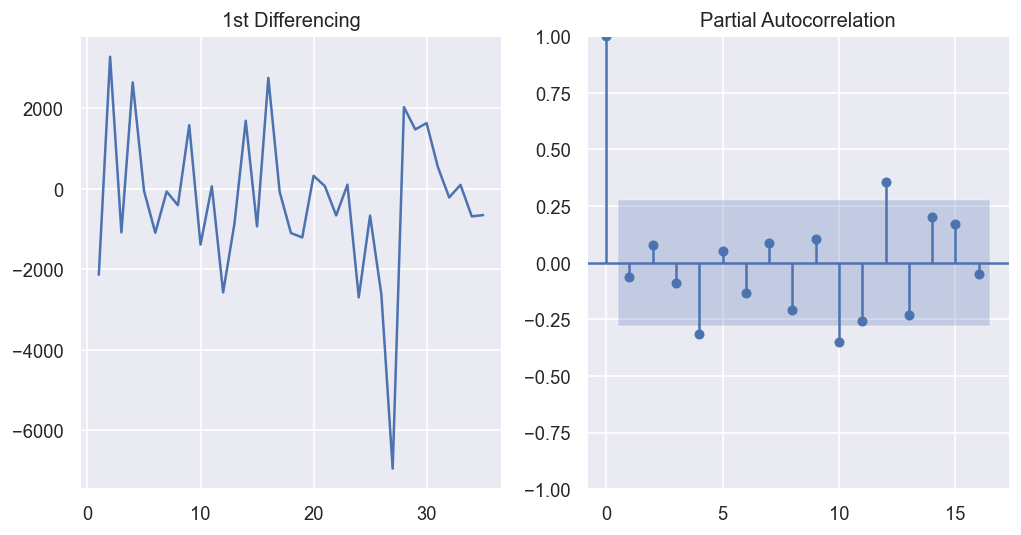

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df2_Monthly['collision_count'].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df2_Monthly['collision_count'].diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations

plt.show()

From the above result and 1st Order Differencing, we could choose AR(p) = 1.

In [84]:
import statsmodels.api as sm

In [85]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

                               SARIMAX Results                                
Dep. Variable:        collision_count   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -196.367
Date:                Tue, 03 May 2022   AIC                            398.735
Time:                        16:06:01   BIC                            402.141
Sample:                             0   HQIC                           399.591
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6761      0.208     -3.251      0.001      -1.084      -0.268
ma.L1          0.4675      0.317      1.476      0.140      -0.153       1.088
sigma2      1.466e+06   6.03e+05      2.432      0.0

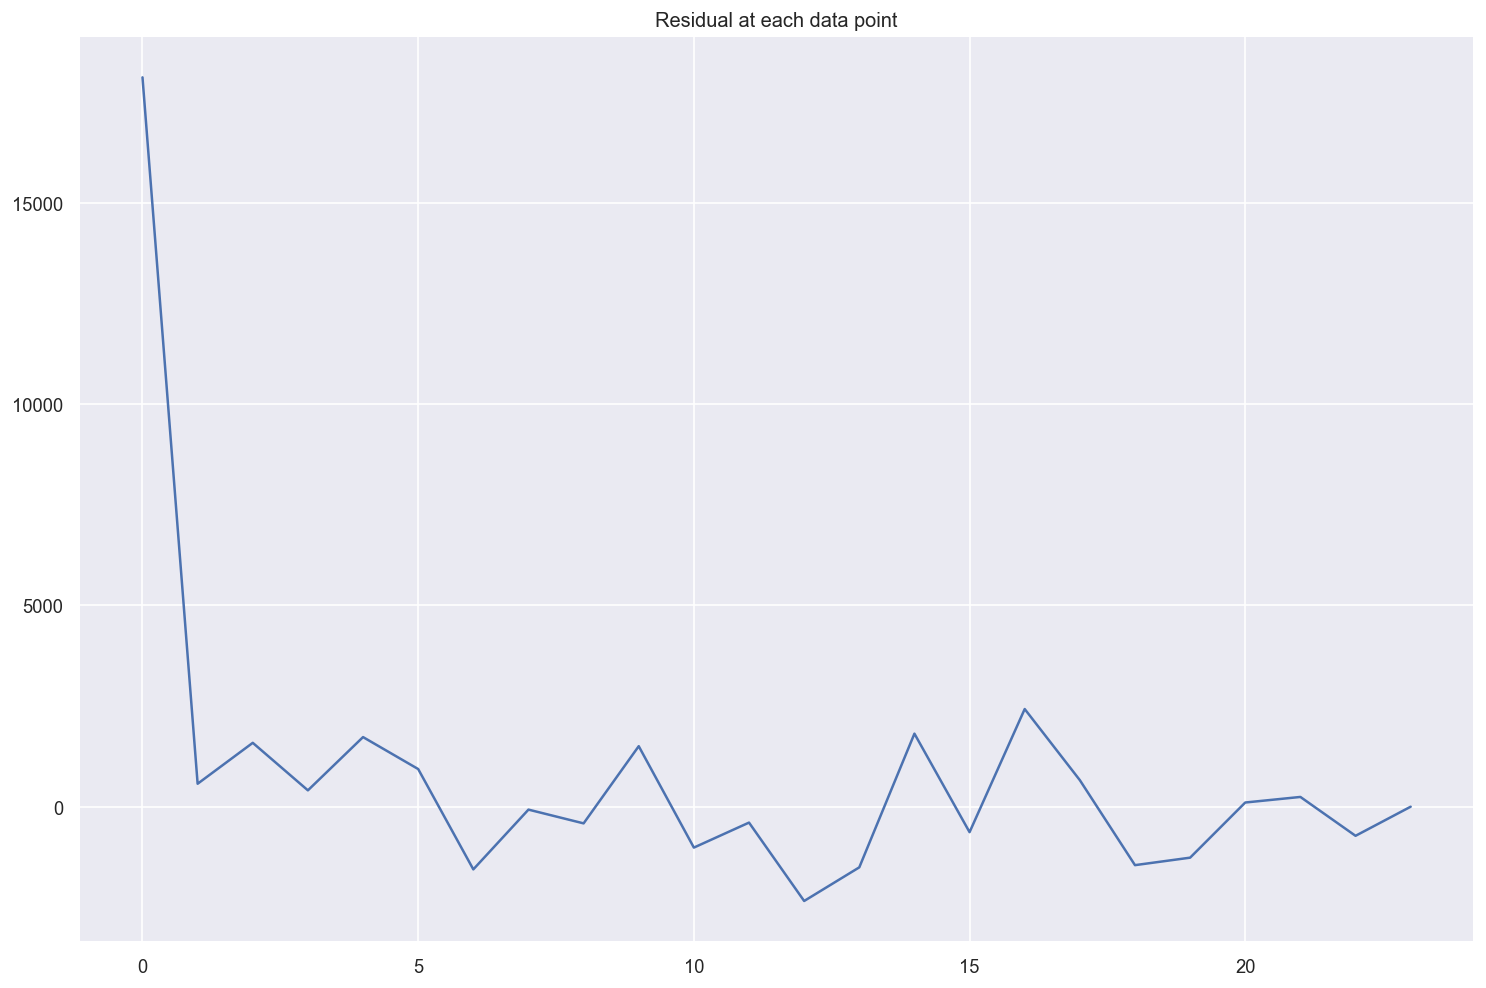

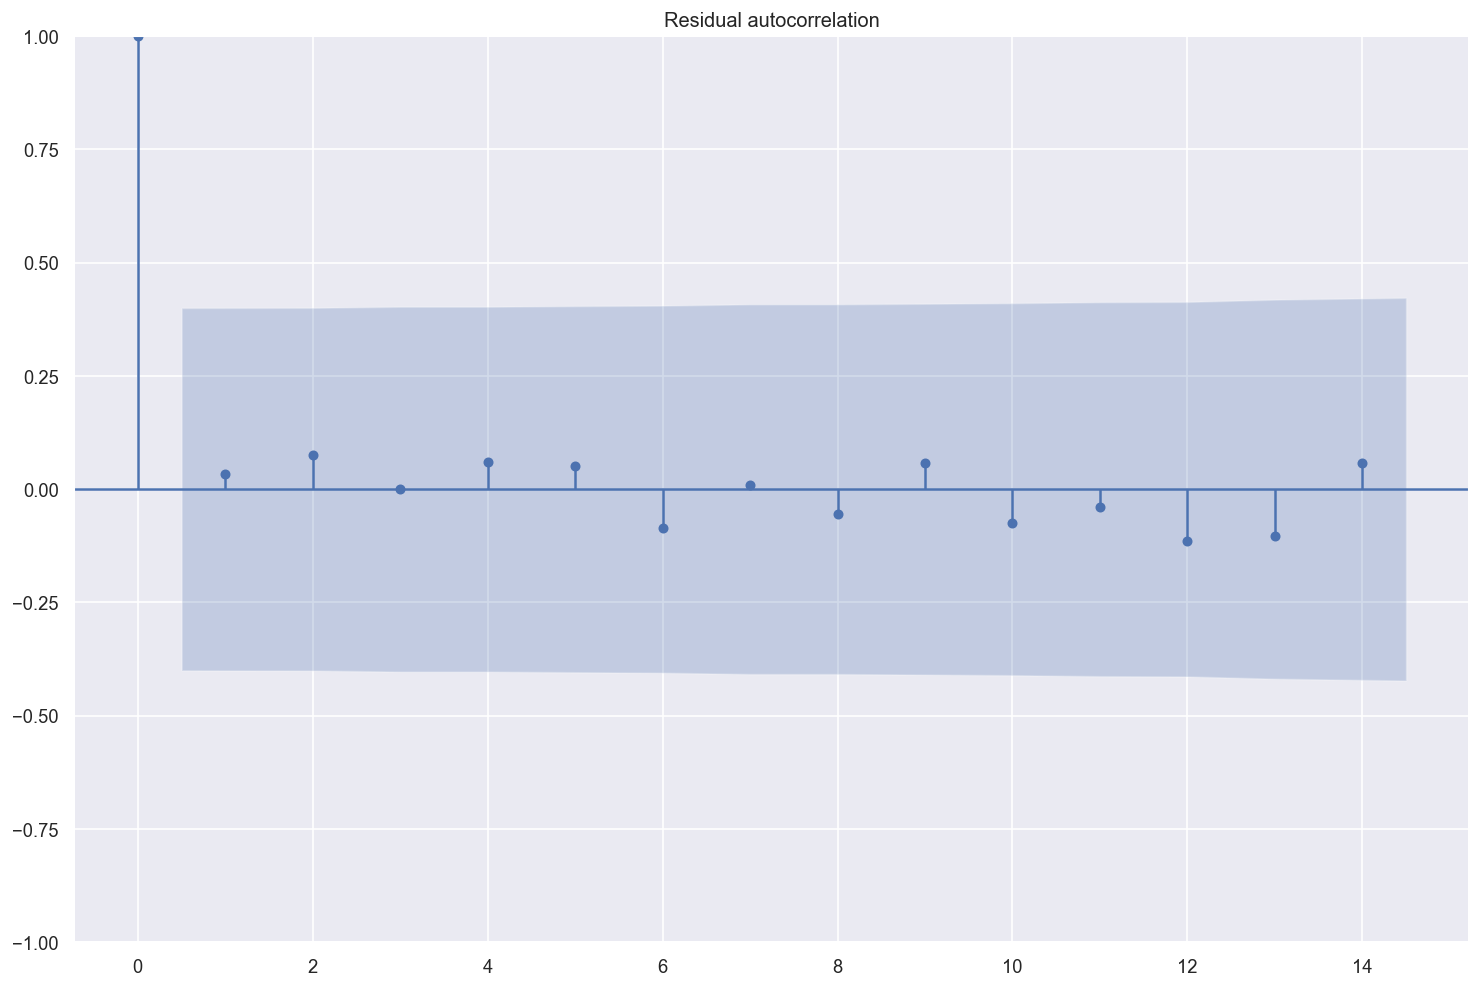

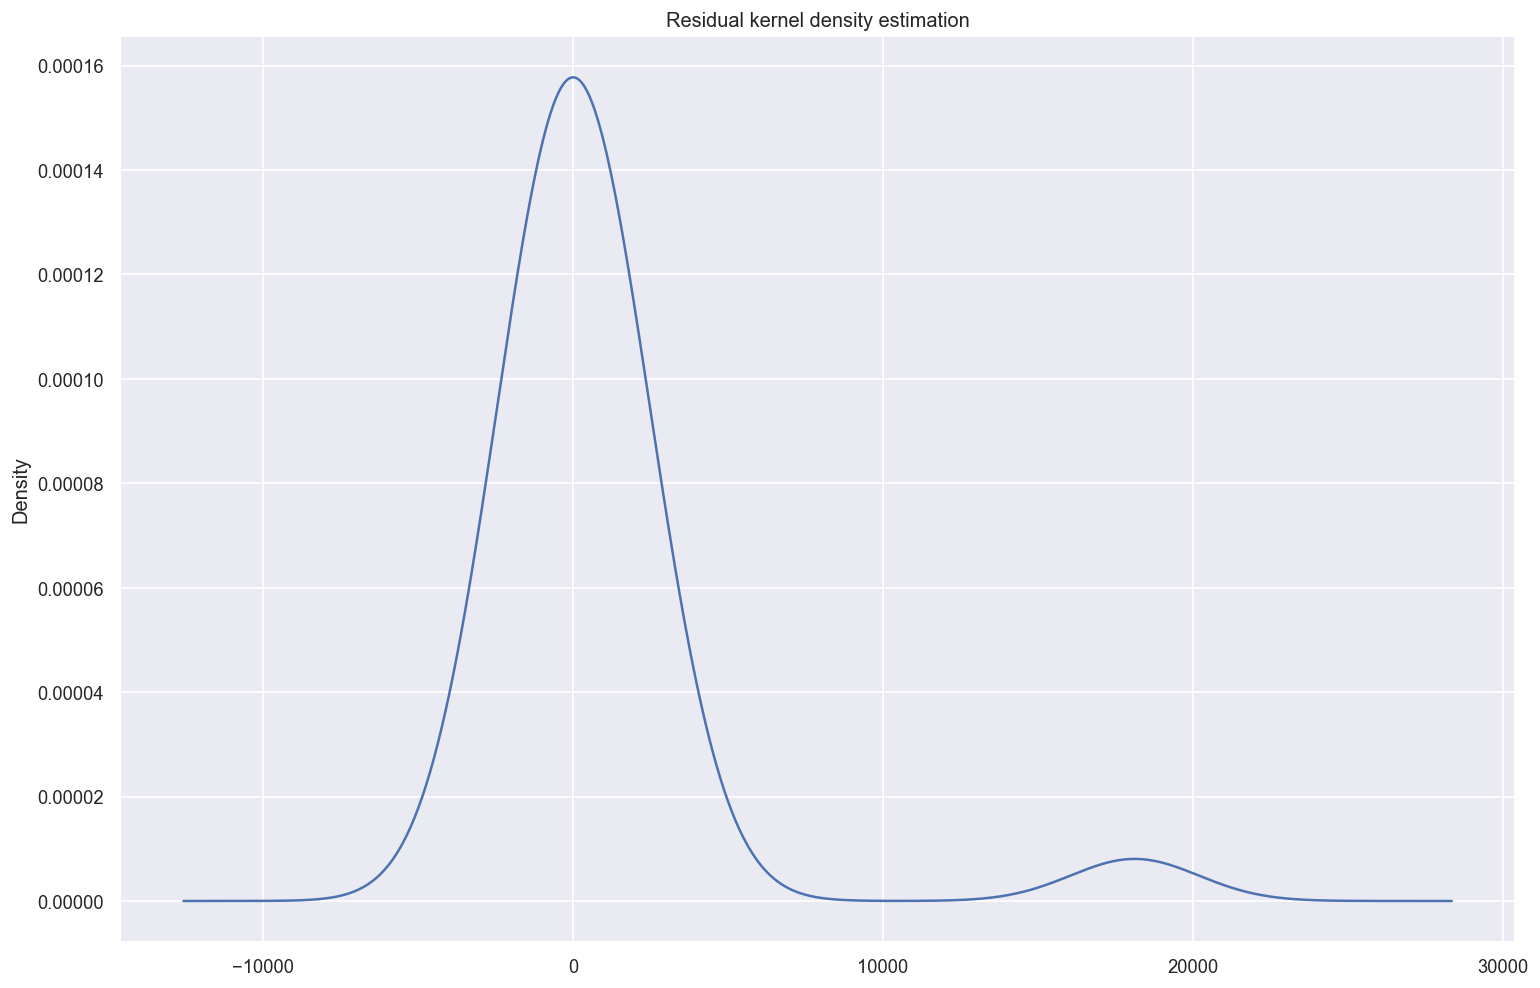

                  0
count     24.000000
mean     779.665892
std     3894.413965
min    -2343.176454
25%     -796.978091
50%       51.548632
75%     1077.154229
max    18122.000000
p value is  5.964355421689825e-12
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  0.028480   0.865985
2  0.194507   0.907326
3  0.194544   0.978465
4  0.302737   0.989637


In [86]:
#Build the ARIMA Model, training on the 24-month dataset
P=1
D=1
Q=1

# fit model
N = 24
series = df2_Monthly['collision_count']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [87]:

X = pd.DataFrame(range(N),columns=['Month'])
X = sm.add_constant(X)
lm=sm.OLS(df2_Monthly['collision_count'][:N],X).fit()
insample = lm.predict(X)
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     3.575
Date:                Tue, 03 May 2022   Prob (F-statistic):             0.0719
Time:                        16:06:01   Log-Likelihood:                -206.89
No. Observations:                  24   AIC:                             417.8
Df Residuals:                      22   BIC:                             420.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.936e+04    554.628     34.904      0.0

In [88]:
N1 = 15
series1 = df2_Monthly['collision_count']
model1 = sm.tsa.arima.ARIMA(series[:N1], order=(P,D,Q))
model_fit1 = model1.fit()

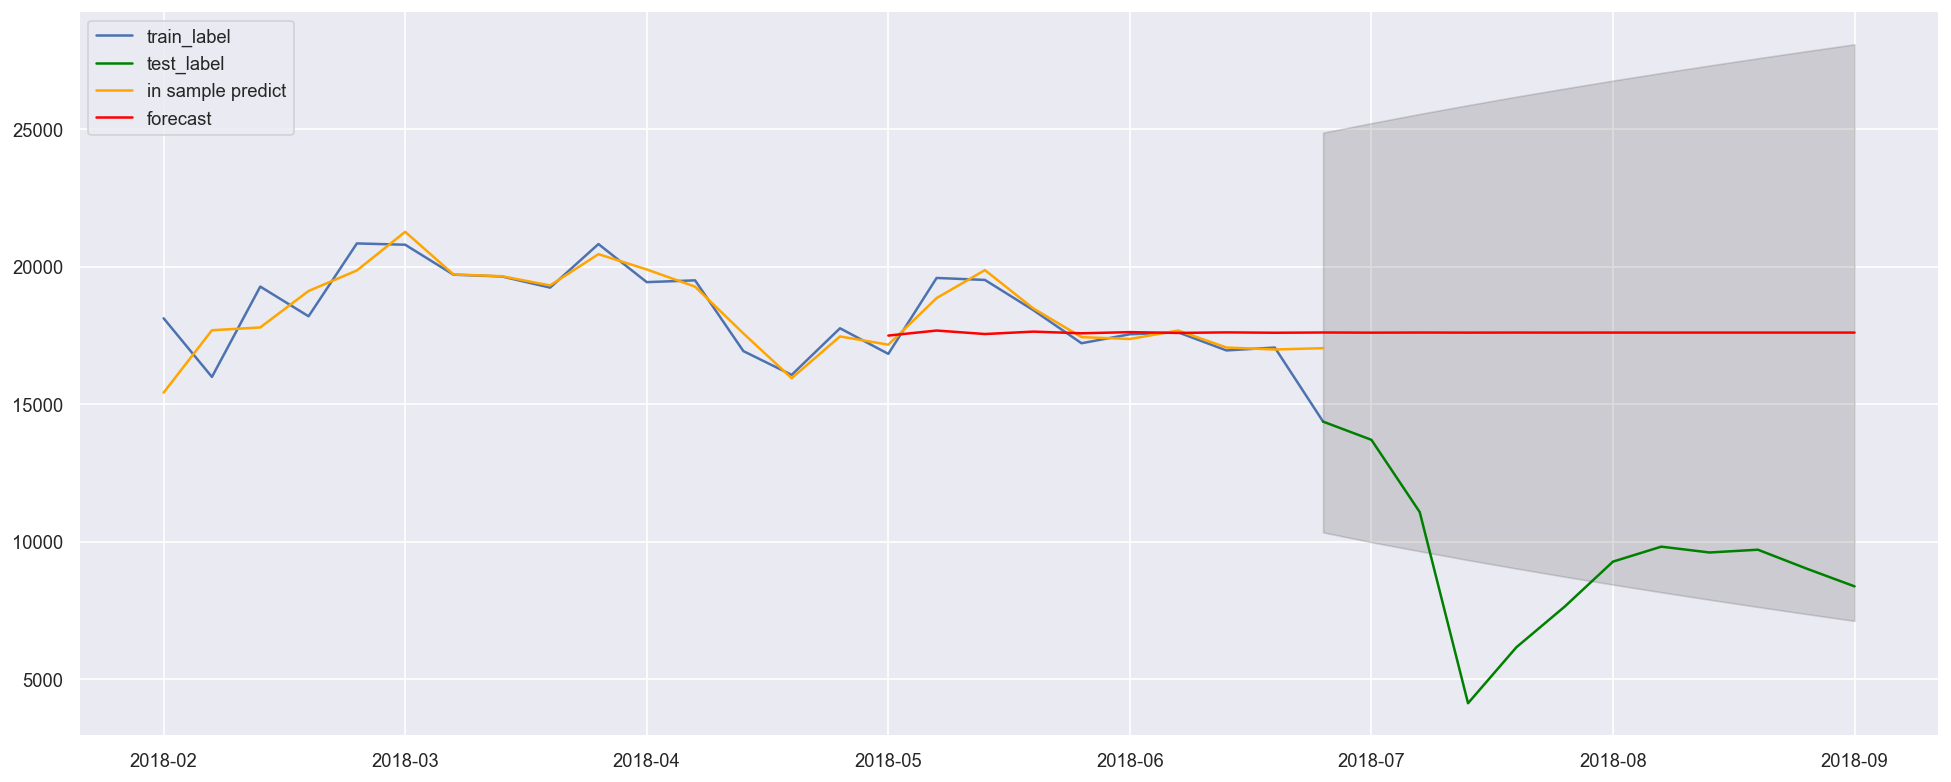

In [89]:
# Forecast

fcast = model_fit1.forecast(steps=len(series)-N1, alpha = 0.5)  # 95% conf
fc = model_fit1.get_forecast(steps=len(series)-N1, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N1,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df2_Monthly.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.set_xticklabels(df2_Monthly['Date'])
ax.legend(loc='upper left')

In [90]:
X = pd.DataFrame(range(N-1,len(df2_Monthly)),columns=['Month'])
X = sm.add_constant(X)
pred = lm.predict(X)

Text(0.5, 1.0, 'Monthly Collision count')

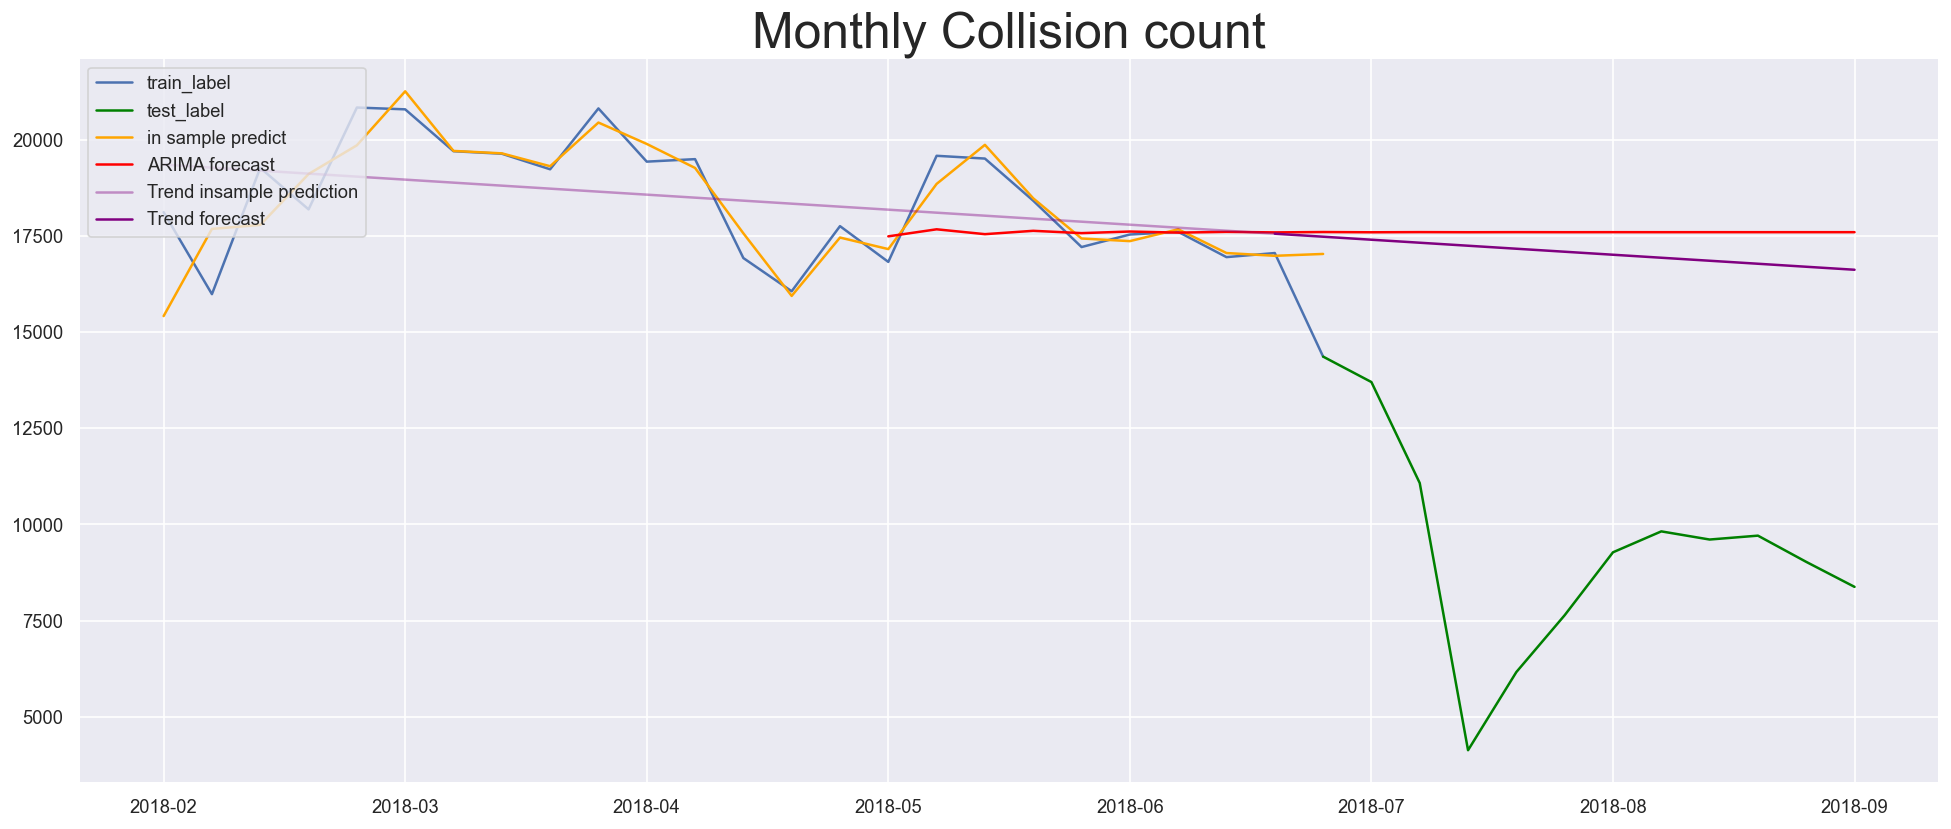

In [91]:
fig, ax = plt.subplots()
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample

ax.plot(fc_series, label='ARIMA forecast', color='red')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.4)
ax.plot(range(N-1,len(df2_Monthly)),pred, label='Trend forecast', color='purple')
ax.set_xticklabels(df2_Monthly['Date'])
plt.legend(loc='upper left')
plt.title('Monthly Collision count', fontsize=30)

# For dataset on Monthly persons_injured_or_killed count from 2018 to 2020

In [92]:
lm=sm.OLS(df2_Monthly.persons_injured_or_killed[:36],sm.add_constant(df2_Monthly.persons_injured_or_killed.index[:36])).fit()
print (lm.summary())

                                OLS Regression Results                               
Dep. Variable:     persons_injured_or_killed   R-squared:                       0.221
Model:                                   OLS   Adj. R-squared:                  0.198
Method:                        Least Squares   F-statistic:                     9.630
Date:                       Tue, 03 May 2022   Prob (F-statistic):            0.00384
Time:                               16:06:02   Log-Likelihood:                -294.16
No. Observations:                         36   AIC:                             592.3
Df Residuals:                             34   BIC:                             595.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

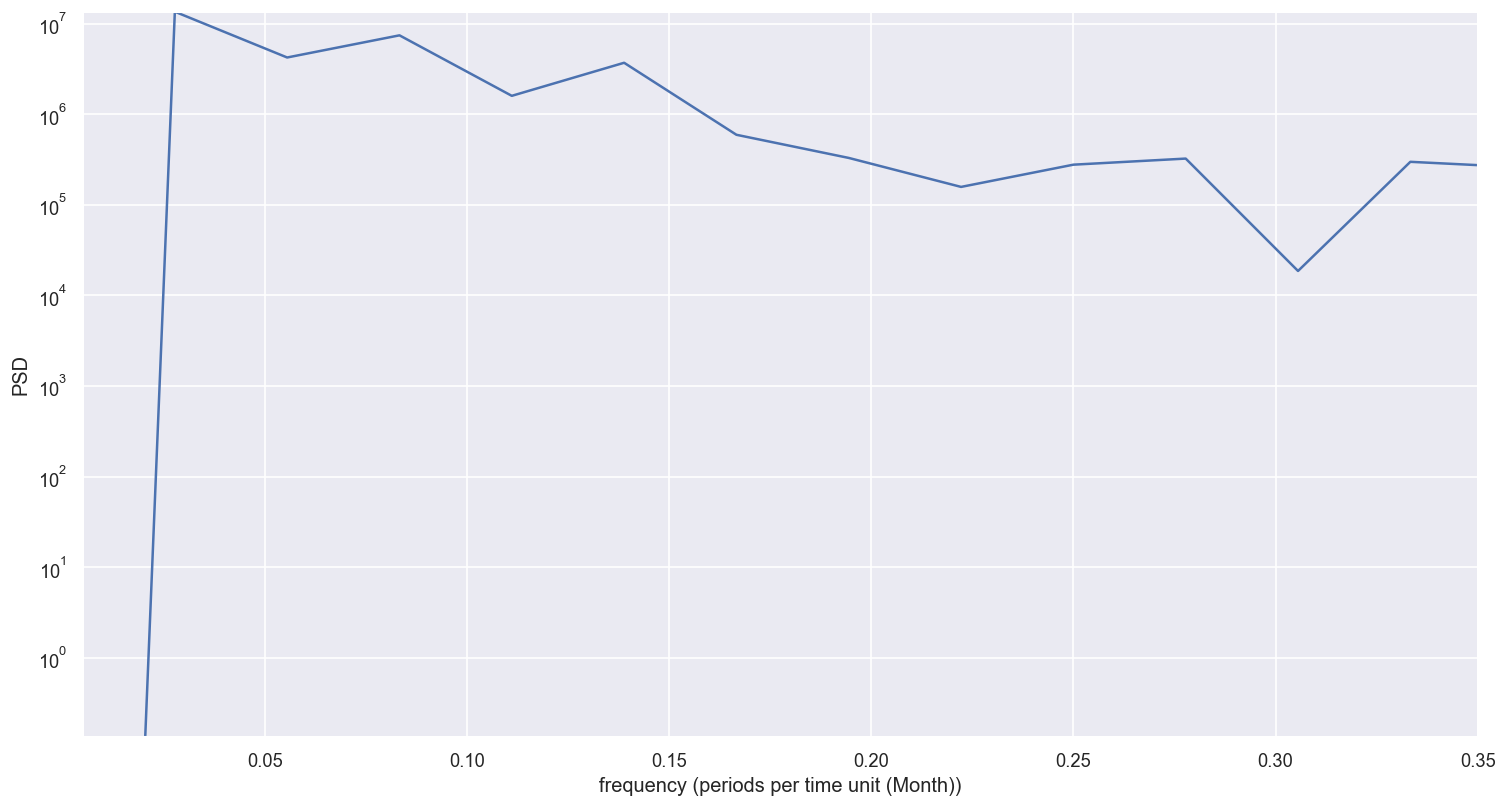

Strongest period length = 12.0


In [93]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df2_Monthly['persons_injured_or_killed'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Month))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e8,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 3 years (Total 36 weeks) 
PSD = PSD[f>0.02778]
f = f[f>0.02778] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

In [94]:
from statsmodels.tsa.stattools import adfuller

series=df2_Monthly['persons_injured_or_killed']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.775080
p-value: 0.392902
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


From the above result, the P-value is 0.392902 meaning that we can't reject the null hypothesis, so the time-series is not stationary.

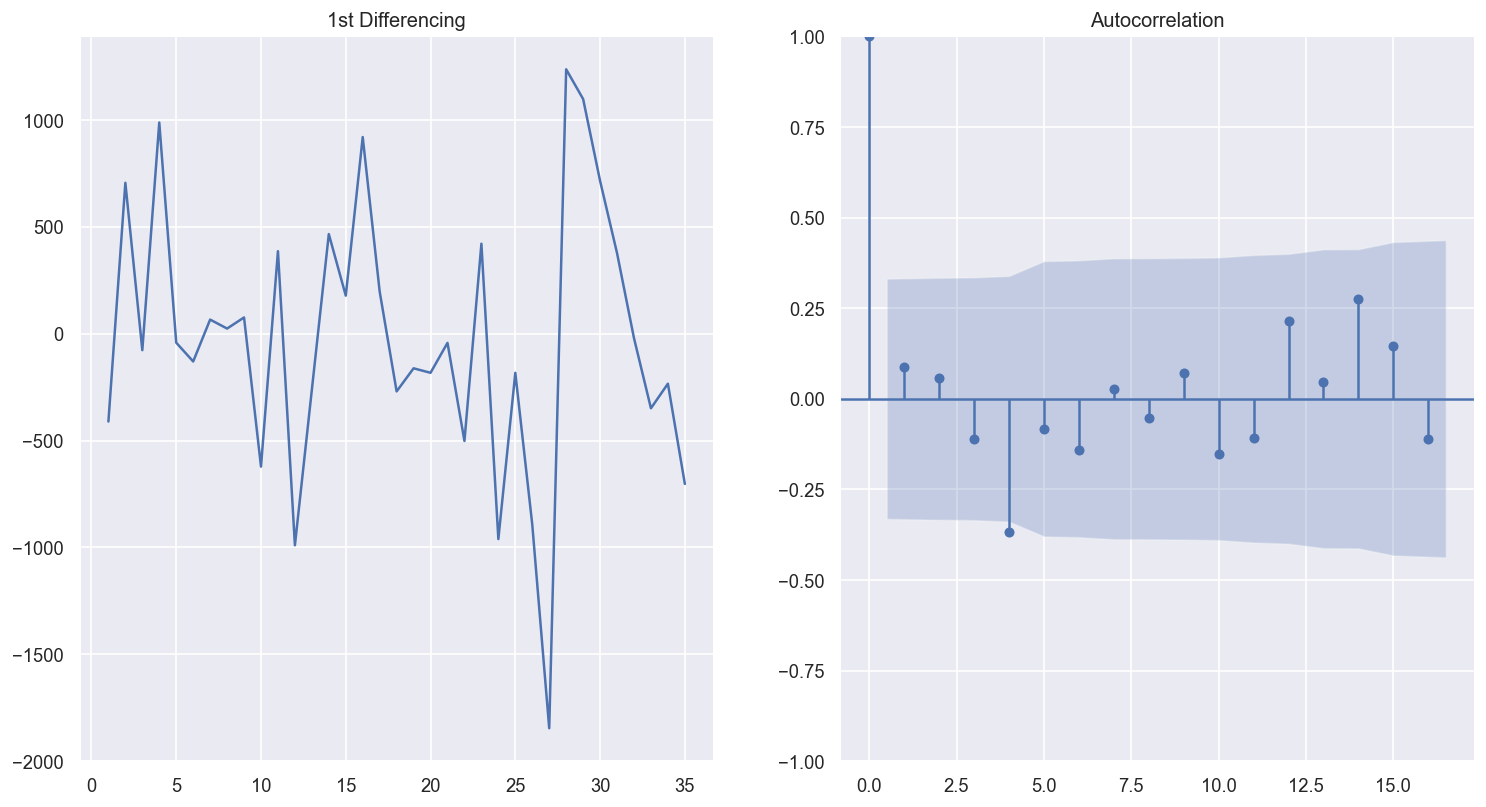

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].plot(df2_Monthly['persons_injured_or_killed'].diff()); axes[0].set_title('1st Differencing')
plot_acf(df2_Monthly['persons_injured_or_killed'].diff().dropna(), ax=axes[1])

plt.show()

From the above result, we could choose MA(p) = 1.

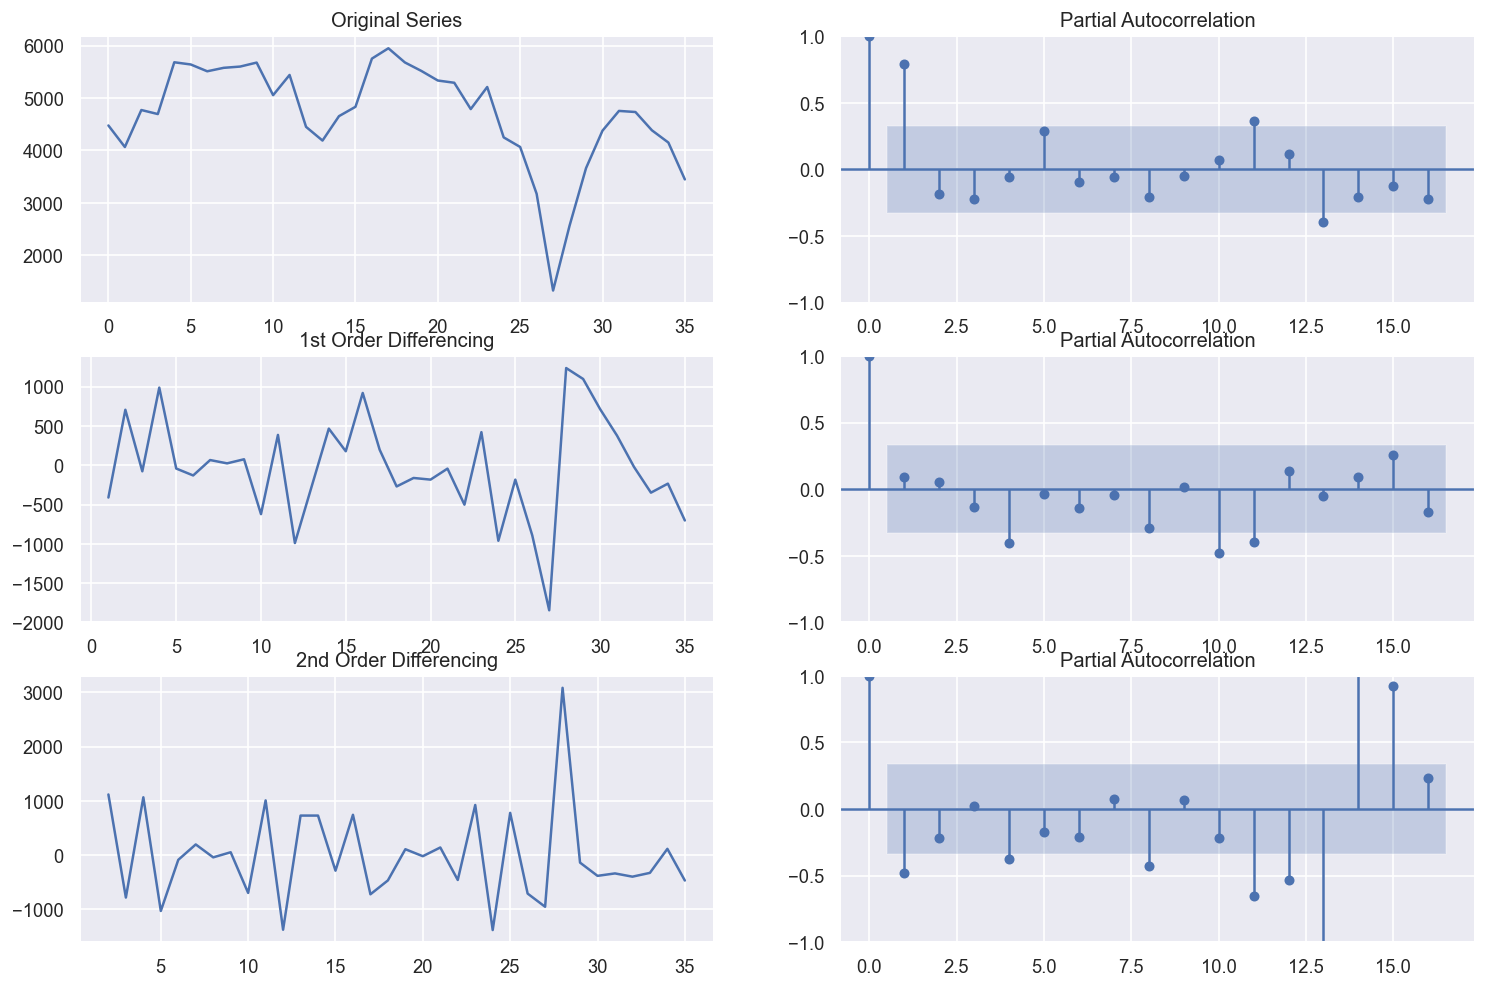

In [96]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df2_Monthly['persons_injured_or_killed']); axes[0, 0].set_title('Original Series')
plot_pacf(df2_Monthly['persons_injured_or_killed'], ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(df2_Monthly['persons_injured_or_killed'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df2_Monthly['persons_injured_or_killed'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[2, 0].plot(df2_Monthly['persons_injured_or_killed'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df2_Monthly['persons_injured_or_killed'].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

plt.show()

From the above result, we could choose d = 1.

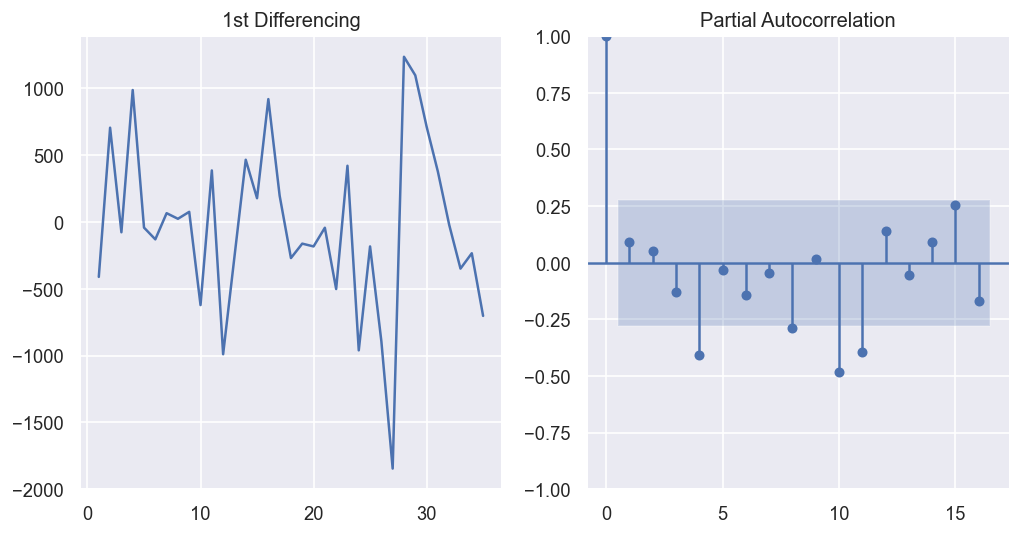

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df2_Monthly['persons_injured_or_killed'].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df2_Monthly['persons_injured_or_killed'].diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations

plt.show()

From the above result, we could choose AR(q) = 4.

                                   SARIMAX Results                                   
Dep. Variable:     persons_injured_or_killed   No. Observations:                   24
Model:                        ARIMA(1, 1, 4)   Log Likelihood                -172.449
Date:                       Tue, 03 May 2022   AIC                            356.897
Time:                               16:06:05   BIC                            363.710
Sample:                                    0   HQIC                           358.611
                                        - 24                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4643      0.212     -2.194      0.028      -0.879      -0.049
ma.L1          0.3301   2.97e+04   1.11e-05      1.000   -5.82e+04    5.82e

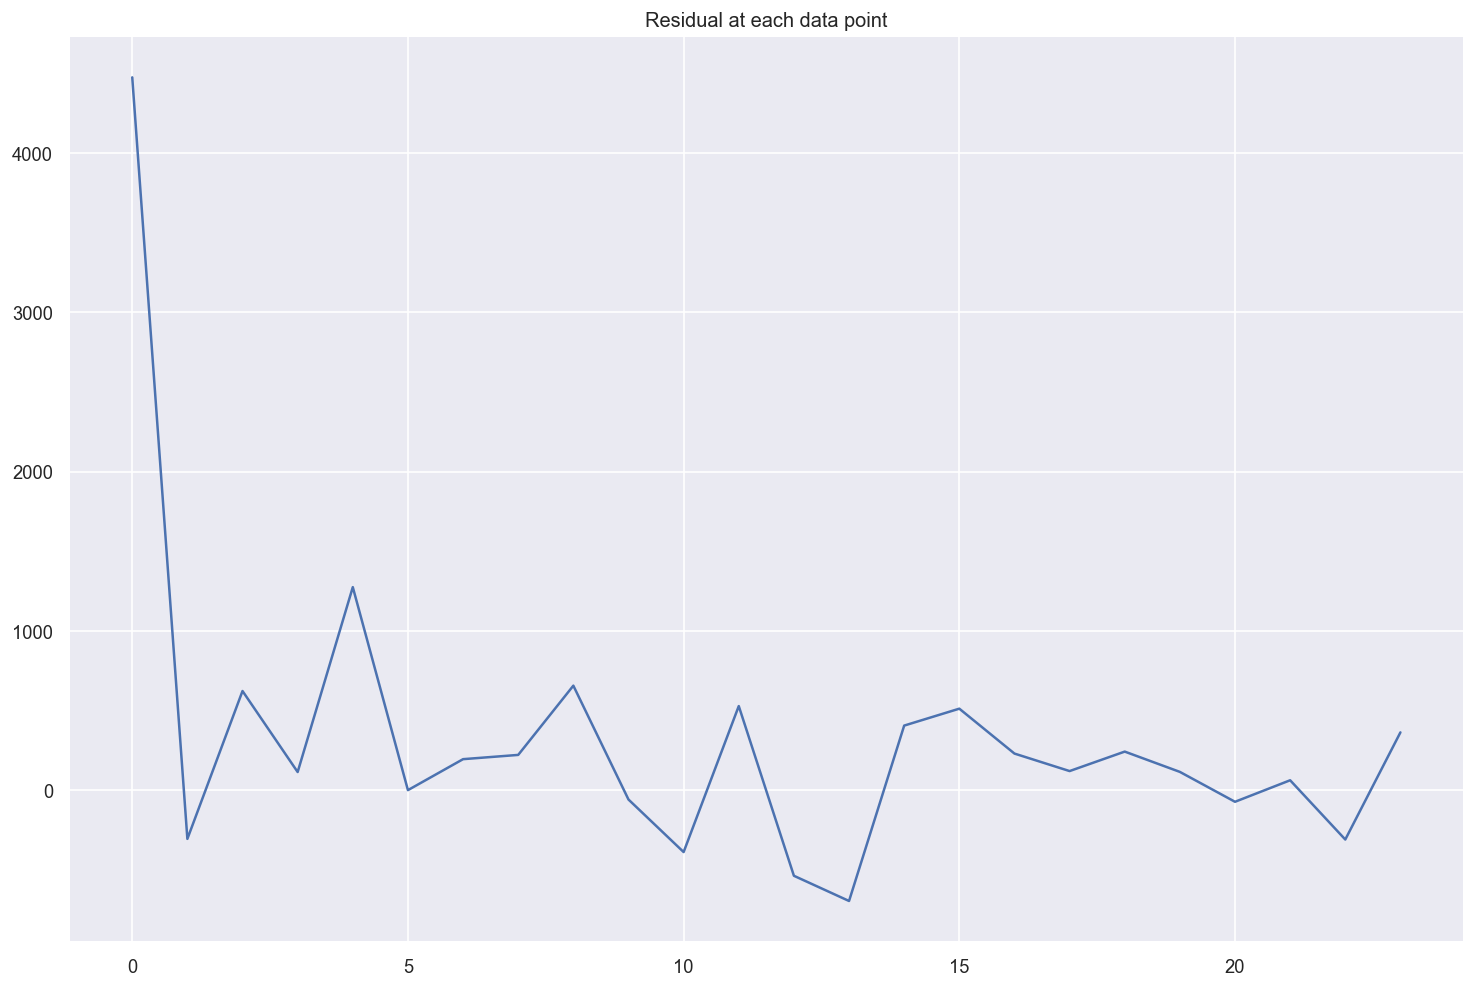

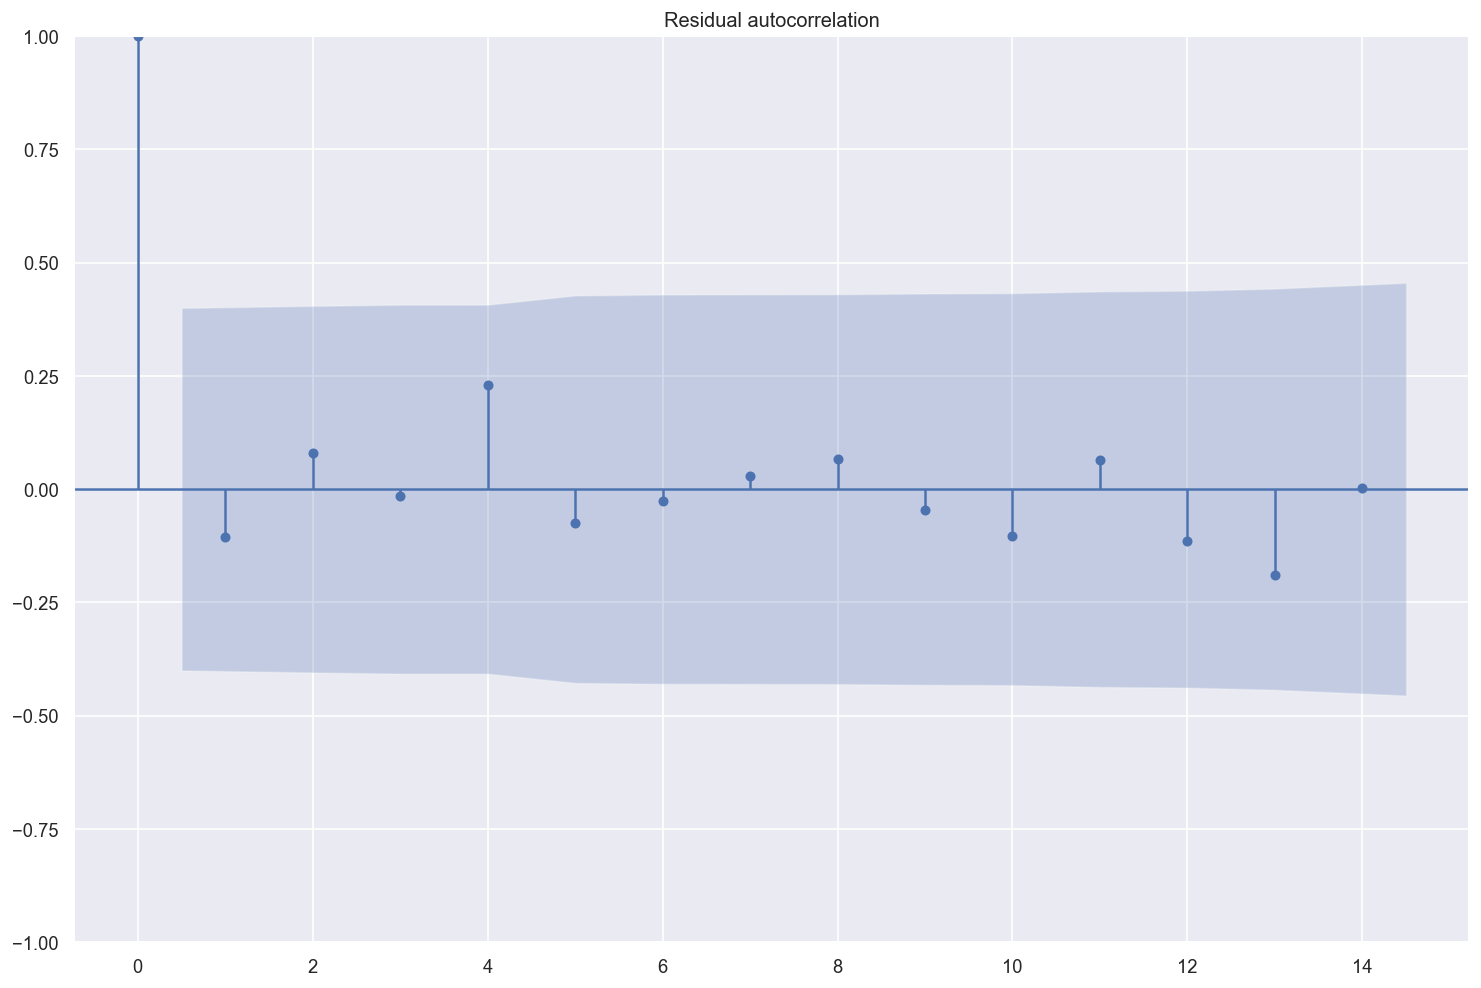

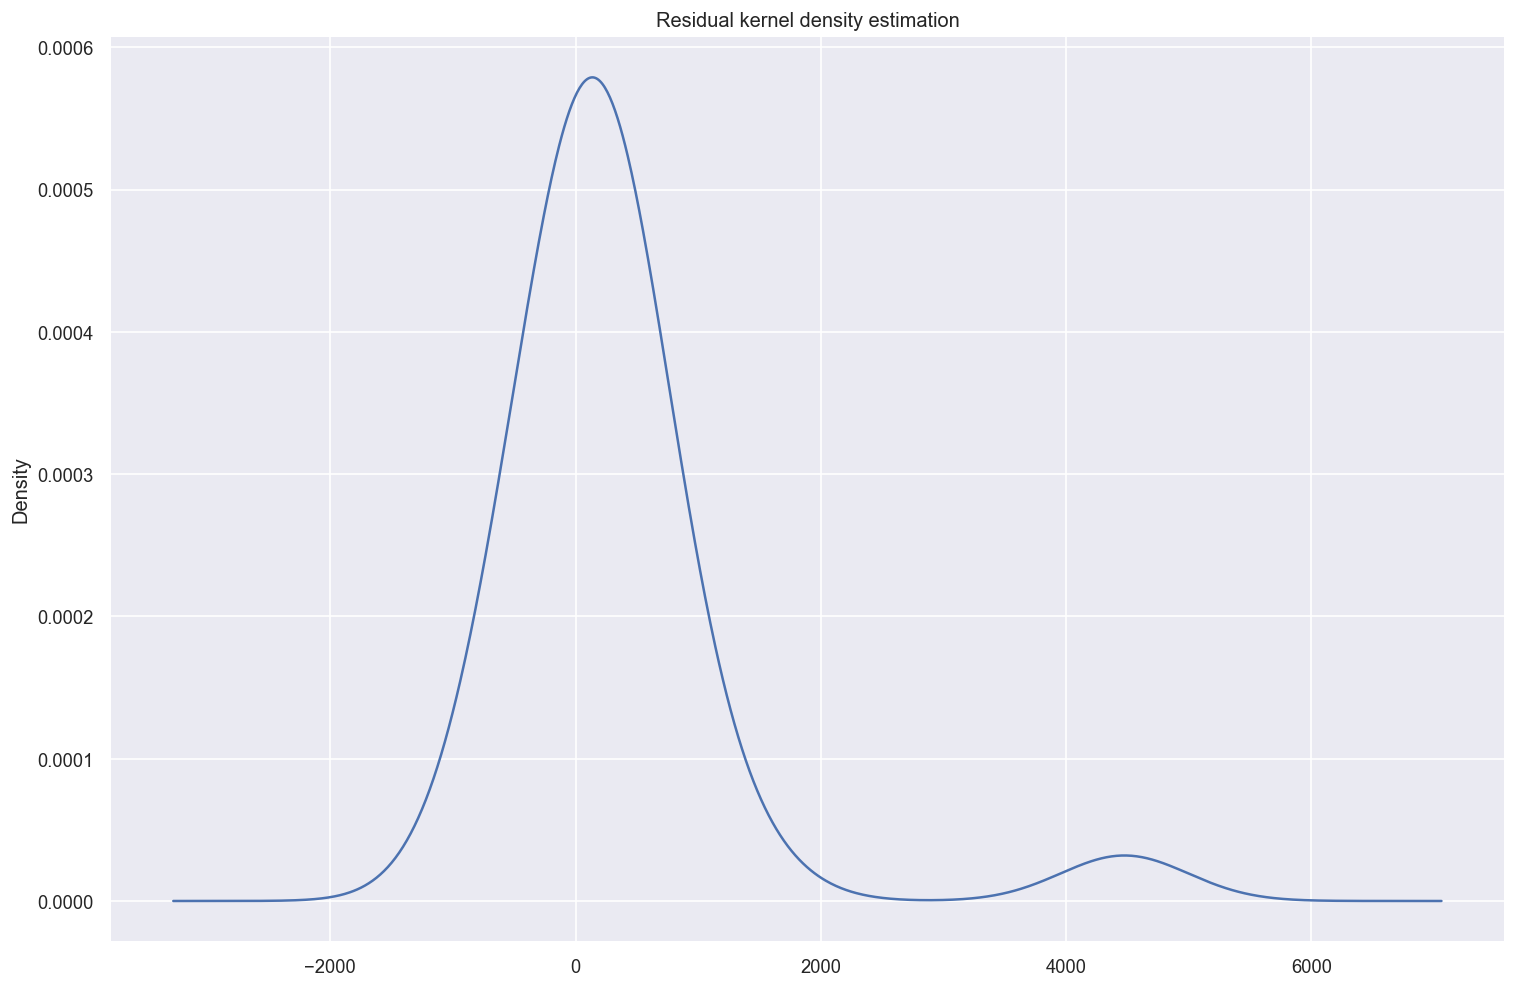

                 0
count    24.000000
mean    323.755884
std     981.448716
min    -695.462376
25%     -62.050942
50%     157.449554
75%     432.133856
max    4475.000000
p value is  2.458592705948913e-10
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  0.306249   0.579991
2  0.491607   0.782076
3  0.498667   0.919184
4  2.154820   0.707309


In [98]:
#Build the ARIMA Model, training on the 24-month dataset
P=1
D=1
Q=4

# fit model
N = 24
series = df2_Monthly['persons_injured_or_killed']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [99]:
X = pd.DataFrame(range(N),columns=['Month'])
X = sm.add_constant(X)
lm=sm.OLS(df2_Monthly['persons_injured_or_killed'][:N],X).fit()
insample = lm.predict(X)
print (lm.summary())

                                OLS Regression Results                               
Dep. Variable:     persons_injured_or_killed   R-squared:                       0.060
Model:                                   OLS   Adj. R-squared:                  0.017
Method:                        Least Squares   F-statistic:                     1.407
Date:                       Tue, 03 May 2022   Prob (F-statistic):              0.248
Time:                               16:06:06   Log-Likelihood:                -183.88
No. Observations:                         24   AIC:                             371.8
Df Residuals:                             22   BIC:                             374.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [100]:
N2 = 18
series = df2_Monthly['persons_injured_or_killed']
model2 = sm.tsa.arima.ARIMA(series[:N2], order=(P,D,Q))
model_fit2 = model2.fit()

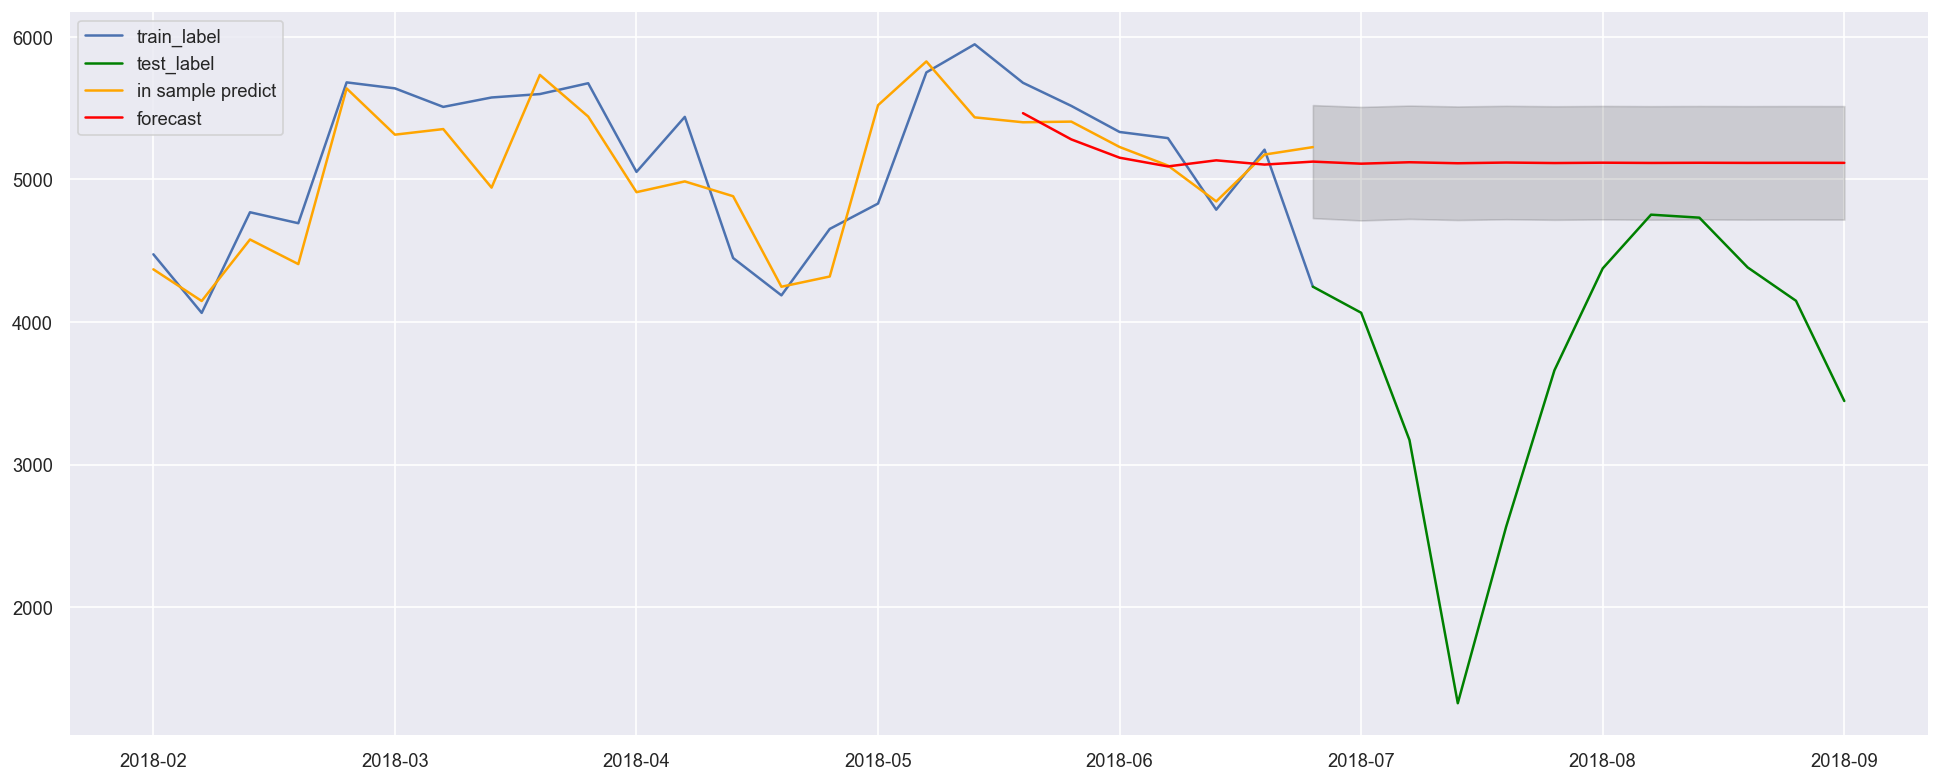

In [101]:
# Forecast

fcast = model_fit2.forecast(steps=len(series)-N2, alpha = 0.5)  # 95% conf
fc = model_fit2.get_forecast(steps=len(series)-N2, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N2,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df2_Monthly.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.set_xticklabels(df2_Monthly['Date'])
ax.legend(loc='upper left')

In [102]:
df2_Monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype    
---  ------                     --------------  -----    
 0   Date                       36 non-null     period[M]
 1   collision_count            36 non-null     int64    
 2   persons_injured_or_killed  36 non-null     float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 992.0 bytes


In [103]:
X = pd.DataFrame(range(N-1,len(df2_Monthly)),columns=['Month'])
X = sm.add_constant(X)
pred = lm.predict(X)

Text(0.5, 1.0, 'Monthly persons_injured_or_killed count')

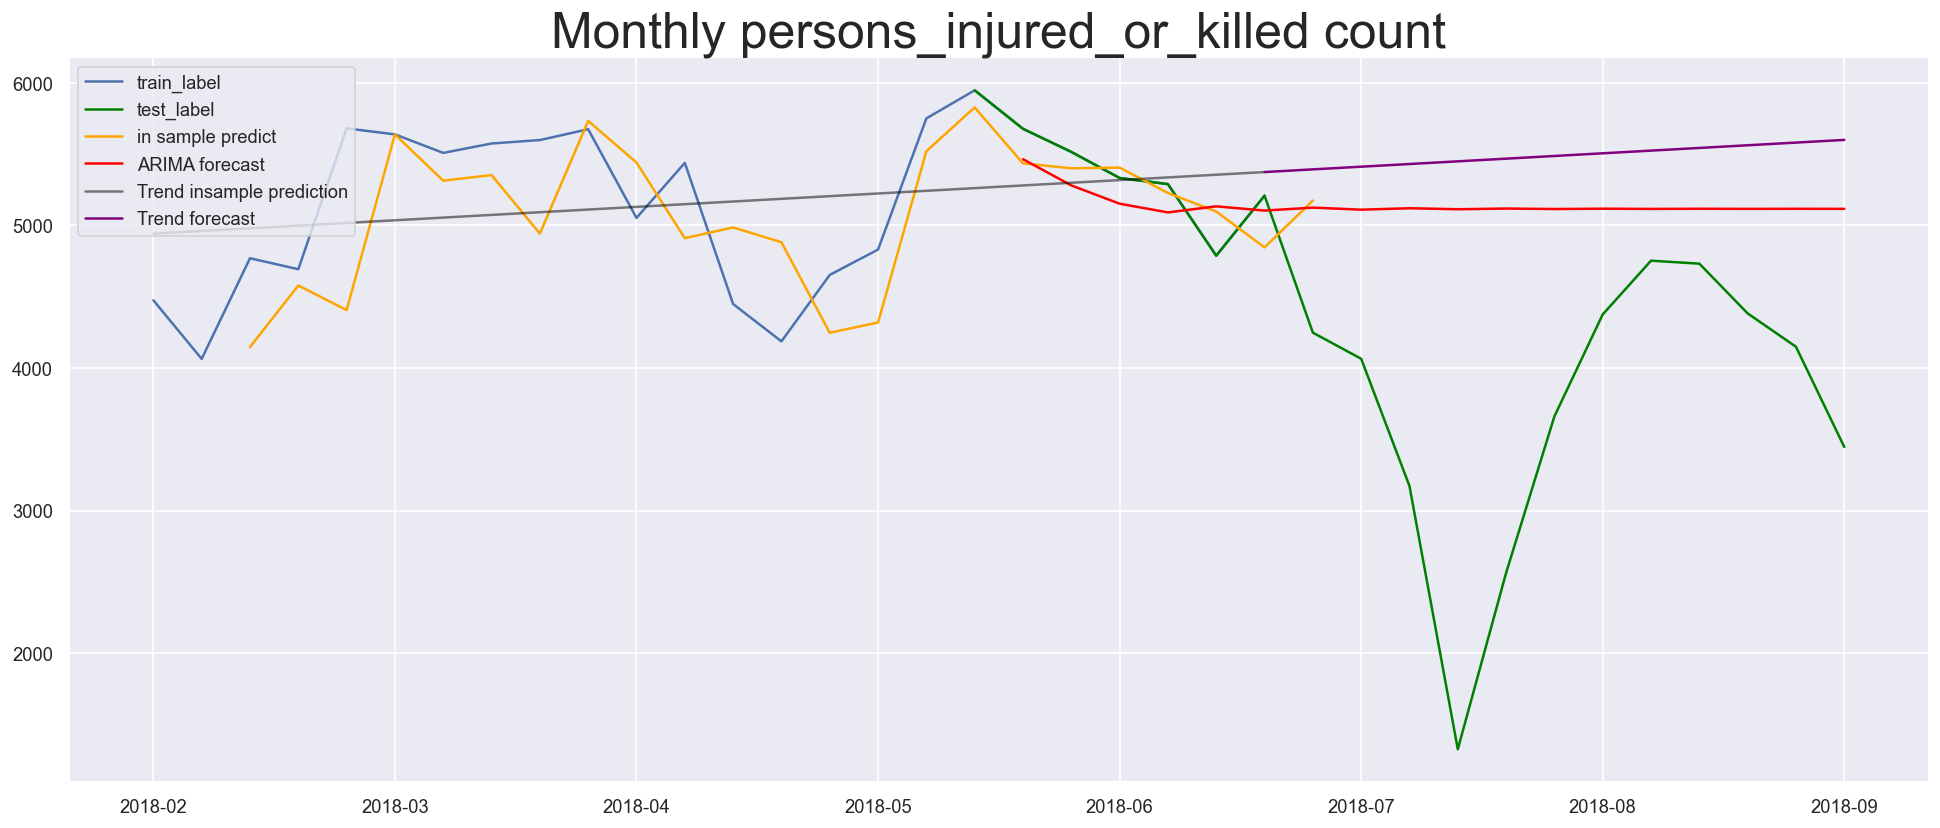

In [104]:
plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.set_xticklabels(df2_Monthly['Date'])
ax.plot(df2_Monthly['persons_injured_or_killed'][:N],label='train_label')
ax.plot(range(N2-1,len(df2_Monthly)),df2_Monthly['persons_injured_or_killed'][N2-1:],color='green',label='test_label')
ax.plot(range(P+D,N+1),model_fit.predict(start=P+D,end=N,dynamic=False,typ='levels'),color='orange',label='in sample predict')
ax.plot(fc_series, label='ARIMA forecast', color='red')

ax.plot(insample, label='Trend insample prediction', color='black',alpha=0.5)
ax.plot(range(N-1,len(df2_Monthly['persons_injured_or_killed'])),pred, label='Trend forecast', color='purple')

ax.legend(loc='upper left')
plt.title('Monthly persons_injured_or_killed count', fontsize=30)

# Zip code= 10019 in ARIMA Model 

#Then we are now choosing Zip_Code = 10019 to analyze the Time-Series Result

In [105]:
df_10019 = df_drop_empty_zipcode_2018_2020.copy()
df_10019

crash_date          crash_time                    on_street_name  \
13     2019-05-21 2022-05-03 22:50:00                       GOLD STREET   
1044   2020-04-17 2022-05-03 01:50:00                         11 AVENUE   
4430   2020-05-02 2022-05-03 17:30:00                ROCKAWAY BOULEVARD   
4821   2020-12-31 2022-05-03 12:06:00                               NaN   
8151   2020-05-10 2022-05-03 00:51:00                   WEST 165 STREET   
...           ...                 ...                               ...   
698539 2018-01-11 2022-05-03 17:29:00  23 AVENUE                          
698543 2018-01-13 2022-05-03 17:30:00  METROPOLITAN AVENUE                
698544 2018-01-26 2022-05-03 22:36:00  KINGS HIGHWAY                      
698546 2018-01-14 2022-05-03 12:20:00  WEST 211 STREET                    
698548 2018-01-17 2022-05-03 05:49:00  NASSAU AVENUE                      

        number_of_persons_injured  number_of_persons_killed  \
13                            0.0                       0.0   
1044                          1.0                       0.0   
4430                          0.0                       0.0   
4821                          0.0                       0.0   
8151                          2.0                       0.0   
...                           ...                       ...   
698539                        1.0                       0.0   
698543                        0.0                       0.0   
698544                        0.0                       0.0   
698546                        1.0                       0.0   
698548                        0.0                       0.0   

        number_of_pedestrians_injured  number_of_pedestrians_killed  \
13                                  0                             0   
1044                                0                             0   
4430                                0                             0   
4821                                0                             0   
8151                                0                             0   
...                               ...                           ...   
698539                              0                             0   
698543                              0                             0   
698544                              0                             0   
698546                              0                             0   
698548                              0                             0   

        number_of_cyclist_injured  number_of_cyclist_killed  \
13                              0                         0   
1044                            0                         0   
4430                            0                         0   
4821                            0                         0   
8151                            0                         0   
...                           ...                       ...   
698539                          1                         0   
698543                          0                         0   
698544                          0                         0   
698546                          0                         0   
698548                          0                         0   

        number_of_motorist_injured  ...                  vehicle_type_code_3  \
13                               0  ...                                  NaN   
1044                             1  ...                                  NaN   
4430                             0  ...                                  NaN   
4821                             0  ...                                  NaN   
8151                             2  ...  Station Wagon/Sport Utility Vehicle   
...                            ...  ...                                  ...   
698539                           0  ...                                  NaN   
698543                           0  ...                                  NaN   
698544             

In [106]:
df3 = df_drop_empty_zipcode_2018_2020.copy()
df3_new1 = df3.loc[df3['Year'].isin([2019])]
df3_new1 = df3_new1.loc[df3_new1['Month'].isin([5,6,7])]
df3_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37279 entries, 13 to 414411
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_date                     37279 non-null  datetime64[ns]
 1   crash_time                     37279 non-null  datetime64[ns]
 2   on_street_name                 23526 non-null  object        
 3   number_of_persons_injured      37279 non-null  float64       
 4   number_of_persons_killed       37279 non-null  float64       
 5   number_of_pedestrians_injured  37279 non-null  int64         
 6   number_of_pedestrians_killed   37279 non-null  int64         
 7   number_of_cyclist_injured      37279 non-null  int64         
 8   number_of_cyclist_killed       37279 non-null  int64         
 9   number_of_motorist_injured     37279 non-null  int64         
 10  number_of_motorist_killed      37279 non-null  int64         
 11  contributing_

In [107]:
df3_new2 = df3_new1.groupby(['Date', 'zip_code']).\
    agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
    rename(columns={'collision_id':'collision_count'}).reset_index()

In [108]:
df3_new3 = df3_new2.merge(NYCzip,left_on='zip_code',right_on='zipcode')

In [109]:
df3_new3['persons_injured_or_killed'] = df3_new3['number_of_persons_injured'] + df3_new3['number_of_persons_killed']
df3_new3

Date  zip_code  collision_count  number_of_persons_injured  \
0      2019-05-01   10001.0                2                        1.0   
1      2019-05-02   10001.0                6                        1.0   
2      2019-05-03   10001.0                2                        0.0   
3      2019-05-04   10001.0                1                        0.0   
4      2019-05-05   10001.0                2                        0.0   
...           ...       ...              ...                        ...   
13326  2019-06-26   11359.0                1                        0.0   
13327  2019-06-27   10154.0                1                        0.0   
13328  2019-07-08   10154.0                1                        0.0   
13329  2019-07-11   10271.0                1                        0.0   
13330  2019-07-23   10279.0                1                        0.0   

       number_of_persons_killed  zipcode  \
0                           0.0  10001.0   
1                           0.0  10001.0   
2                           0.0  10001.0   
3                           0.0  10001.0   
4                           0.0  10001.0   
...                         ...      ...   
13326                       0.0  11359.0   
13327                       0.0  10154.0   
13328                       0.0  10154.0   
13329                       0.0  10271.0   
13330                       0.0  10279.0   

                                                geometry  \
0      POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...   
1      POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...   
2      POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...   
3      POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...   
4      POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...   
...                                                  ...   
13326  POLYGON Z ((-73.78178 40.79485 0.00000, -73.78...   
13327  POLYGON Z ((-73.97236 40.75743 0.00000, -73.97...   
13328  POLYGON Z ((-73.97236 40.75743 0.00000, -73.97...   
13329  POLYGON Z ((-74.01021 40.70830 0.00000, -74.00...   
13330  POLYGON Z ((-74.00864 40.71260 0.00000, -74.00...   

       persons_injured_or_killed  
0                            1.0  
1                            1.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
13326                        0.0  
13327                        0.0  
13328                        0.0  
13329                        0.0  
13330                        0.0  

[13331 rows x 8 columns]

In [110]:
df3_new3 = df3_new3[['Date','zip_code','collision_count','persons_injured_or_killed']]
df3_new3 = df3_new3.loc[df3_new3['zip_code'] == 10019]
df3_new3

Date  zip_code  collision_count  persons_injured_or_killed
1253  2019-05-01   10019.0                5                        3.0
1254  2019-05-02   10019.0                2                        0.0
1255  2019-05-03   10019.0                8                        0.0
1256  2019-05-04   10019.0                3                        0.0
1257  2019-05-05   10019.0                1                        0.0
...          ...       ...              ...                        ...
1339  2019-07-27   10019.0                6                        2.0
1340  2019-07-28   10019.0                1                        0.0
1341  2019-07-29   10019.0                3                        1.0
1342  2019-07-30   10019.0                4                        1.0
1343  2019-07-31   10019.0                7                        1.0

[91 rows x 4 columns]

In [111]:
#example
#df2_Monthly['Date'] = pd.to_datetime(df2_Monthly['Date']).dt.to_period('M')

In [112]:
df3_new3['Date'] = pd.to_datetime(df3_new3['Date'])
df3_new3 = df3_new3.reset_index()
df3_new3 =df3_new3.drop(columns='index')

In [113]:
df3_new3

Date  zip_code  collision_count  persons_injured_or_killed
0  2019-05-01   10019.0                5                        3.0
1  2019-05-02   10019.0                2                        0.0
2  2019-05-03   10019.0                8                        0.0
3  2019-05-04   10019.0                3                        0.0
4  2019-05-05   10019.0                1                        0.0
..        ...       ...              ...                        ...
86 2019-07-27   10019.0                6                        2.0
87 2019-07-28   10019.0                1                        0.0
88 2019-07-29   10019.0                3                        1.0
89 2019-07-30   10019.0                4                        1.0
90 2019-07-31   10019.0                7                        1.0

[91 rows x 4 columns]

After filtering data out of 2019 year, we choose dataset from May, June and July to analyze

# We analyze the "Collision count" first in Zip code 10019 Area

In [114]:
lm=sm.OLS(df3_new3.collision_count[:91],sm.add_constant(df3_new3.Date.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                  0.002090
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.964
Time:                        16:06:10   Log-Likelihood:                -212.64
No. Observations:                  91   AIC:                             429.3
Df Residuals:                      89   BIC:                             434.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9439      0.526      9.391      0.0

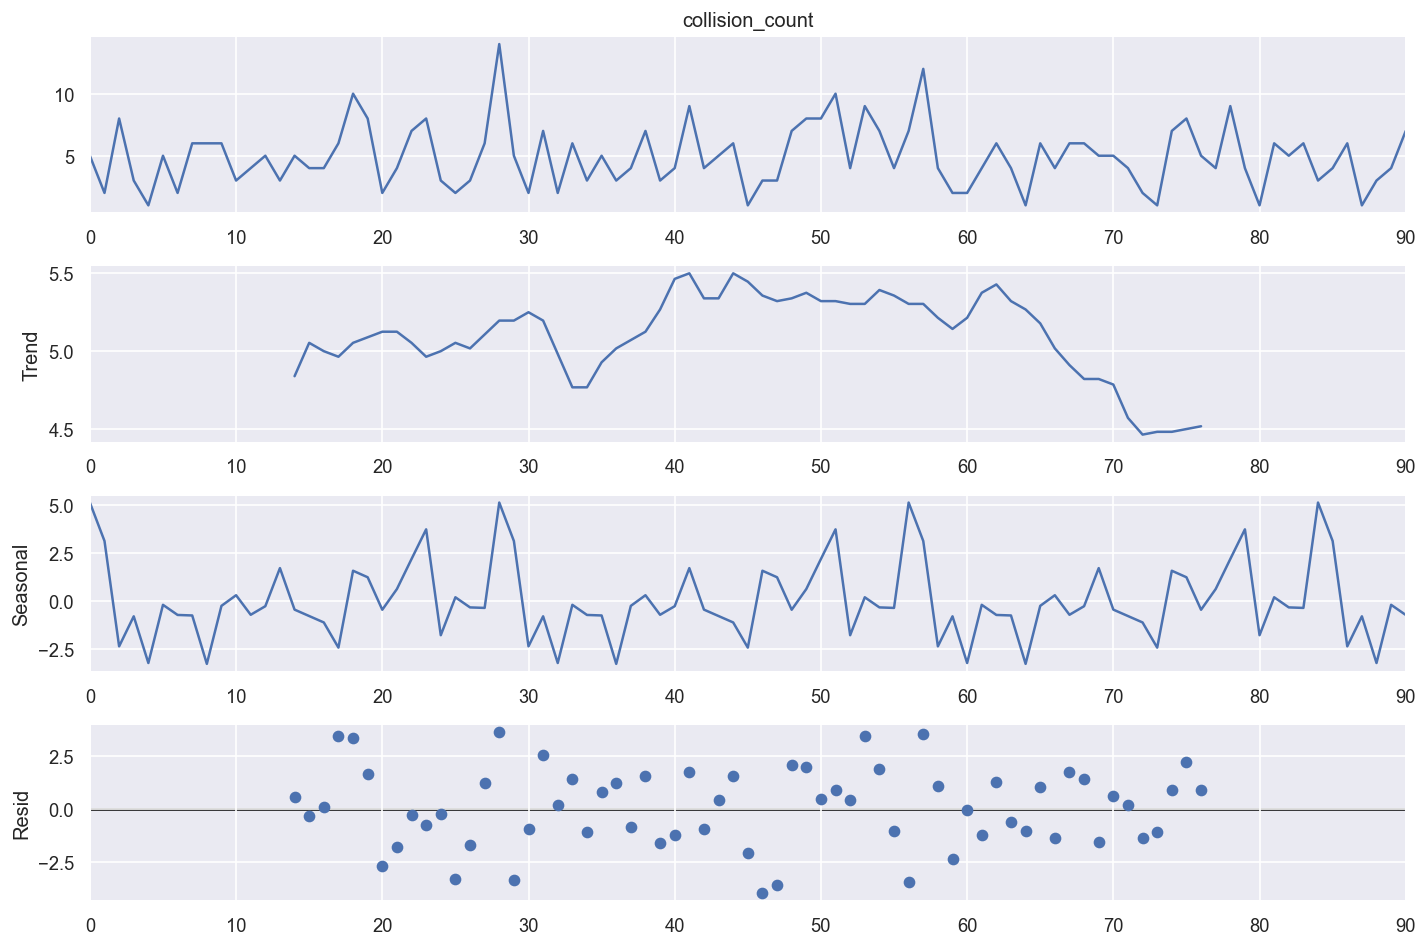

In [115]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(df3_new3['collision_count'],model='additive',period=28) #Decompose the data into the trend, repeated component over 7 days per week as a period
res.plot()
plt.show()

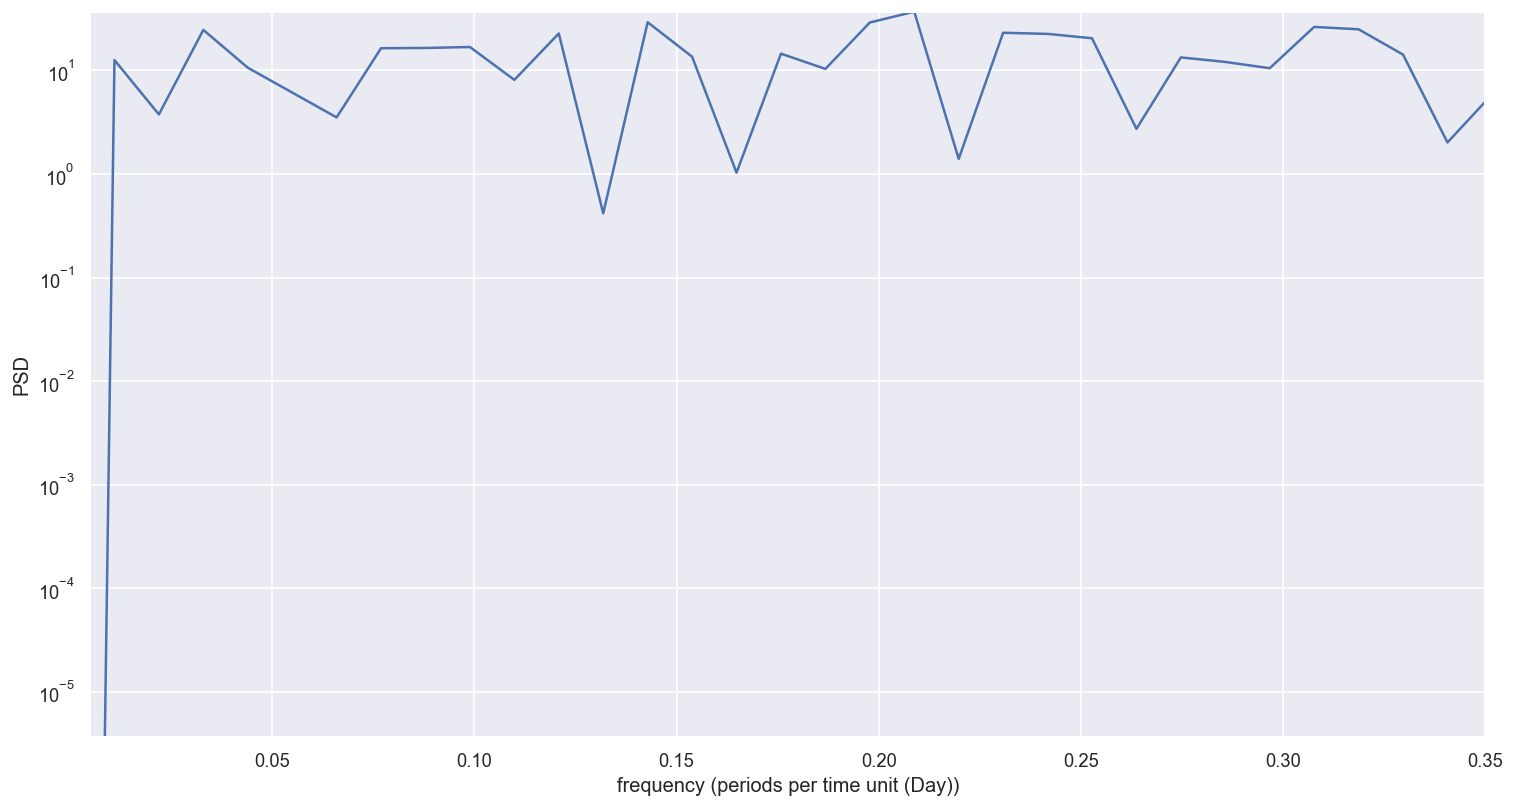

Strongest period length = 4.7894736842105265


In [116]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df3_new3['collision_count'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Day))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e7,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 3 years (91 days in total 1080 days) 
PSD = PSD[f>0.08333]
f = f[f>0.08333] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

In [117]:
df3_new3.tail(50)

Date  zip_code  collision_count  persons_injured_or_killed
41 2019-06-11   10019.0                9                        2.0
42 2019-06-12   10019.0                4                        2.0
43 2019-06-13   10019.0                5                        0.0
44 2019-06-14   10019.0                6                        0.0
45 2019-06-15   10019.0                1                        0.0
46 2019-06-16   10019.0                3                        1.0
47 2019-06-17   10019.0                3                        0.0
48 2019-06-18   10019.0                7                        1.0
49 2019-06-19   10019.0                8                        0.0
50 2019-06-20   10019.0                8                        0.0
51 2019-06-21   10019.0               10                        4.0
52 2019-06-22   10019.0                4                        1.0
53 2019-06-23   10019.0                9                        1.0
54 2019-06-24   10019.0                7                        3.0
55 2019-06-25   10019.0                4                        0.0
56 2019-06-26   10019.0                7                        0.0
57 2019-06-27   10019.0               12                        3.0
58 2019-06-28   10019.0                4                        1.0
59 2019-06-29   10019.0                2                        1.0
60 2019-06-30   10019.0                2                        0.0
61 2019-07-01   10019.0                4                        1.0
62 2019-07-02   10019.0                6                        0.0
63 2019-07-03   10019.0                4                        0.0
64 2019-07-04   10019.0                1                        2.0
65 2019-07-05   10019.0                6                        3.0
66 2019-07-06   10019.0                4                        1.0
67 2019-07-07   10019.0                6                        2.0
68 2019-07-08   10019.0                6                        2.0
69 2019-07-09   10019.0                5                        0.0
70 2019-07-10   10019.0                5                        0.0
71 2019-07-11   10019.0                4                        8.0
72 2019-07-12   10019.0                2                        1.0
73 2019-07-14   10019.0                1                        0.0
74 2019-07-15   10019.0                7                        2.0
75 2019-07-16   10019.0                8                        1.0
76 2019-07-17   10019.0                5                        0.0
77 2019-07-18   10019.0                4                        0.0
78 2019-07-19   10019.0                9                        0.0
79 2019-07-20   10019.0                4                        5.0
80 2019-07-21   10019.0                1                        0.0
81 2019-07-22   10019.0                6                        0.0
82 2019-07-23   10019.0                5                        1.0
83 2019-07-24   10019.0                6                        0.0
84 2019-07-25   10019.0                3                        0.0
85 2019-07-26   10019.0                4                        0.0
86 2019-07-27   10019.0                6                        2.0
87 2019-07-28   10019.0                1                        0.0
88 2019-07-29   10019.0                3                        1.0
89 2019-07-30   10019.0                4                        1.0
90 2019-07-31   10019.0                7                        1.0

                               SARIMAX Results                                
Dep. Variable:        collision_count   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -146.660
Date:                Tue, 03 May 2022   AIC                            299.320
Time:                        16:06:11   BIC                            305.603
Sample:                             0   HQIC                           301.778
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1166      0.180      0.646      0.518      -0.237       0.470
ma.L1         -0.9997      4.911     -0.204      0.839     -10.625       8.626
sigma2         7.2909     35.261      0.207      0.8

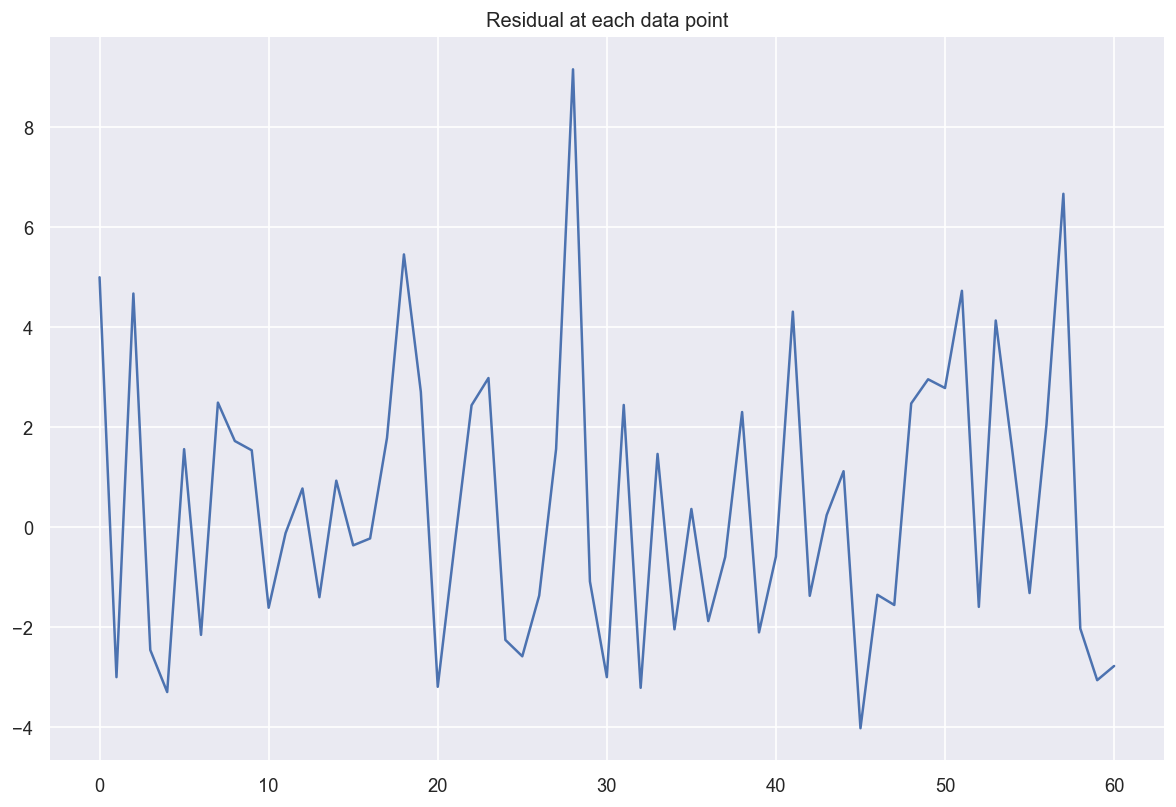

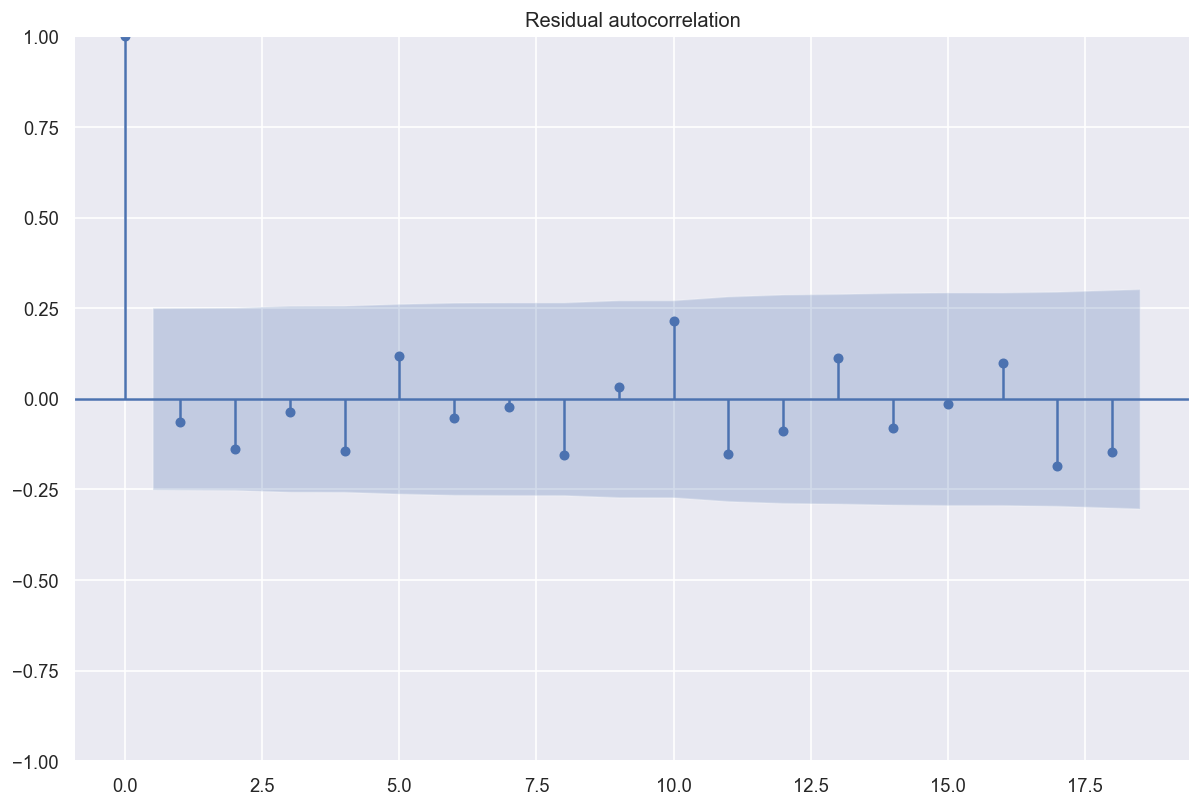

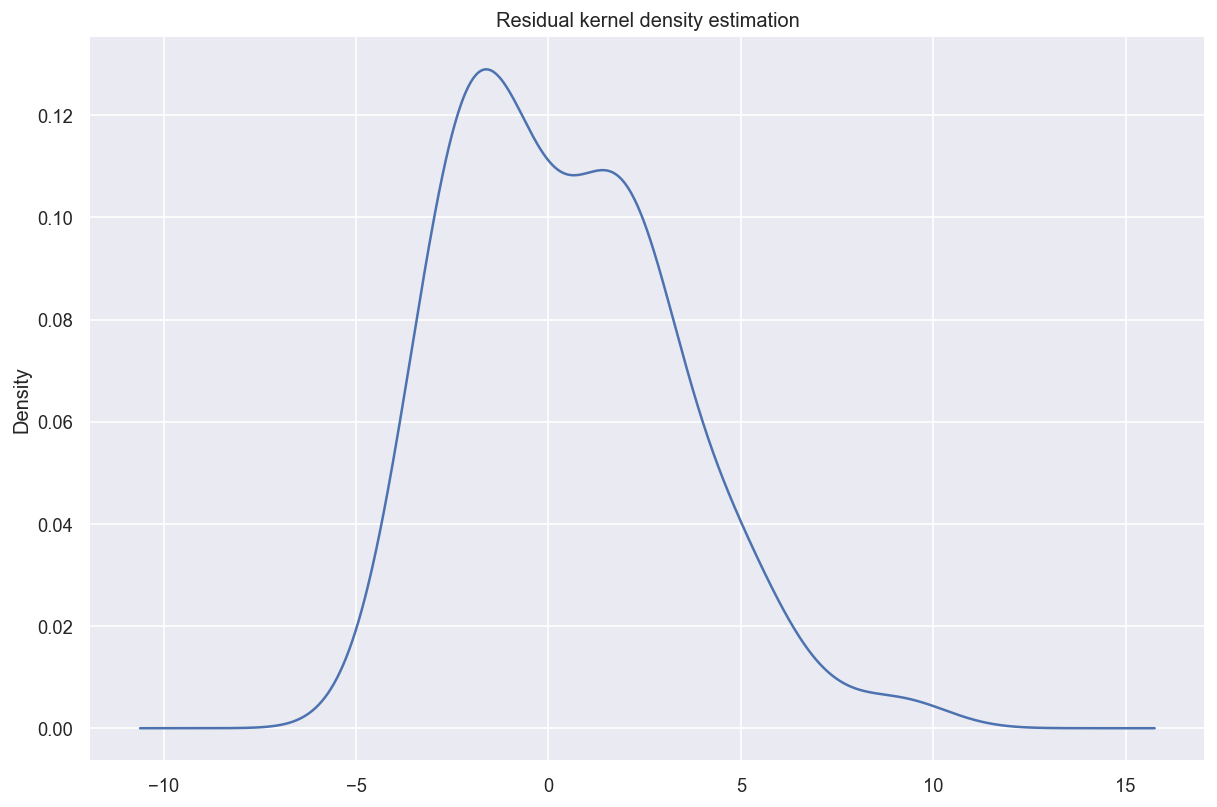

               0
count  61.000000
mean    0.432697
std     2.826230
min    -4.021544
25%    -1.878195
50%    -0.118742
75%     2.439232
max     9.160637
p value is  0.07498934363108277
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
     lb_stat  lb_pvalue
1   0.257822   0.611621
2   1.512698   0.469377
3   1.606575   0.657900
4   2.988423   0.559765
5   3.944565   0.557425
6   4.146497   0.656859
7   4.187522   0.757943
8   5.962416   0.651442
9   6.036112   0.736299
10  9.532228   0.482444


In [118]:
#We use the same parameters(P,D,Q) from the previous ARIMA Model, training on the first 2-month dataset which is May and June
P=1
D=1
Q=1

# fit model
N = 61
series = df3_new3['collision_count']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [119]:
X = pd.DataFrame(range(N),columns=['Day'])
X = sm.add_constant(X)
lm=sm.OLS(df3_new3['collision_count'][:N],X).fit()
insample = lm.predict(X)


In [120]:
X = pd.DataFrame(range(N-1,len(df3_new3)),columns=['Day'])
X = sm.add_constant(X)
pred = lm.predict(X)

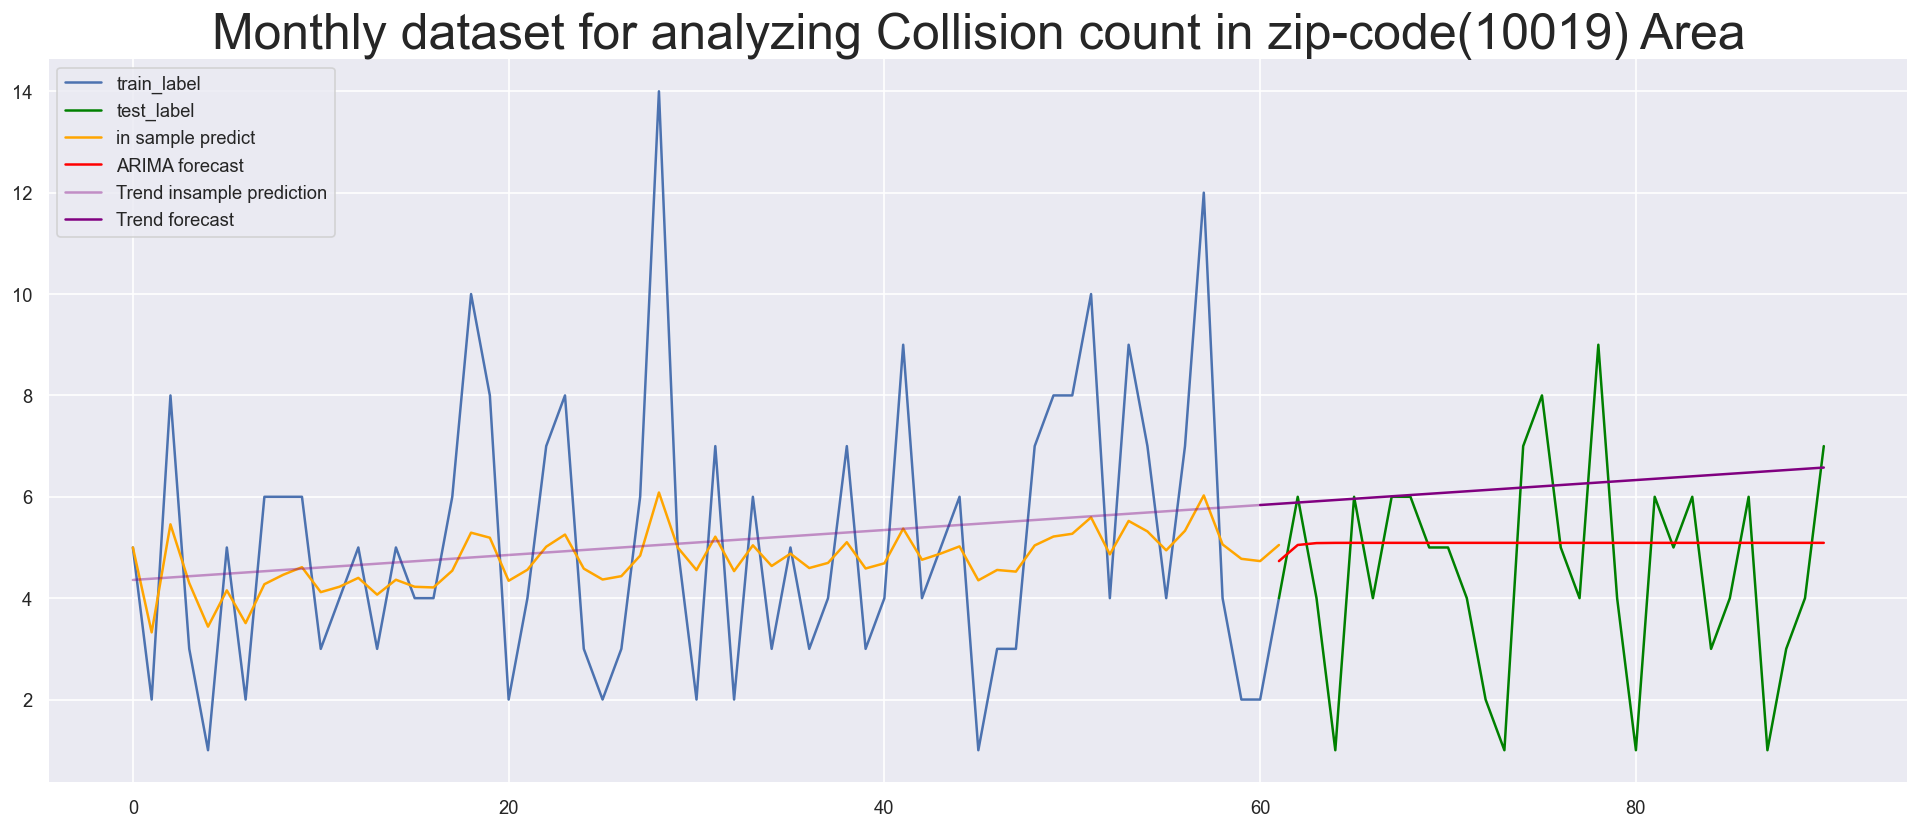

In [121]:
# Forecast
plt.rcParams.update({'figure.figsize':(20,8)})
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N2,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

fig, ax = plt.subplots()
ax.plot(df3_new3.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df3_new3.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df3_new3.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample

ax.plot(fc_series, label='ARIMA forecast', color='red')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.4)
ax.plot(range(N-1,len(df3_new3)),pred, label='Trend forecast', color='purple')
plt.title("Monthly dataset for analyzing Collision count in zip-code(10019) Area", fontsize=30)
plt.legend(loc='upper left')



# Then we analyze the "persons_injured_or_killed" of daily dataset 

In [122]:
lm=sm.OLS(df3_new3.persons_injured_or_killed[:91],sm.add_constant(df3_new3.persons_injured_or_killed.index[:91])).fit()
print (lm.summary())

                                OLS Regression Results                               
Dep. Variable:     persons_injured_or_killed   R-squared:                       0.013
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     1.213
Date:                       Tue, 03 May 2022   Prob (F-statistic):              0.274
Time:                               16:06:13   Log-Likelihood:                -150.51
No. Observations:                         91   AIC:                             305.0
Df Residuals:                             89   BIC:                             310.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

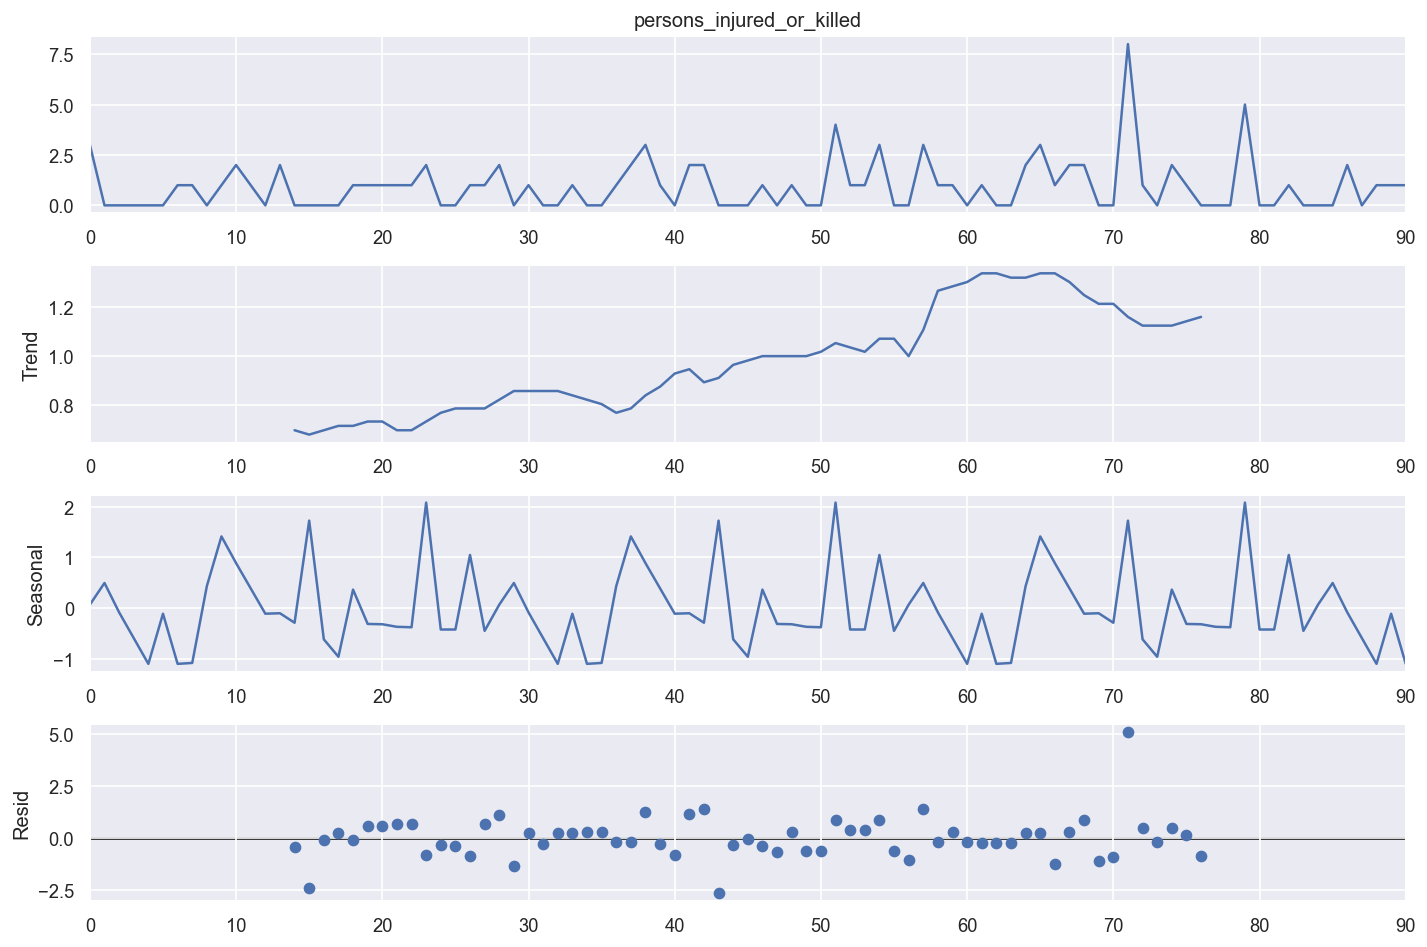

In [123]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(df3_new3['persons_injured_or_killed'],model='additive',period=28) #Decompose the data into the trend, repeated component over 7 days per week as a period
res.plot()
plt.show()

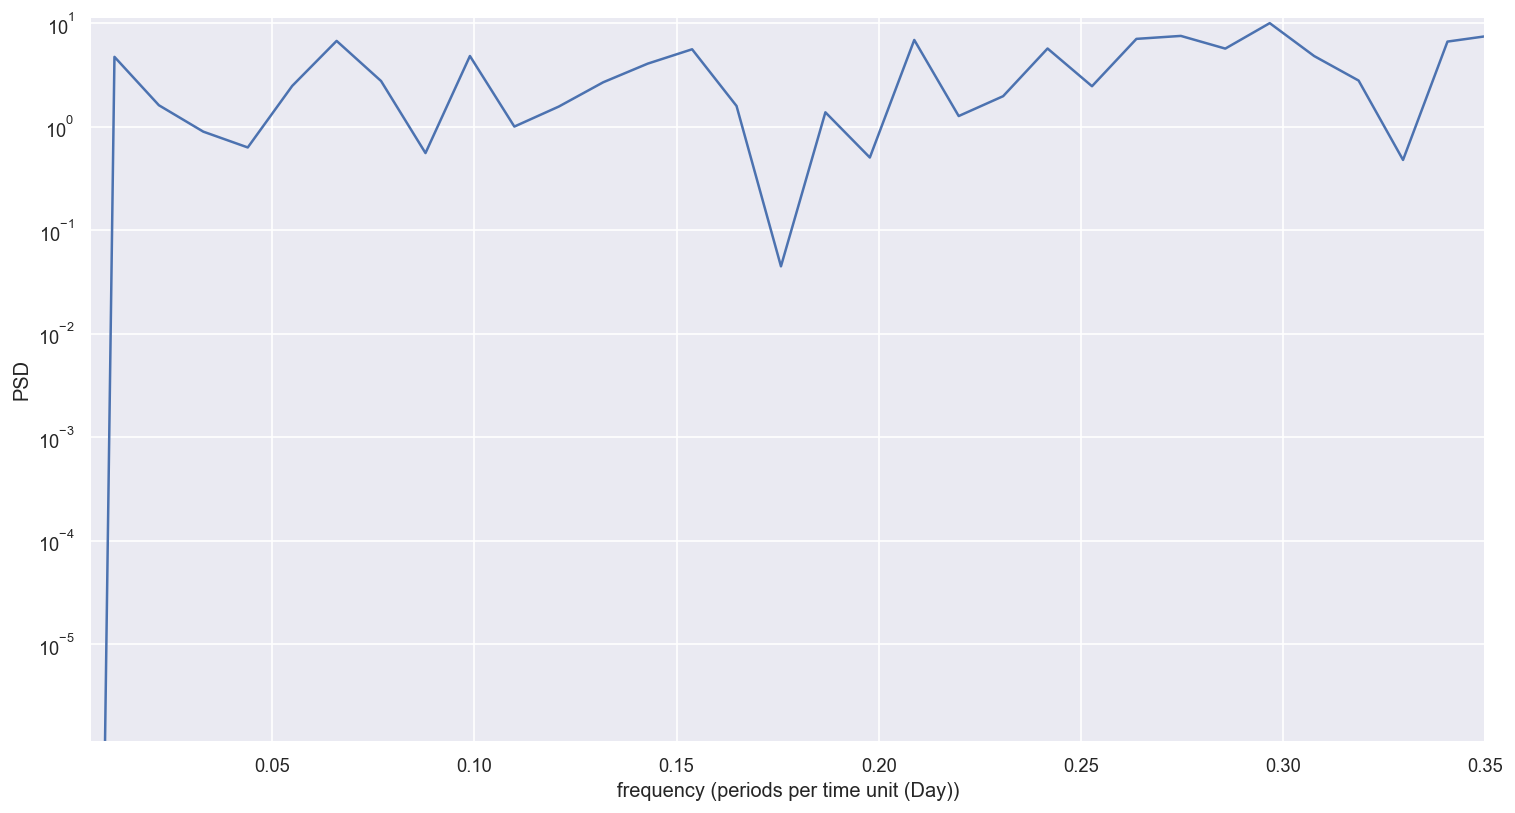

Strongest period length = 2.5277777777777777


In [124]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df3_new3['persons_injured_or_killed'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Day))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e7,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 3 years (91 days in total 1080 days) 
PSD = PSD[f>0.08333]
f = f[f>0.08333] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

                                   SARIMAX Results                                   
Dep. Variable:     persons_injured_or_killed   No. Observations:                   61
Model:                        ARIMA(1, 1, 4)   Log Likelihood                 -82.773
Date:                       Tue, 03 May 2022   AIC                            177.545
Time:                               16:06:14   BIC                            190.111
Sample:                                    0   HQIC                           182.460
                                        - 61                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5768      0.314     -1.835      0.066      -1.193       0.039
ma.L1         -0.2463    711.180     -0.000      1.000   -1394.133    1393.

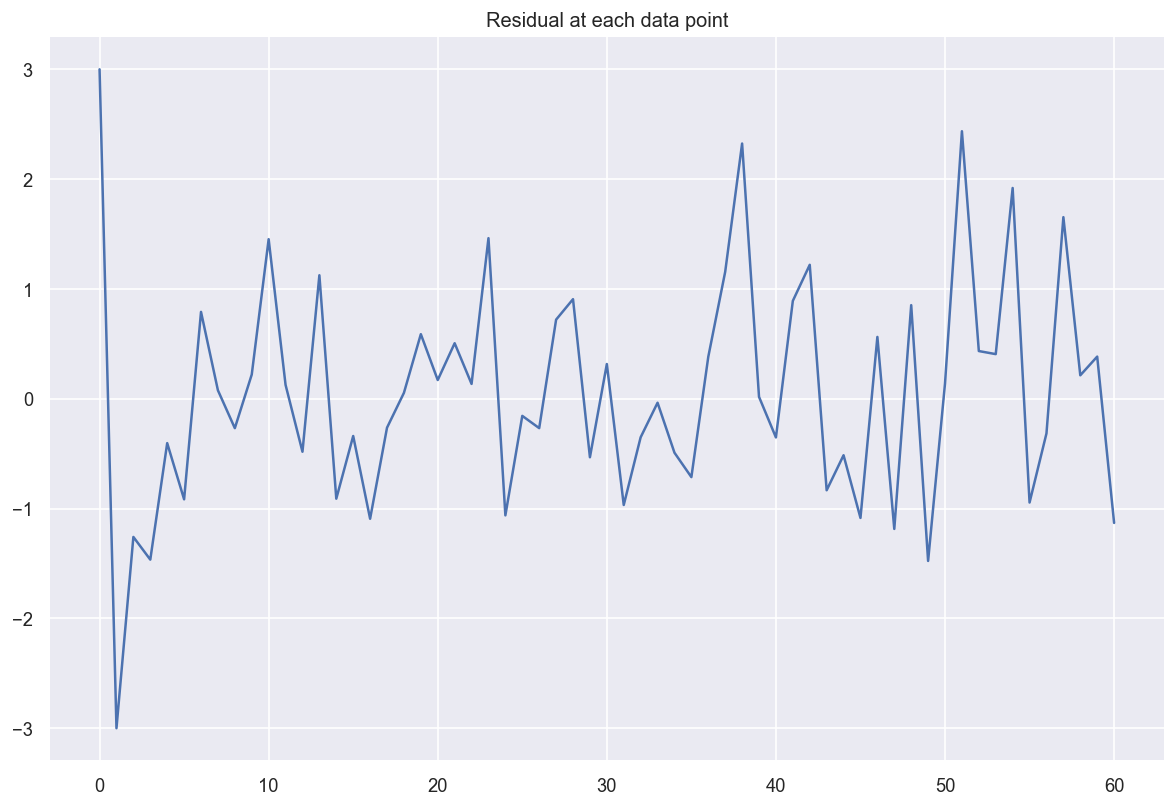

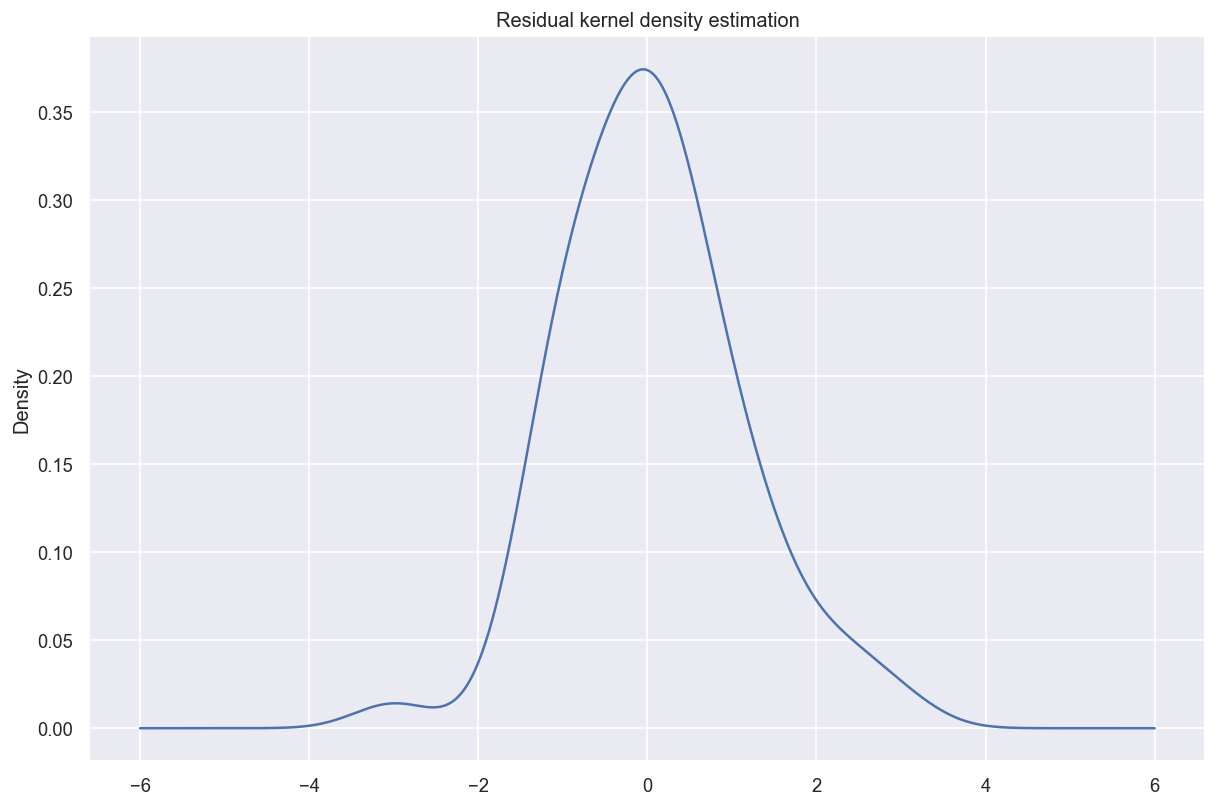

               0
count  61.000000
mean    0.062876
std     1.063557
min    -2.999998
25%    -0.532539
50%     0.053925
75%     0.588326
max     3.000000
p value is  0.22384424275166453
null hypothesis: residuals come from a normal distribution
The null hypothesis cannot be rejected
Ljung–Box:
     lb_stat  lb_pvalue
1   0.211276   0.645769
2   0.213200   0.898885
3   0.246400   0.969772
4   0.247826   0.992928
5   1.419719   0.922144
6   1.517956   0.958293
7   4.239884   0.751770
8   5.465633   0.706845
9   5.945235   0.745387
10  7.122956   0.713788


In [125]:
#We use the same parameters(P,D,Q) from the previous ARIMA Model of 'persons_injured_or_killed', training on the first 2-month dataset
P=1
D=1
Q=4

# fit model
N = 61
series = df3_new3['persons_injured_or_killed']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [126]:
X = pd.DataFrame(range(N),columns=['Day'])
X = sm.add_constant(X)
lm=sm.OLS(df3_new3['persons_injured_or_killed'][:N],X).fit()
insample = lm.predict(X)

In [127]:
X = pd.DataFrame(range(N-1,len(df3_new3)),columns=['Day'])
X = sm.add_constant(X)
pred = lm.predict(X)

In [128]:
df3_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       91 non-null     datetime64[ns]
 1   zip_code                   91 non-null     float64       
 2   collision_count            91 non-null     int64         
 3   persons_injured_or_killed  91 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.0 KB


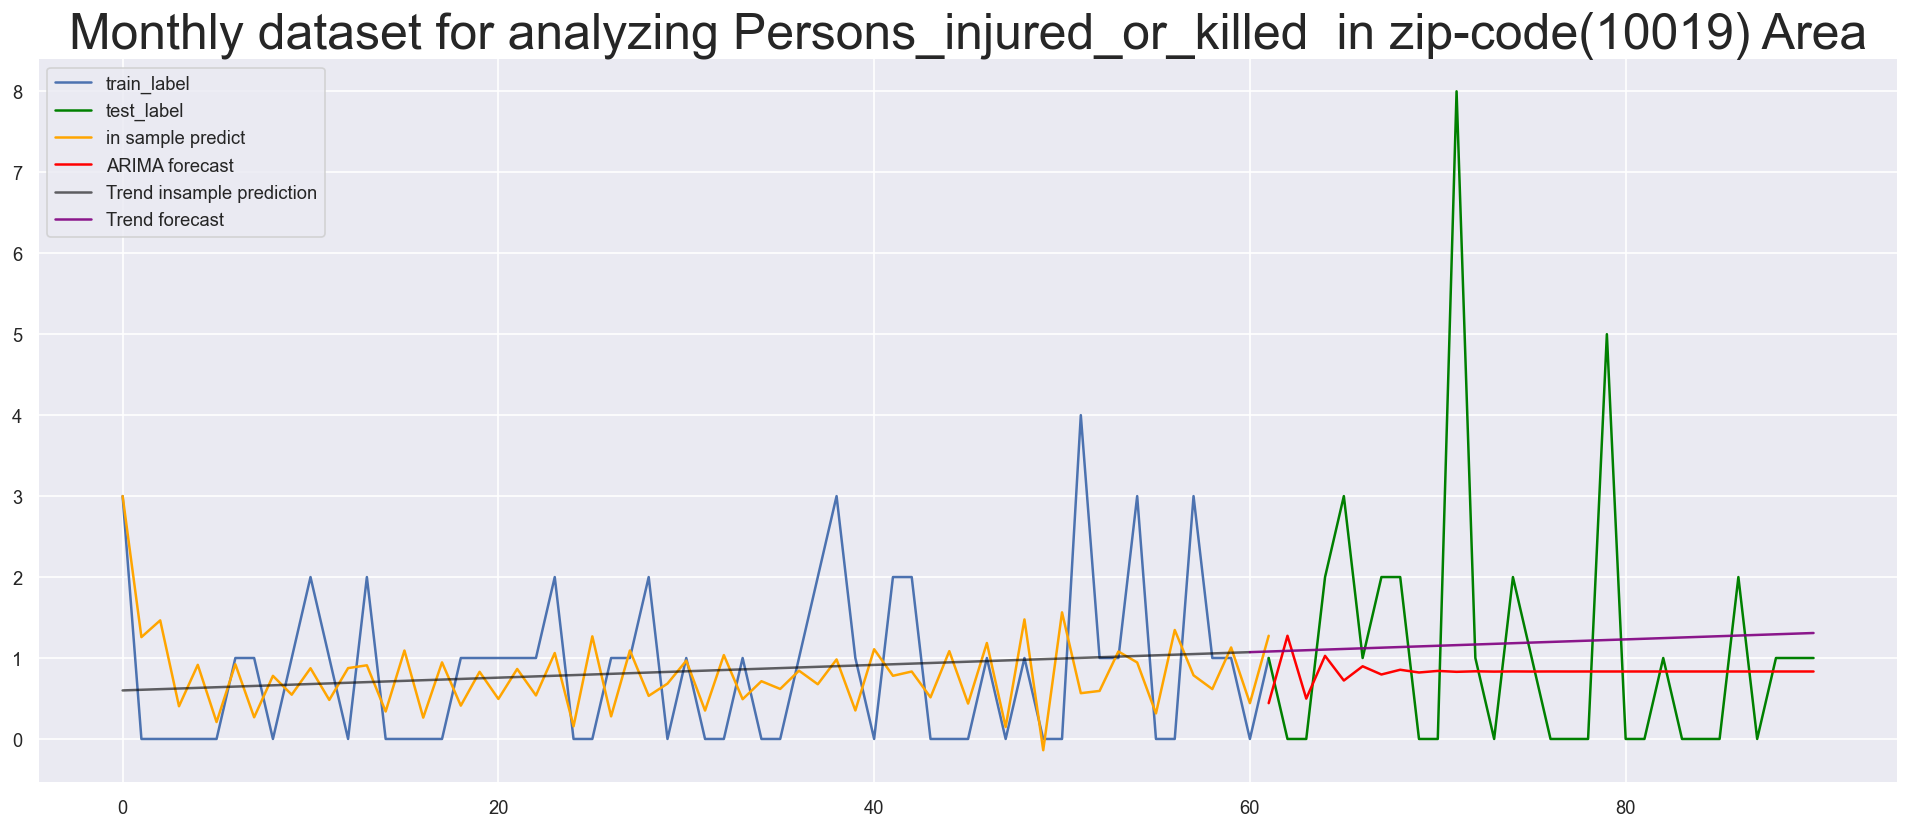

In [129]:
# Forecast
plt.rcParams.update({'figure.figsize':(20,8)})
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

fig, ax = plt.subplots()
ax.plot(df3_new3.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df3_new3.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df3_new3.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample

ax.plot(fc_series, label='ARIMA forecast', color='red')# forecast

ax.plot(insample, label='Trend insample prediction', color='black',alpha=0.6)
ax.plot(range(N-1,len(df3_new3)),pred, label='Trend forecast', color='purple', alpha=0.9)
plt.title("Monthly dataset for analyzing Persons_injured_or_killed  in zip-code(10019) Area", fontsize=30)

plt.legend(loc='upper left')

# We aim to explore the hourly result of collision count in July

In [130]:
df4_new = df3_new1.loc[df3_new1['Month'].isin([7])]
df4_new['crash_time'] = df4_new['crash_time'].dt.hour

In [131]:
df4_new

crash_date  crash_time                    on_street_name  \
310729 2019-07-30          18  12 AVENUE                          
310987 2019-07-29          14                               NaN   
312023 2019-07-25          14  Westchester Avenue                 
312419 2019-07-24          11                               NaN   
314150 2019-07-18          11  GOWANUS EXPRESSWAY                 
...           ...         ...                               ...   
364409 2019-07-07           9                               NaN   
364414 2019-07-07          18                               NaN   
364417 2019-07-08          12  44 AVENUE                          
364418 2019-07-16          19                               NaN   
364419 2019-07-11           9  113 AVENUE                         

        number_of_persons_injured  number_of_persons_killed  \
310729                        0.0                       0.0   
310987                        0.0                       0.0   
312023                        0.0                       0.0   
312419                        1.0                       0.0   
314150                        0.0                       0.0   
...                           ...                       ...   
364409                        0.0                       0.0   
364414                        1.0                       0.0   
364417                        0.0                       0.0   
364418                        6.0                       0.0   
364419                        0.0                       0.0   

        number_of_pedestrians_injured  number_of_pedestrians_killed  \
310729                              0                             0   
310987                              0                             0   
312023                              0                             0   
312419                              1                             0   
314150                              0                             0   
...                               ...                           ...   
364409                              0                             0   
364414                              0                             0   
364417                              0                             0   
364418                              6                             0   
364419                              0                             0   

        number_of_cyclist_injured  number_of_cyclist_killed  \
310729                          0                         0   
310987                          0                         0   
312023                          0                         0   
312419                          0                         0   
314150                          0                         0   
...                           ...                       ...   
364409                          0                         0   
364414                          0                         0   
364417                          0                         0   
364418                          0                         0   
364419                          0                         0   

        number_of_motorist_injured  ...  vehicle_type_code_3  \
310729                           0  ...                  NaN   
310987                           0  ...                  NaN   
312023                           0  ...                  NaN   
312419                           0  ...                  NaN   
314150                           0  ...                  NaN   
...                            ...  ...                  ...   
364409                           0  ...                  NaN   
364414                           1  ...                  NaN   
364417                           0  ...                  NaN   
364418                           0  ...                  NaN   
364419                           0  ...                  NaN   

       vehicle_type_code_4 contributing_factor_vehicle_5  vehicle_

In [132]:
df4_new2 =df4_new.groupby(['Date','Hour','zip_code']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index() 
df4_new2 = df4_new2.sort_values(by='Date')

df4_new2['persons_injured_or_killed'] = df4_new2['number_of_persons_injured'] + df4_new2['number_of_persons_killed']
#df2_2019hour = df2_2019hour.loc[df2_2019hour['zip_code']==10019]
df4_new2.set_index('Date',inplace = True)

df4_new2

Hour  zip_code  collision_count  number_of_persons_injured  \
Date                                                                     
2019-07-01     0   10305.0                1                        0.0   
2019-07-01    17   10472.0                1                        0.0   
2019-07-01    17   10461.0                1                        4.0   
2019-07-01    17   10460.0                3                        2.0   
2019-07-01    17   10457.0                1                        1.0   
...          ...       ...              ...                        ...   
2019-07-31    10   11413.0                1                        0.0   
2019-07-31    10   11412.0                1                        2.0   
2019-07-31    10   11379.0                1                        0.0   
2019-07-31    11   10035.0                1                        0.0   
2019-07-31    23   11230.0                1                        0.0   

            number_of_persons_killed  persons_injured_or_killed  
Date                                                             
2019-07-01                       0.0                        0.0  
2019-07-01                       0.0                        0.0  
2019-07-01                       0.0                        4.0  
2019-07-01                       0.0                        2.0  
2019-07-01                       0.0                        1.0  
...                              ...                        ...  
2019-07-31                       0.0                        0.0  
2019-07-31                       0.0                        2.0  
2019-07-31                       0.0                        0.0  
2019-07-31                       0.0                        0.0  
2019-07-31                       0.0                        0.0  

[11042 rows x 6 columns]

In [133]:
df4_new2 = df4_new2.sort_values(by='Hour')
df4_new2 = df4_new2.reset_index()

In [134]:
df4_new2.head()

Date  Hour  zip_code  collision_count  number_of_persons_injured  \
0  2019-07-01     0   10305.0                1                        0.0   
1  2019-07-06     0   11413.0                1                        0.0   
2  2019-07-06     0   11385.0                1                        1.0   
3  2019-07-06     0   11234.0                1                        0.0   
4  2019-07-06     0   11434.0                1                        0.0   

   number_of_persons_killed  persons_injured_or_killed  
0                       0.0                        0.0  
1                       0.0                        0.0  
2                       0.0                        1.0  
3                       0.0                        0.0  
4                       0.0                        0.0

In [135]:
df4_new3 = df4_new2[['Date','Hour','zip_code','collision_count','persons_injured_or_killed']]
df4_new3 = df4_new3.loc[df4_new3['zip_code'] == 10019]
df4_new3 = df4_new3.reset_index()
df4_new3 = df4_new3.drop(columns='index')
df4_new3['Date'] = pd.to_datetime(df4_new3['Date'])

In [136]:
df4_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       118 non-null    datetime64[ns]
 1   Hour                       118 non-null    int64         
 2   zip_code                   118 non-null    float64       
 3   collision_count            118 non-null    int64         
 4   persons_injured_or_killed  118 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 4.7 KB


In [137]:
df4_new3.head()

Date  Hour  zip_code  collision_count  persons_injured_or_killed
0 2019-07-06     0   10019.0                1                        0.0
1 2019-07-05     0   10019.0                1                        1.0
2 2019-07-14     0   10019.0                1                        0.0
3 2019-07-05     2   10019.0                2                        2.0
4 2019-07-08     2   10019.0                1                        1.0

In [138]:
lm=sm.OLS(df4_new3.collision_count[:118],sm.add_constant(df4_new3.Hour.index)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4971
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.482
Time:                        16:06:16   Log-Likelihood:                -49.076
No. Observations:                 118   AIC:                             102.2
Df Residuals:                     116   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2023      0.068     17.765      0.0

In [139]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
res = sm.tsa.seasonal_decompose(df4_new3['collision_count'],model='additive',period=24) #Decompose the data into the trend, repeated component over 24 hours per day as a period
res.plot()
plt.show()

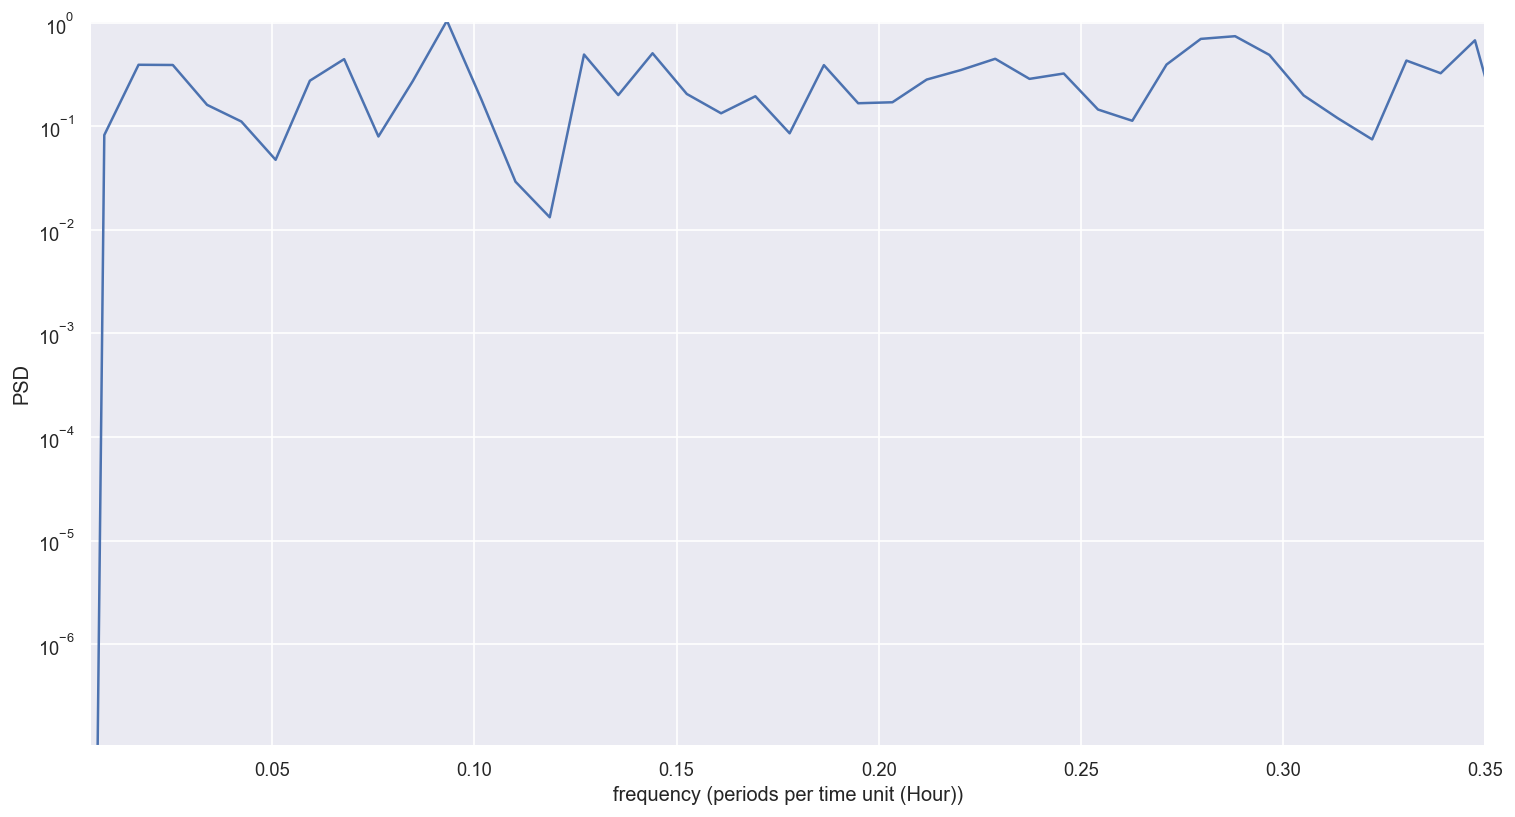

Strongest period length = 10.727272727272727


In [140]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df4_new3['collision_count'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Hour))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e7,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 1 day 24 hours in 1 day) 
PSD = PSD[f>0.04166]
f = f[f>0.04166] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

                               SARIMAX Results                                
Dep. Variable:        collision_count   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -45.439
Date:                Tue, 03 May 2022   AIC                             96.878
Time:                        16:06:18   BIC                            104.310
Sample:                             0   HQIC                            99.872
                                 - 89                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0095      0.133     -0.071      0.943      -0.269       0.250
ma.L1         -0.9996      5.215     -0.192      0.848     -11.221       9.222
sigma2         0.1563      0.811      0.193      0.8

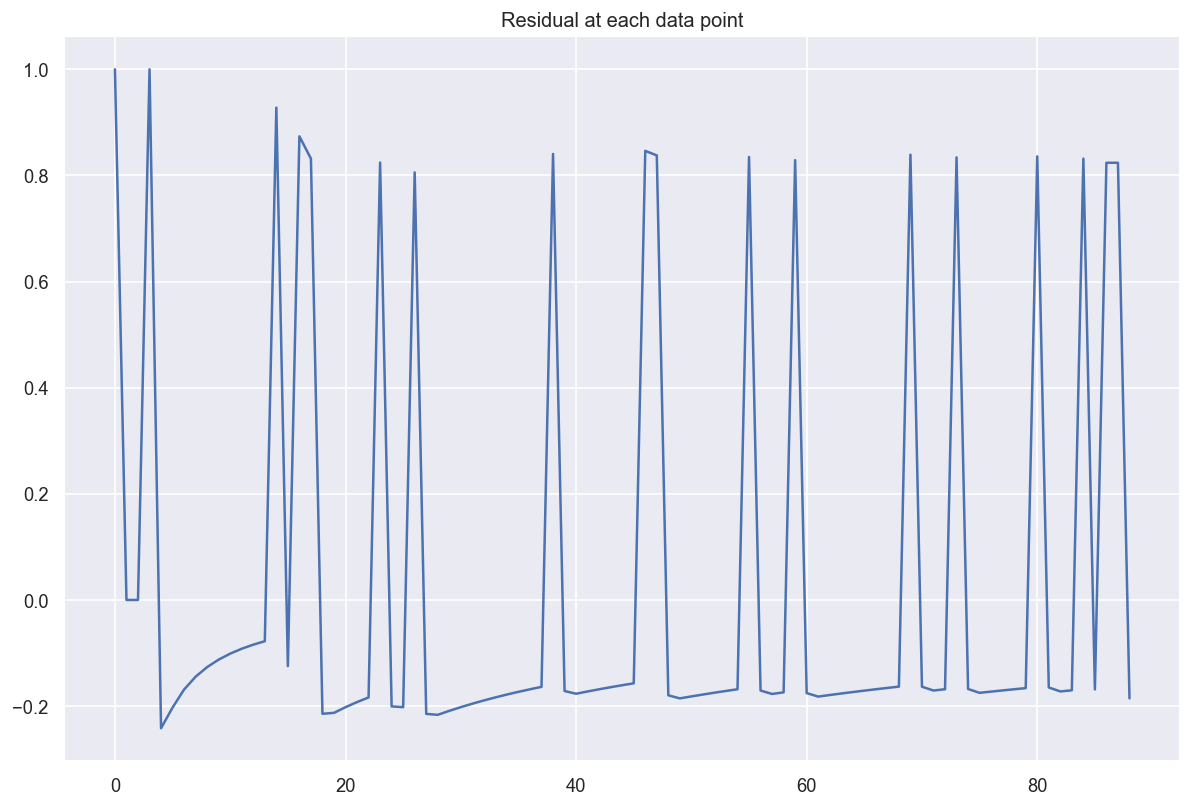

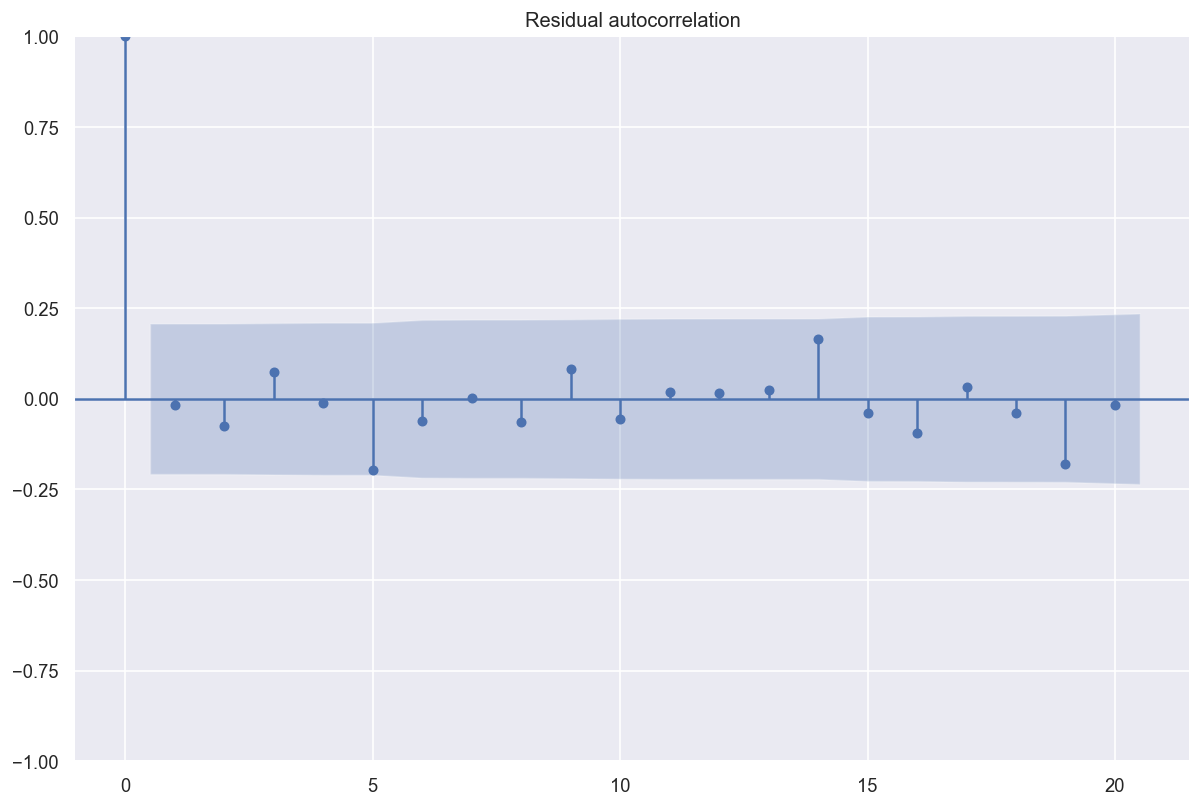

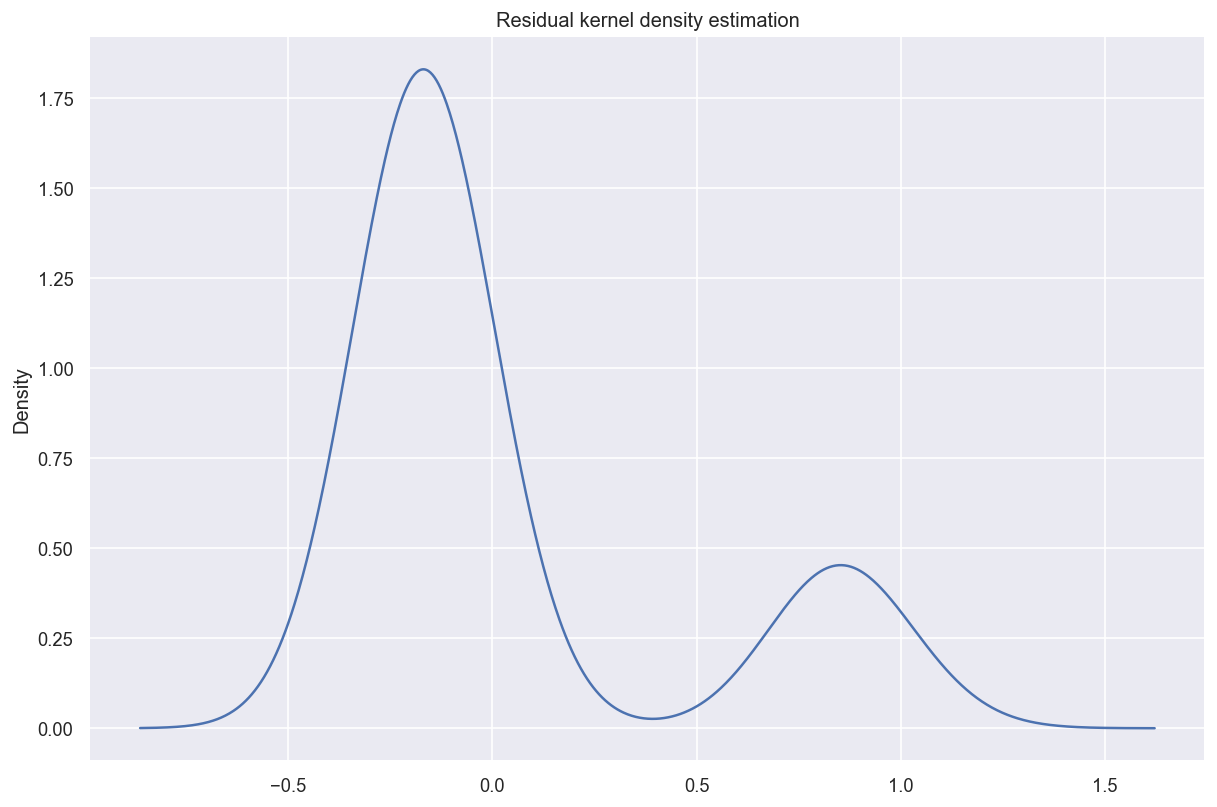

               0
count  89.000000
mean    0.040324
std     0.416277
min    -0.241719
25%    -0.178237
50%    -0.168612
75%    -0.091925
max     1.000000
p value is  1.0030020598293493e-05
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
     lb_stat  lb_pvalue
1   0.024285   0.876162
2   0.551347   0.759061
3   1.054915   0.787967
4   1.069764   0.899039
5   4.763370   0.445436
6   5.145169   0.525334
7   5.146210   0.642126
8   5.572559   0.694989
9   6.274750   0.712136
10  6.588678   0.763621


In [141]:
#We use the same parameters(P,D,Q) from the previous ARIMA Model, training on the first 75% dataset
P=1
D=1
Q=1

# fit model
N = 89
series = df4_new3['collision_count']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [142]:
X = pd.DataFrame(range(N),columns=['Hour'])
X = sm.add_constant(X)
lm=sm.OLS(df4_new3['collision_count'][:N],X).fit()
insample = lm.predict(X)

In [143]:
X = pd.DataFrame(range(N-1,len(df4_new3)),columns=['Hour'])
X = sm.add_constant(X)
pred = lm.predict(X)

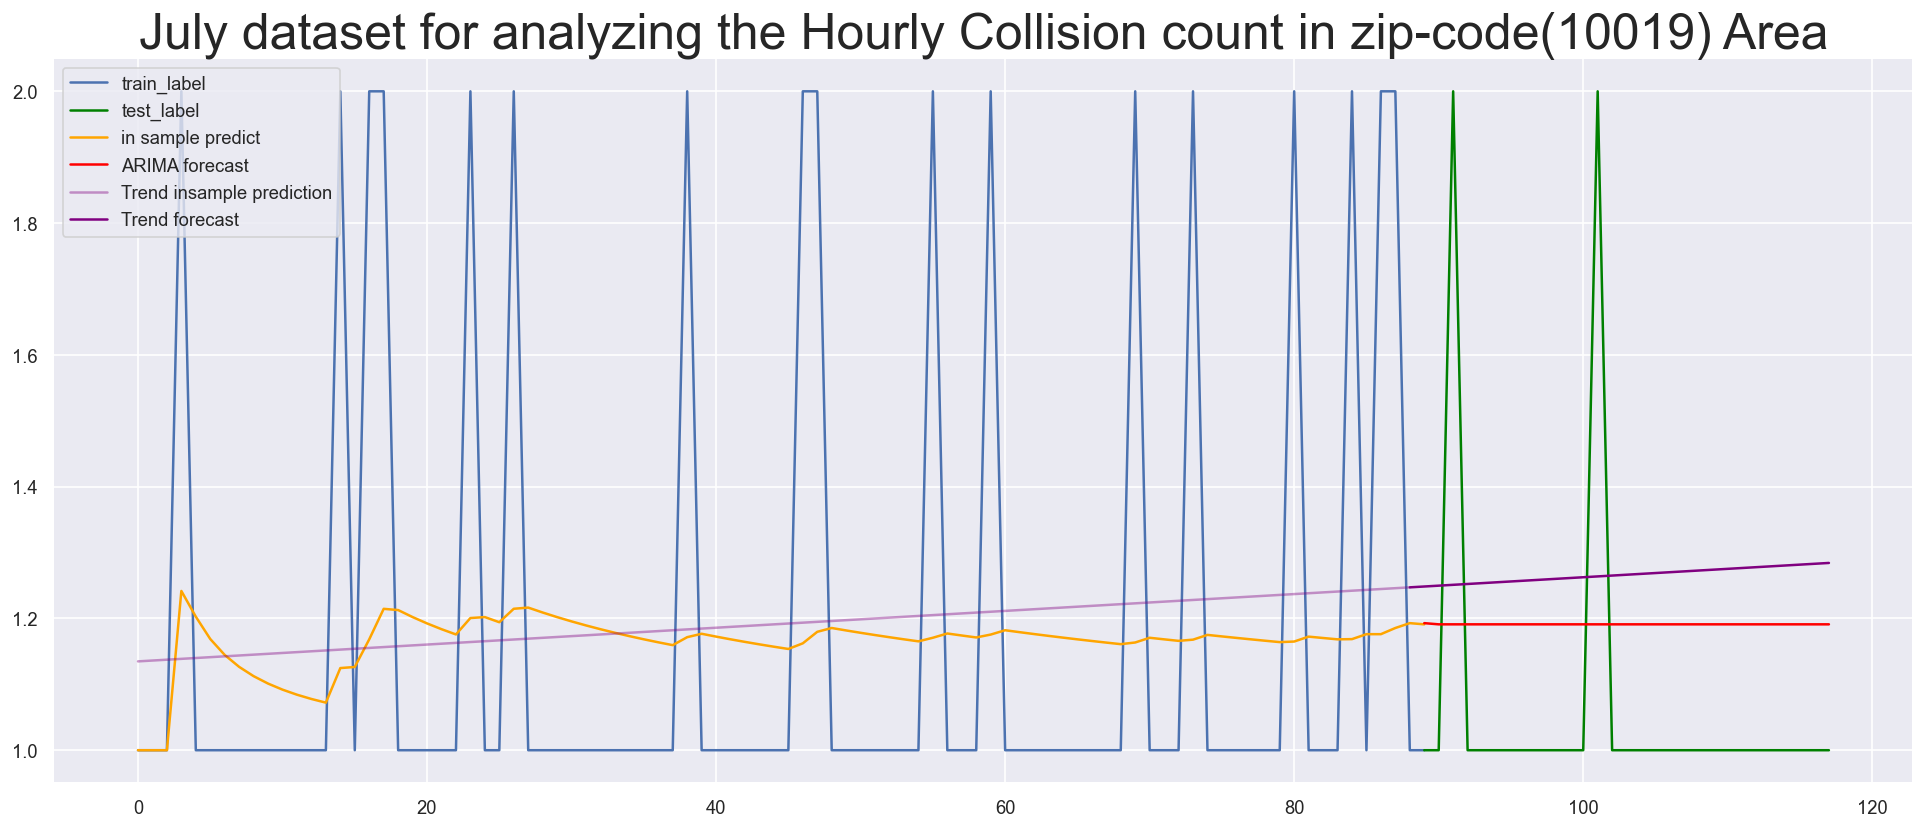

In [144]:
# Forecast
plt.rcParams.update({'figure.figsize':(20,8)})
fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N2,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

fig, ax = plt.subplots()
ax.plot(df4_new3.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df4_new3.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df4_new3.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample

ax.plot(fc_series, label='ARIMA forecast', color='red')# forecast

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.4)
ax.plot(range(N-1,len(df4_new3)),pred, label='Trend forecast', color='purple')
plt.title("July dataset for analyzing the Hourly Collision count in zip-code(10019) Area", fontsize=30)
plt.legend(loc='upper left')